In [31]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import torchDatasets as ds
import networks as custNN
import utilsTrainTest as utt

sns.set_theme(style='whitegrid')

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['figure.dpi']= 300

import torch
import torch.nn as nn
from torchvision.transforms import v2


# Device configuration
device = 'cpu' #torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# def manualSeed(seed:int):
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#     torch.backends.cudnn.deterministic = True
#     torch.backends.cudnn.benchmark = False
side = 30
base_dir = '/home/shashank/Code/gonihedric/'; data_dir = base_dir + "data/"
# date = "2025-06-19_08-40-39"
# date = "2025-07-09_12-06-26"
# date = "2025-11-05_18-10-13"
# date = "2025-11-06_17-57-02"
# date = "2025-11-06_13-07-00"
date= "2025-11-10_11-59-31"
# date="2025-11-10_12-17-16"


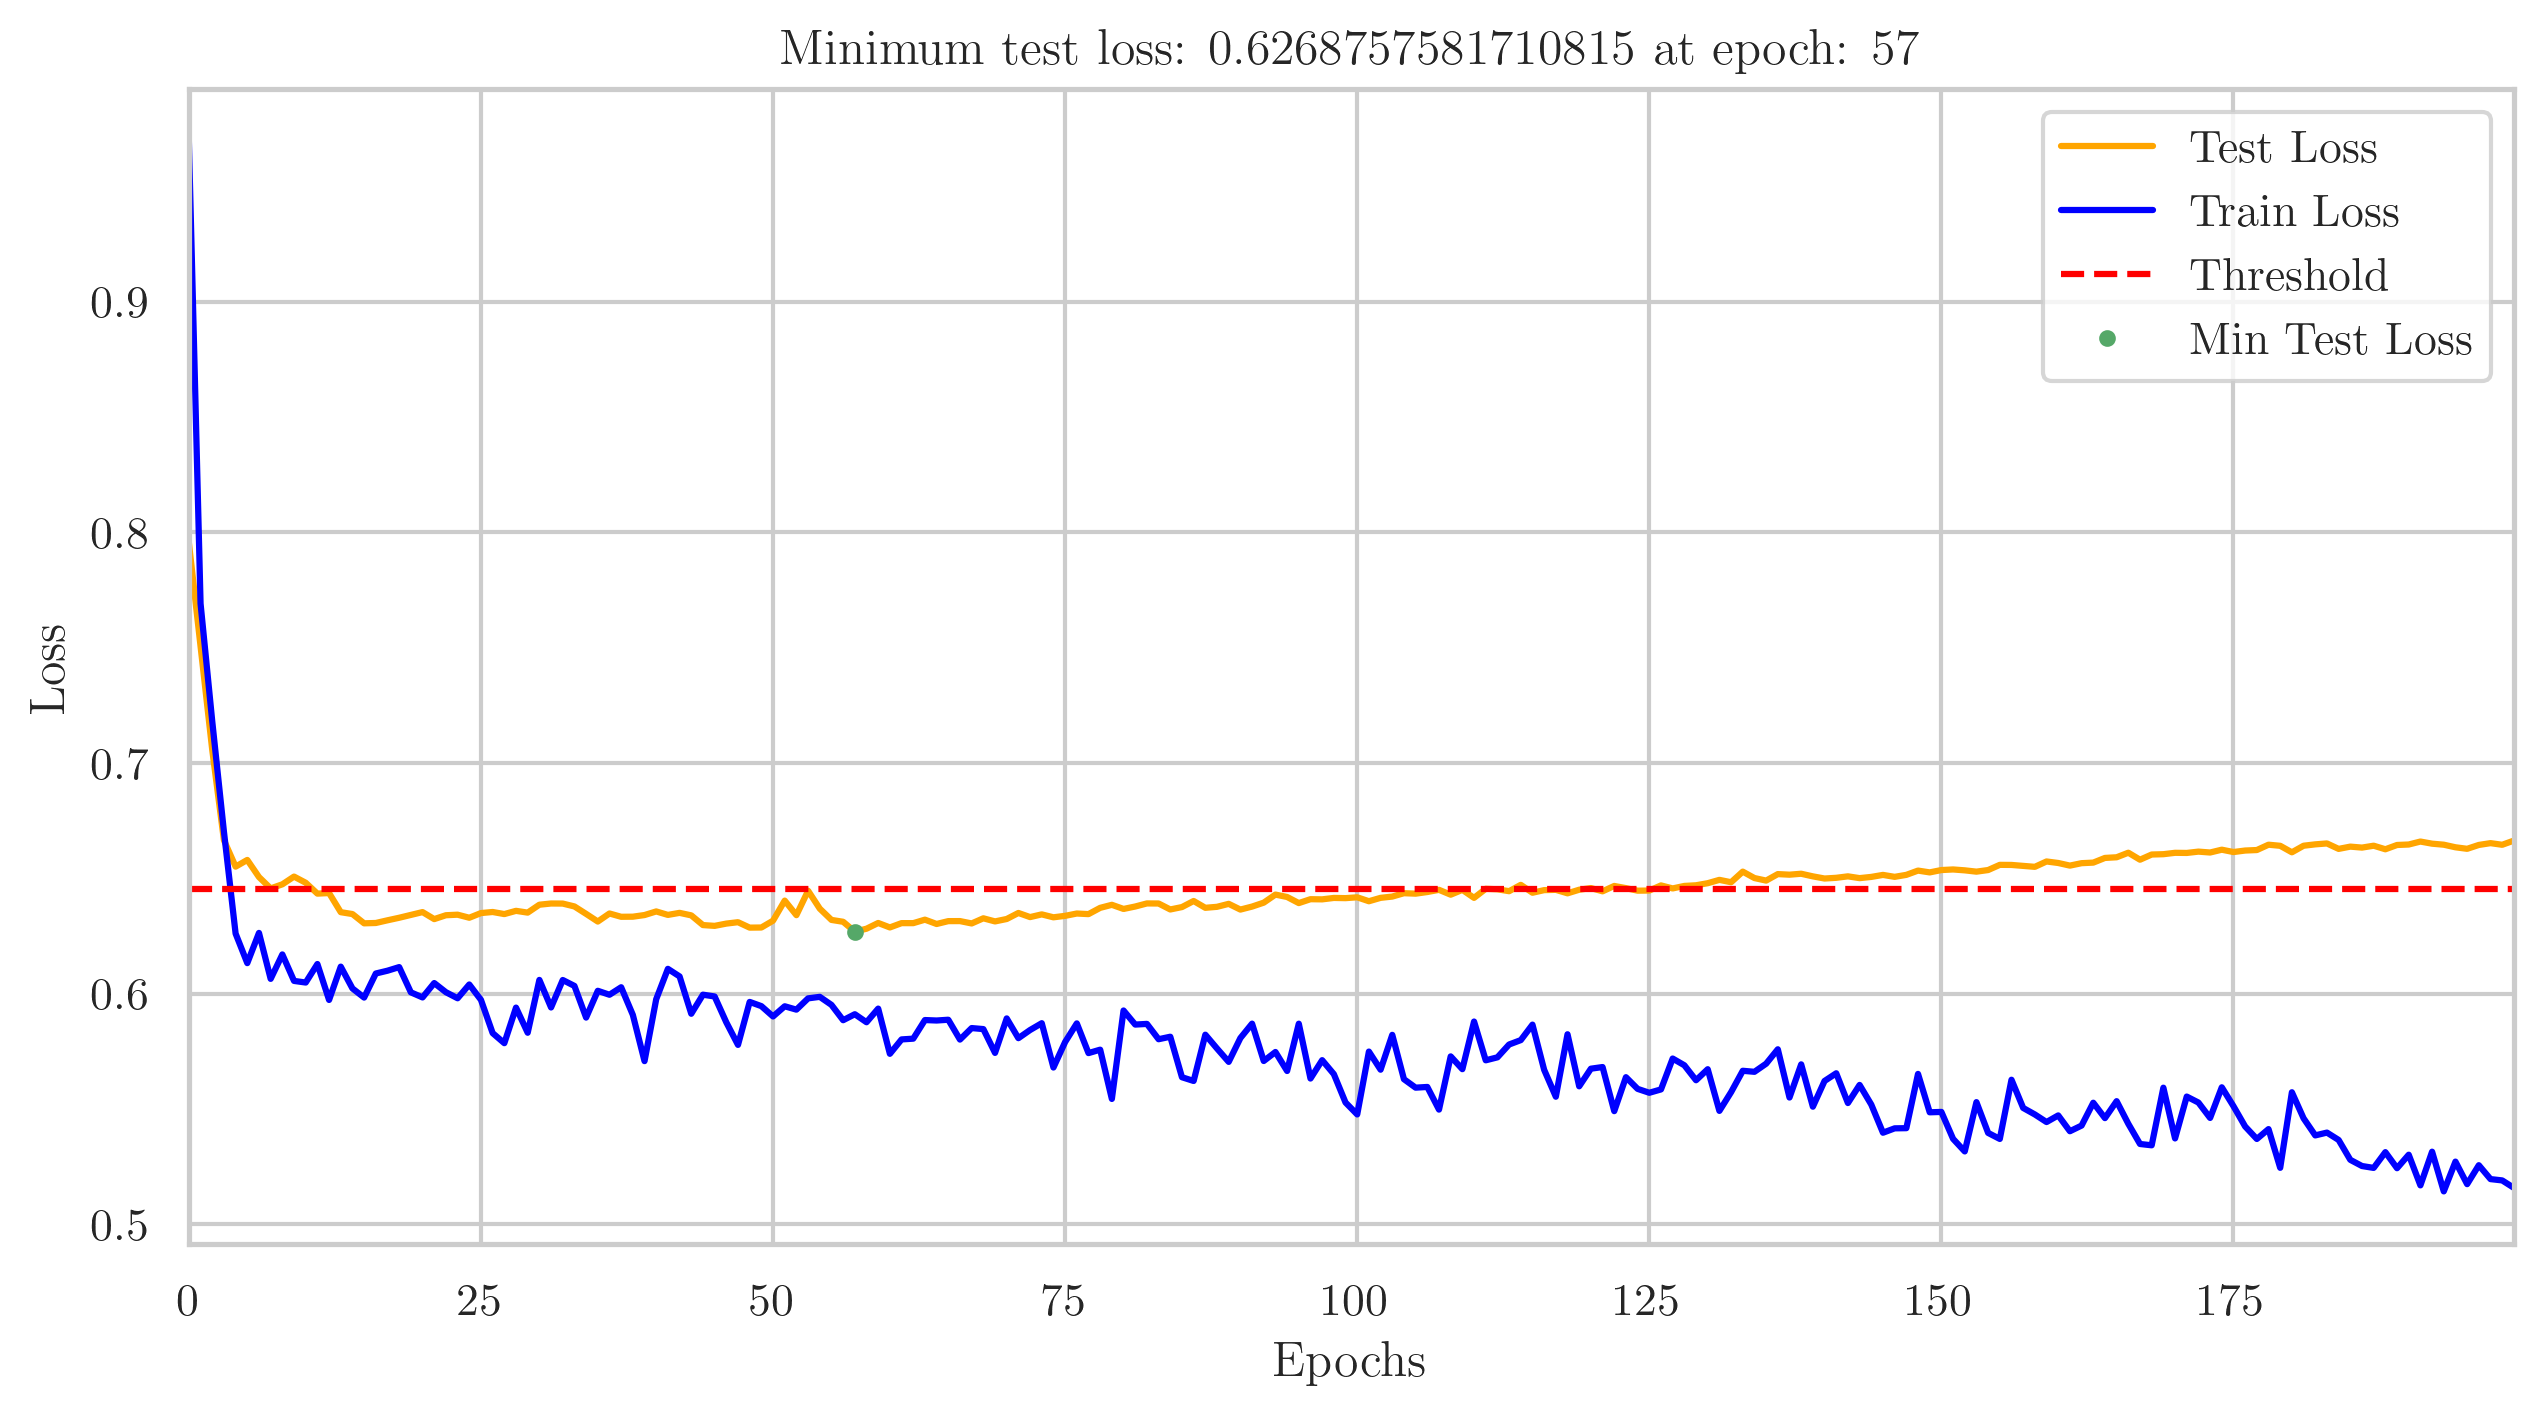

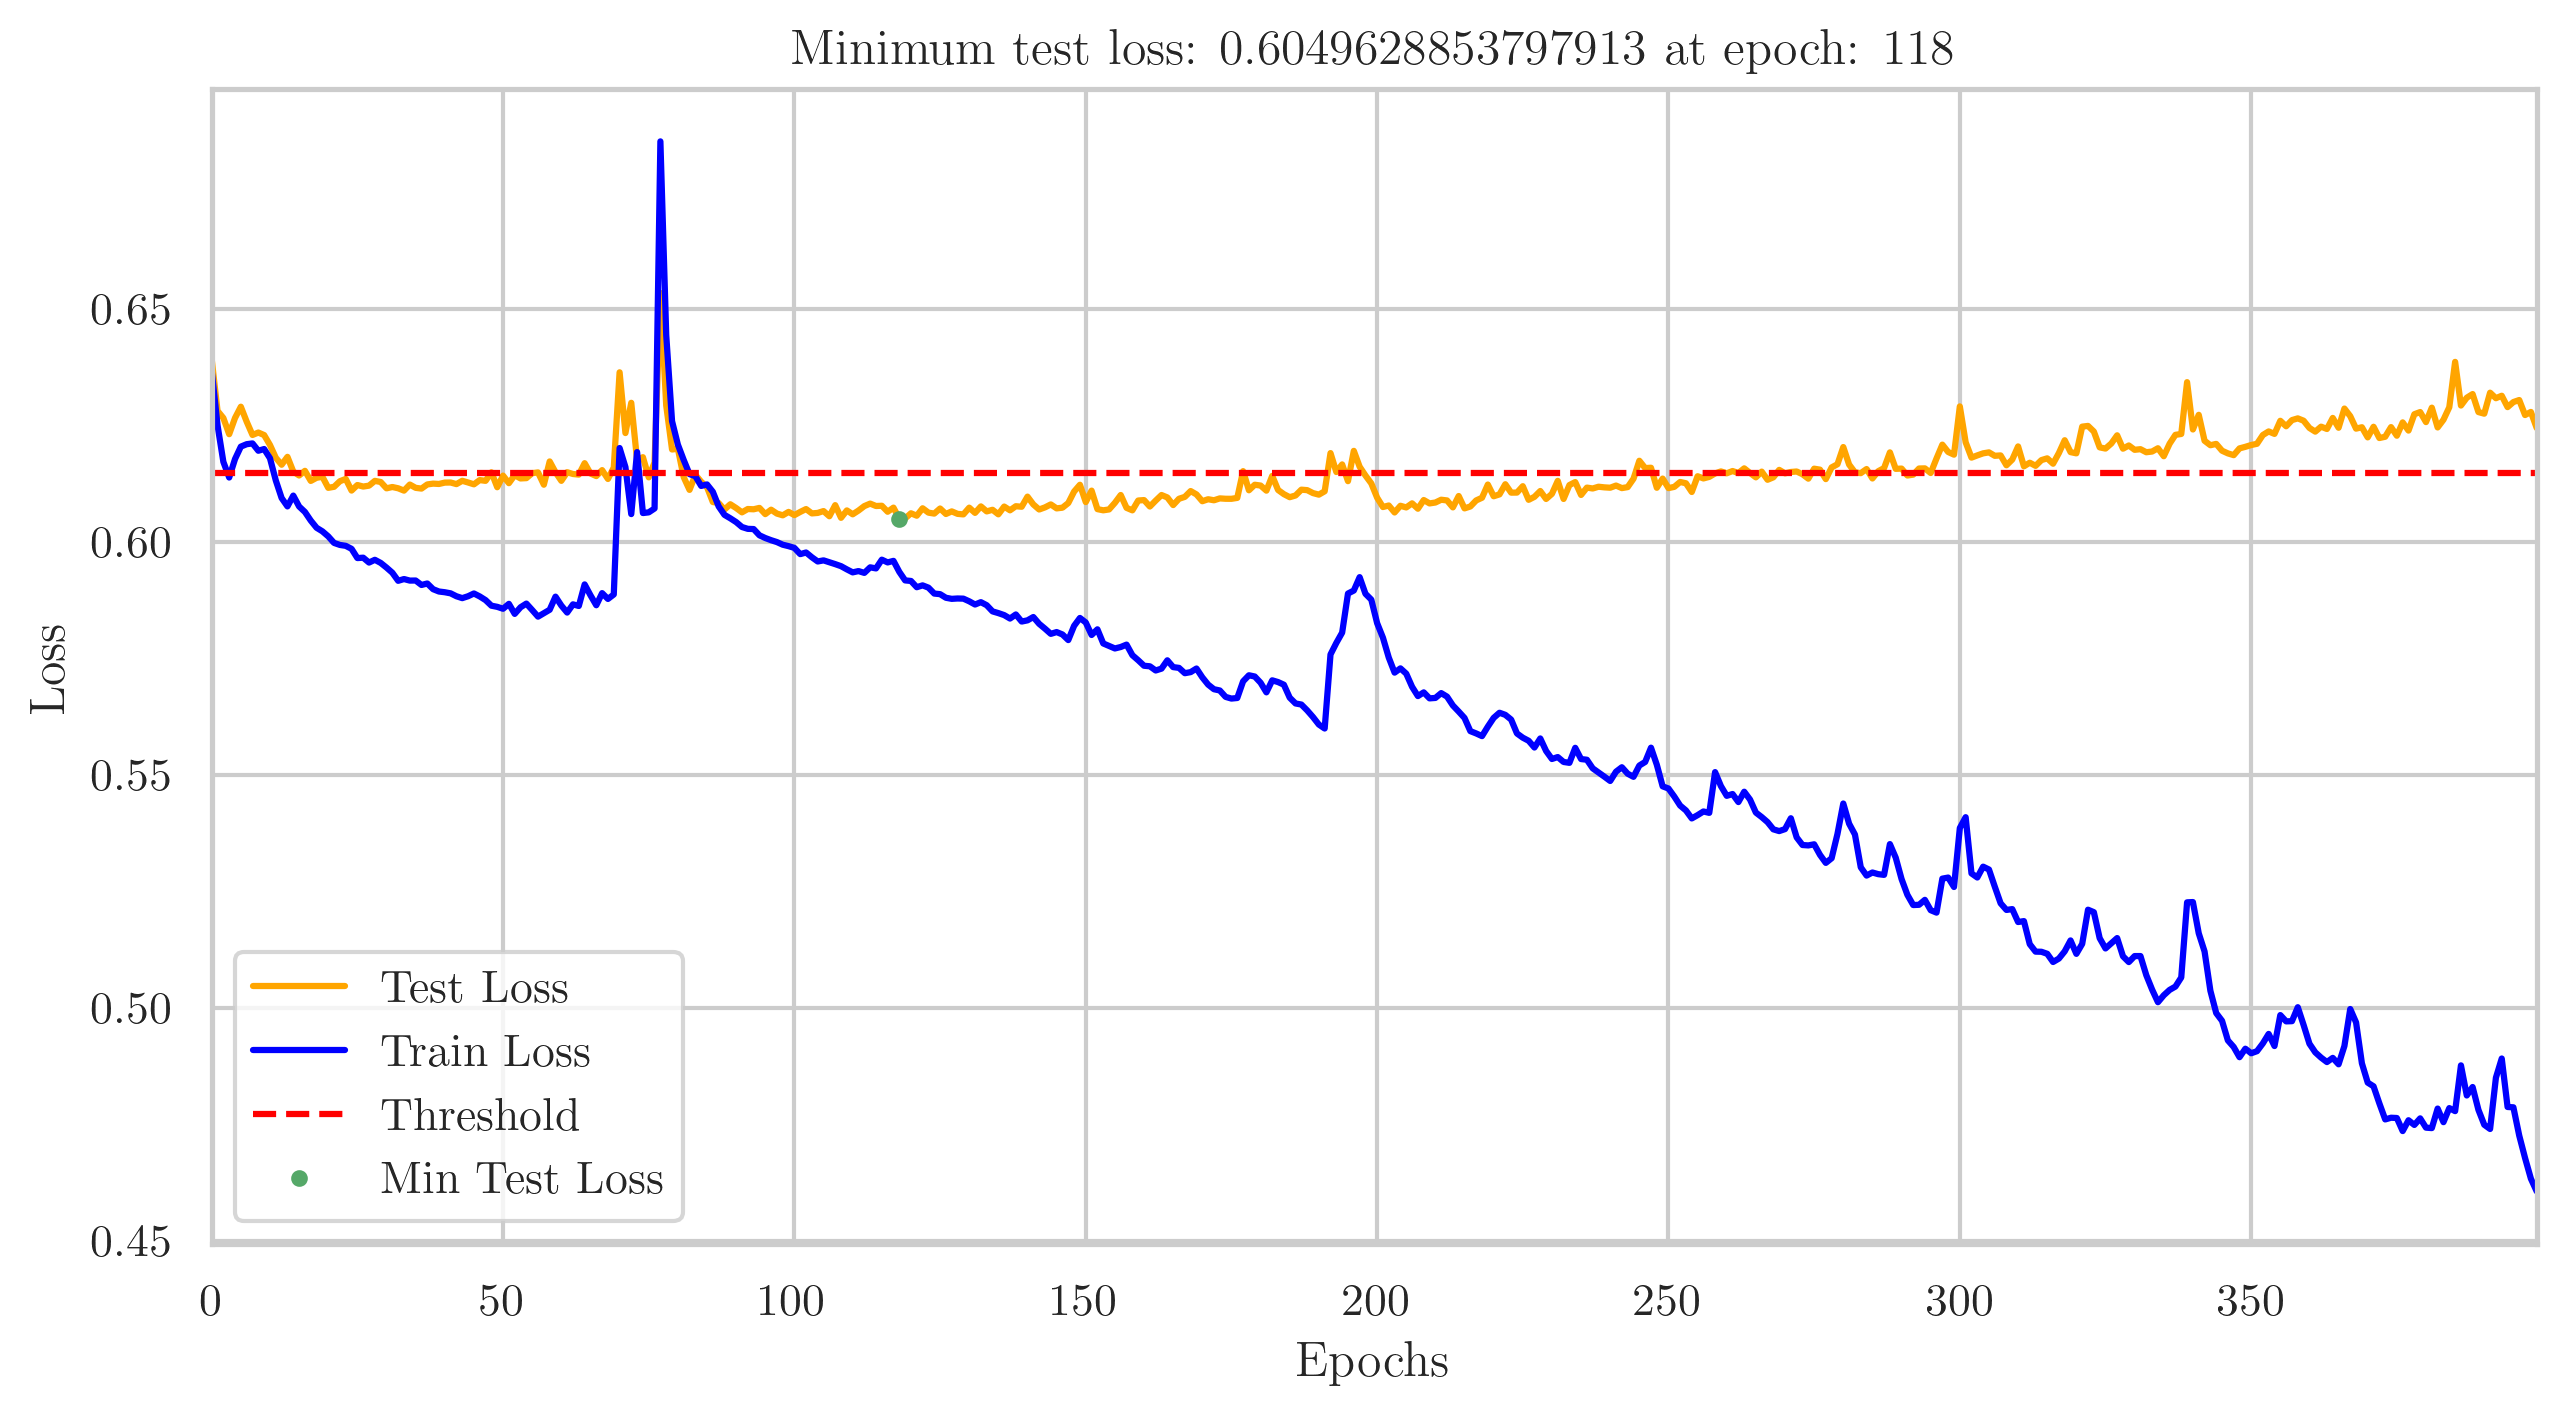

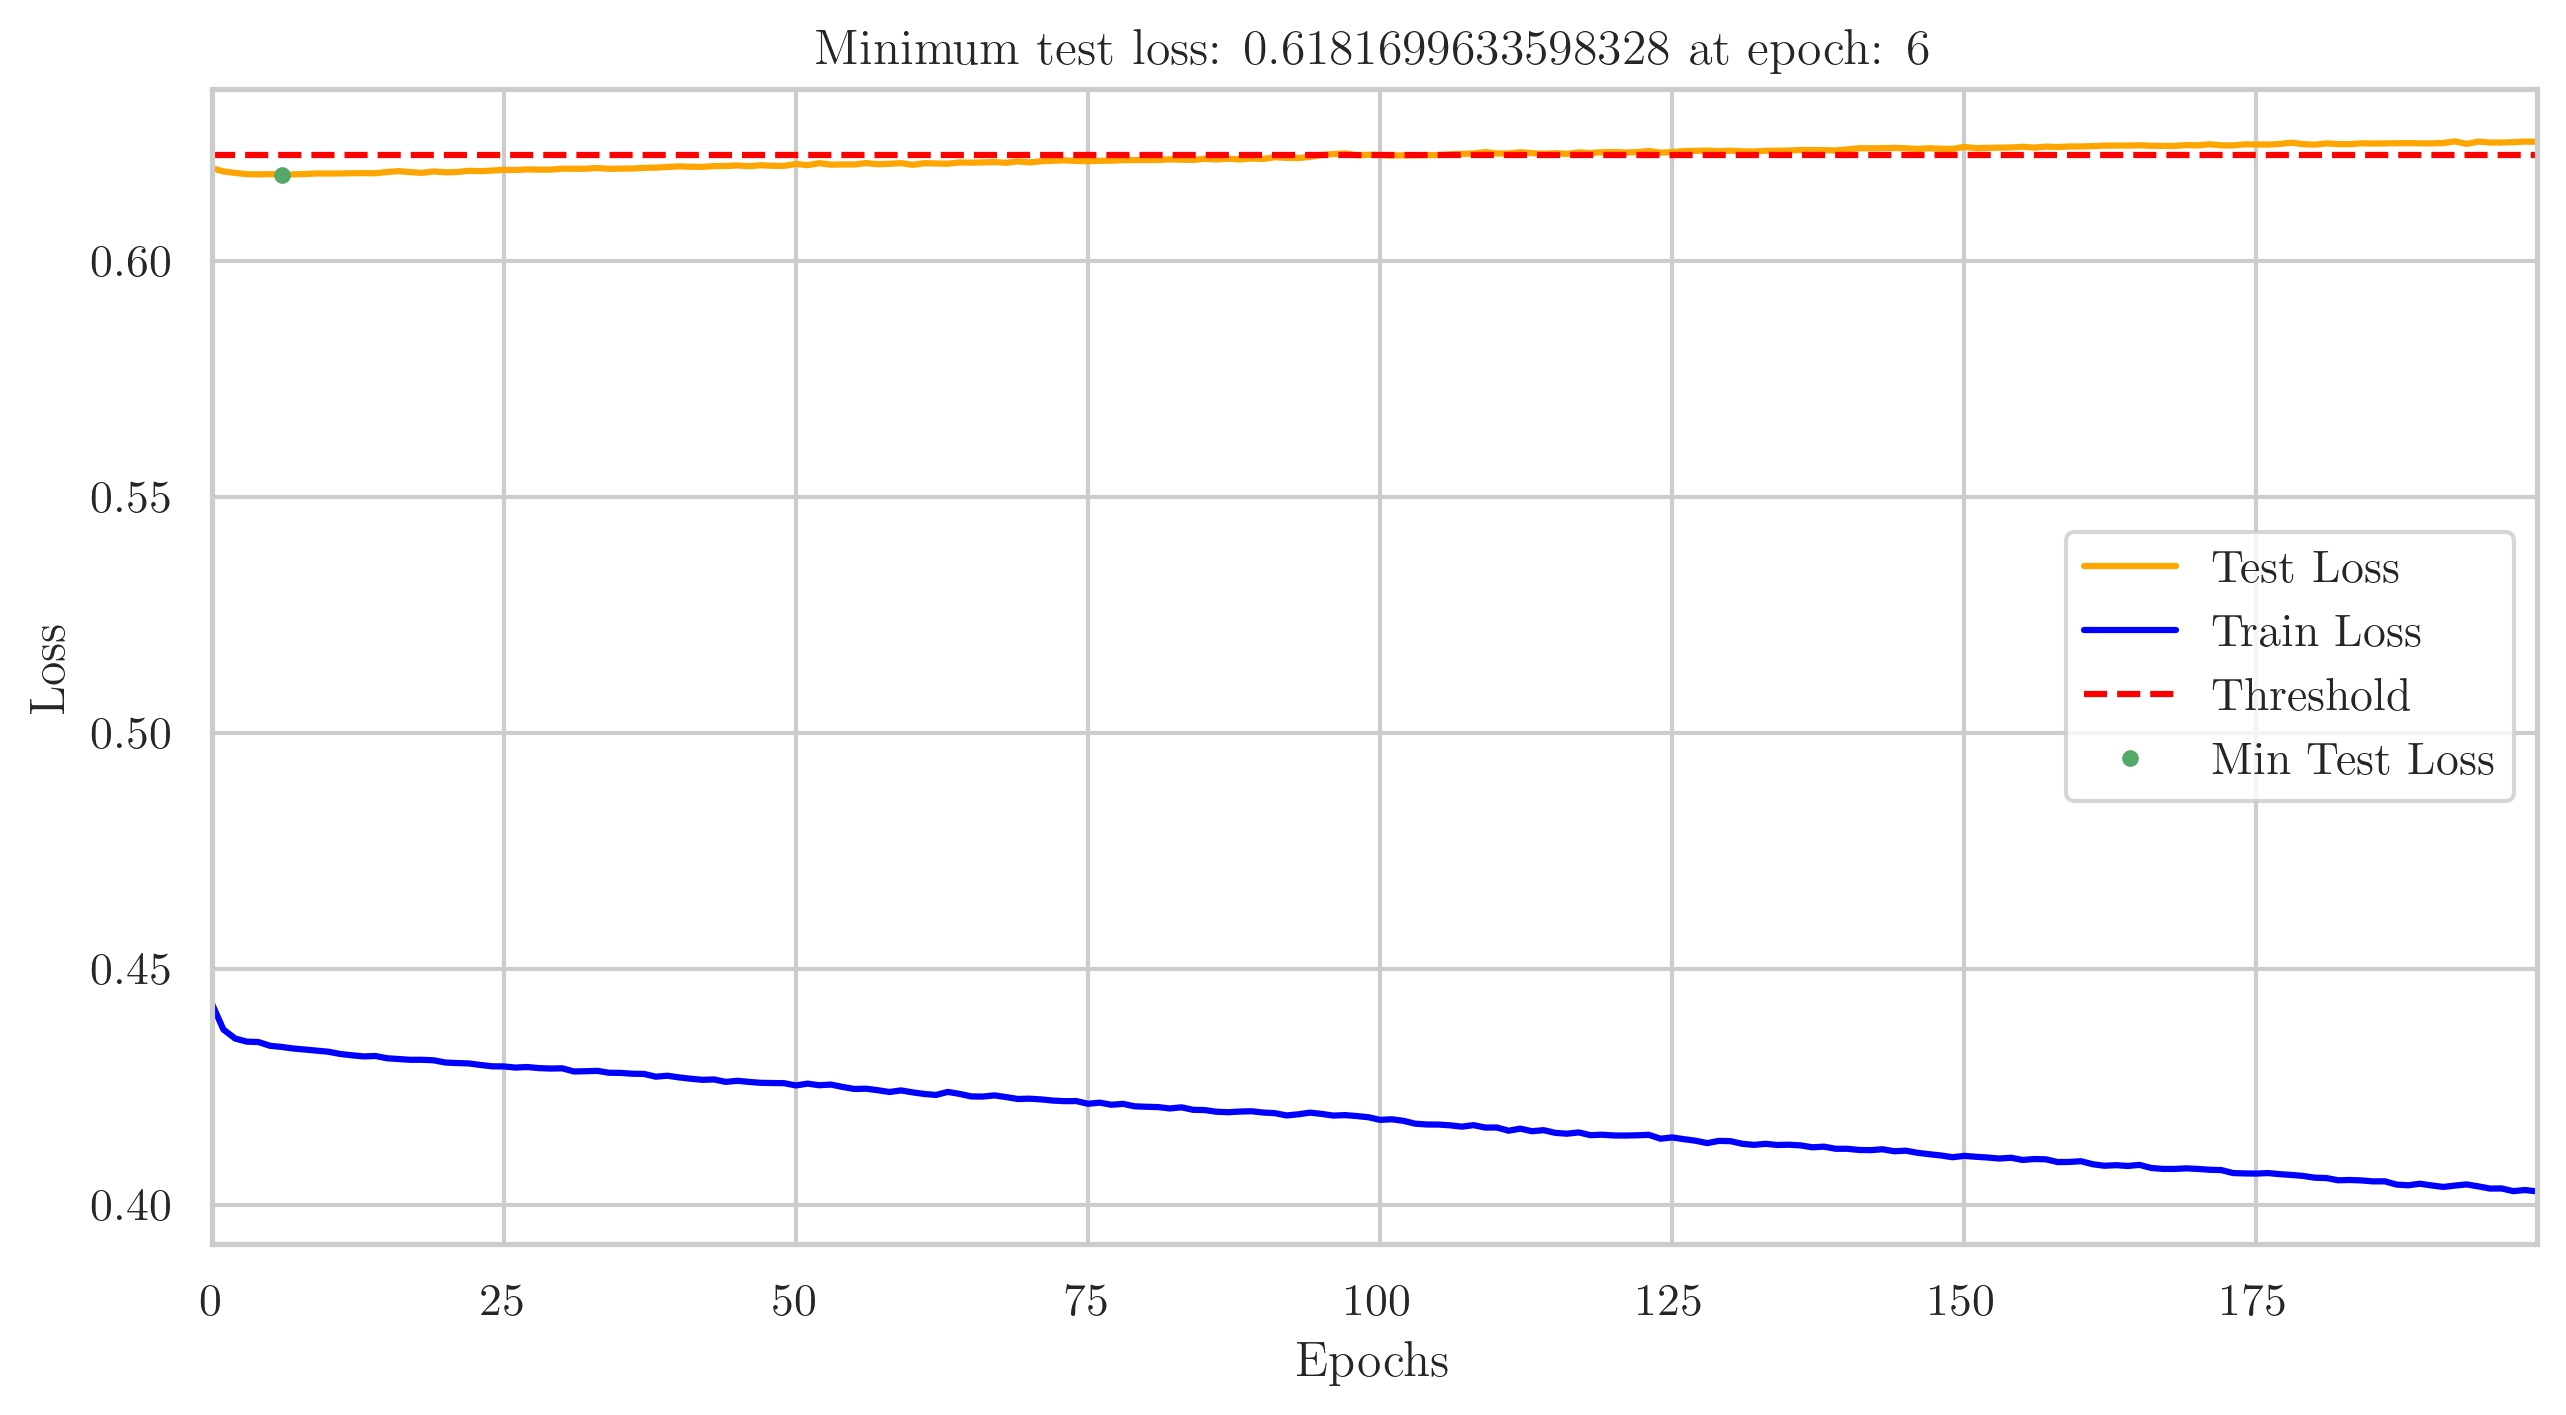

In [32]:
phase = "/1/"
test = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"testLosses.npy")
train = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"trainLosses.npy")
# plot and mark all the local minima
plt.figure(figsize=(10, 5))
plt.plot(test, label='Test Loss', color='orange')
plt.plot(train, label='Train Loss', color='blue')
plt.hlines(y=test[20:].mean(), xmin=0, xmax=len(test)-1, color='red', linestyle='--', label='Threshold')
plt.title(f"Minimum test loss: {np.min(test)} at epoch: {np.argmin(test)}")
plt.plot(np.argmin(test), test[np.argmin(test)], 'g.', label='Min Test Loss')
threshold = 0.1; points = 2
for i in range(points, len(test)-points):
    if (test[i-points] - test[i] > threshold) or (test[i+points] - test[i]>threshold):
        plt.plot(i, test[i], 'ro')  # Mark local minima with red dots
        print(f"Local minimum at epoch {i}: {test[i]}")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, len(test)-1)
# plt.ylim(np.min(test)-0.01, np.max(test[20:])+0.01)
plt.legend()
# plt.grid()
# plt.savefig(data_dir + "checkpoints/Autoencoder/loss_plot.png")
# plt.xlim(0, 75)
plt.show()

phase = "/2/"
test = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"testLosses.npy")
train = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"trainLosses.npy")
# plot and mark all the local minima
plt.figure(figsize=(10, 5))
plt.plot(test, label='Test Loss', color='orange')
plt.plot(train, label='Train Loss', color='blue')
plt.hlines(y=test[20:].mean(), xmin=0, xmax=len(test)-1, color='red', linestyle='--', label='Threshold')
plt.title(f"Minimum test loss: {np.min(test)} at epoch: {np.argmin(test)}")
plt.plot(np.argmin(test), test[np.argmin(test)], 'g.', label='Min Test Loss')
threshold = 0.1; points = 2
for i in range(points, len(test)-points):
    if (test[i-points] - test[i] > threshold) or (test[i+points] - test[i]>threshold):
        plt.plot(i, test[i], 'ro')  # Mark local minima with red dots
        print(f"Local minimum at epoch {i}: {test[i]}")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, len(test)-1)
# plt.ylim(np.min(test)-0.01, np.max(test[20:])+0.01)
plt.legend()
# plt.grid()
# plt.savefig(data_dir + "checkpoints/Autoencoder/loss_plot.png")
# plt.xlim(3500, 4000)
plt.show()

phase = "/3/"
# check if the file exists
if not os.path.exists(data_dir + "checkpoints/Autoencoder/" + date + phase):
    print(f"File not found: {data_dir}checkpoints/Autoencoder/{date}{phase}")
else:
    test = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"testLosses.npy")
    train = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"trainLosses.npy")
    # plot and mark all the local minima
    plt.figure(figsize=(10, 5))
    plt.plot(test, label='Test Loss', color='orange')
    plt.plot(train, label='Train Loss', color='blue')
    plt.hlines(y=test[20:].mean(), xmin=0, xmax=len(test)-1, color='red', linestyle='--', label='Threshold')
    plt.title(f"Minimum test loss: {np.min(test)} at epoch: {np.argmin(test)}")
    plt.plot(np.argmin(test), test[np.argmin(test)], 'g.', label='Min Test Loss')
    threshold = 0.1; points = 2
    for i in range(points, len(test)-points):
        if (test[i-points] - test[i] > threshold) or (test[i+points] - test[i]>threshold):
            plt.plot(i, test[i], 'ro')  # Mark local minima with red dots
            print(f"Local minimum at epoch {i}: {test[i]}")

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, len(test)-1)
    # plt.ylim(np.min(test)-0.01, np.max(test[20:])+0.01)
    plt.legend()
    # plt.grid()
    # plt.savefig(data_dir + "checkpoints/Autoencoder/loss_plot.png")
    # plt.xlim(3500, 4000)
    plt.show()

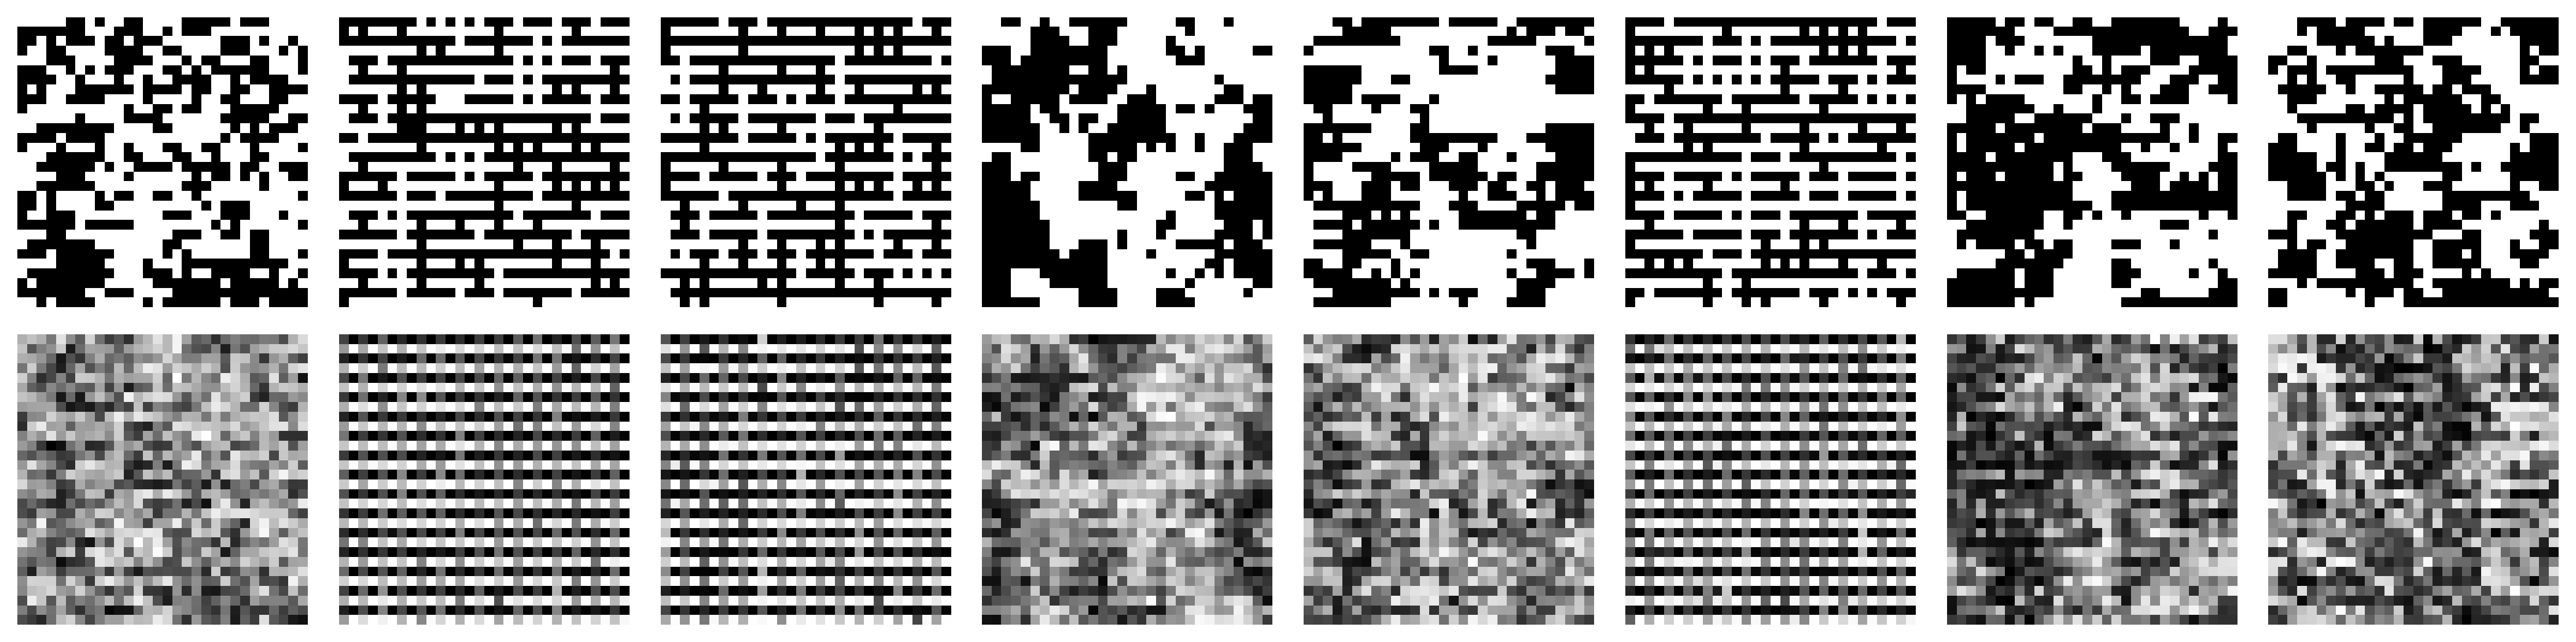

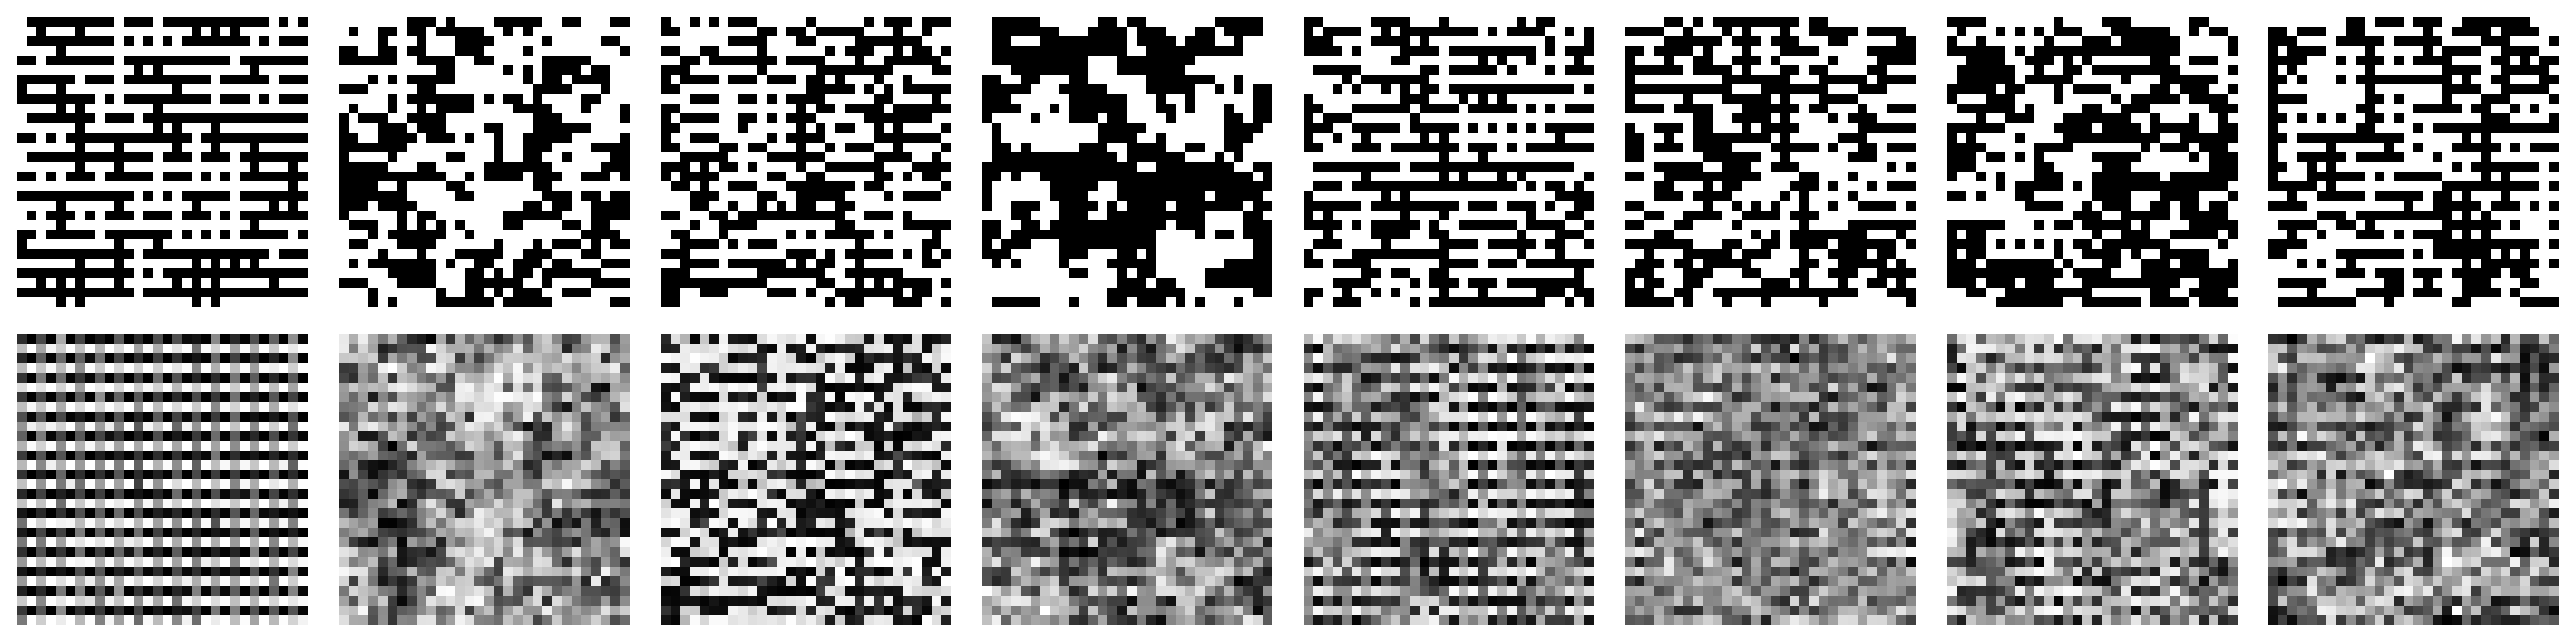

In [37]:
final_activation = nn.Tanh(); criterion = nn.MSELoss()
transform = v2.Compose([v2.Lambda(lambda x: 2*x - 1), utt.ReshapeTransform(([side*side]))])
# final_activation = nn.Sigmoid(); criterion = nn.BCELoss(); transform = None
model = custNN.Autoencoder([900, 750, 600, 450, 300, 150, 75, 30, 10, 2], nn.Tanh(), final_activation, nn.functional.tanh)
# model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/"+date+"/2/model_epoch_50.pth", map_location=device))
model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/"+date+"/modelSecond.pth", map_location=device))
# model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/modelPaperExact.pth", map_location=device))

def visualize_reconstruction(model, data_loader1, data_loader2=None):
    model.eval()
    with torch.no_grad():
        images, _ = next(iter(data_loader1))
        images = images.to(device)
        reconstructed = model(images)

        # Plot original vs reconstructed images
        fig, axes = plt.subplots(2, 8, figsize=(15, 4))
        for i in range(8):
            # Original images
            axes[0,i].imshow(images[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[0,i].axis('off')

            # Reconstructed images
            axes[1,i].imshow(reconstructed[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[1,i].axis('off')

        plt.tight_layout()
        plt.show()
        if data_loader2 is None:
            return
        images, _ = next(iter(data_loader2))
        images = images.to(device)
        reconstructed = model(images)

        # Plot original vs reconstructed images
        fig, axes = plt.subplots(2, 8, figsize=(15, 4))
        for i in range(8):
            # Original images
            axes[0,i].imshow(images[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[0,i].axis('off')

            # Reconstructed images
            axes[1,i].imshow(reconstructed[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[1,i].axis('off')

        plt.tight_layout()
        plt.show()
        


trainset = ds.CustomAutoencoderDataset(data_dir+"small", side, transform)
data_loader = torch.utils.data.DataLoader(trainset, batch_size=4000, shuffle=True)
testset = ds.CustomAutoencoderDataset(data_dir+"test", side, transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4000, shuffle=True)

visualize_reconstruction(model, data_loader, test_loader)

    

In [38]:
#calculate test loss
total_loss = 0
model.eval()
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, inputs).cpu().numpy()
        total_loss += loss
print(f"Test Loss: {total_loss / len(test_loader)}")


total_loss = 0
model.eval()
with torch.no_grad():
    for inputs, _ in data_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, inputs).cpu().numpy()
        total_loss += loss
print(f"Train Loss: {total_loss / len(data_loader)}")
loader = test_loader
configs = []
model.eval()
with torch.no_grad():
    # Get a batch of data
    configs, params = next(iter(loader))
    # images = images.numpy()
    configs = configs.to(device)
    # Pass images through encoder to get latent vectors
    latent_vectors = model.encoder(configs.view(configs.size(0), -1)).cpu().numpy()
    configs = configs.cpu().numpy()
    params = params.cpu().numpy()

Test Loss: 0.6268316507339478
Train Loss: 0.44710397720336914


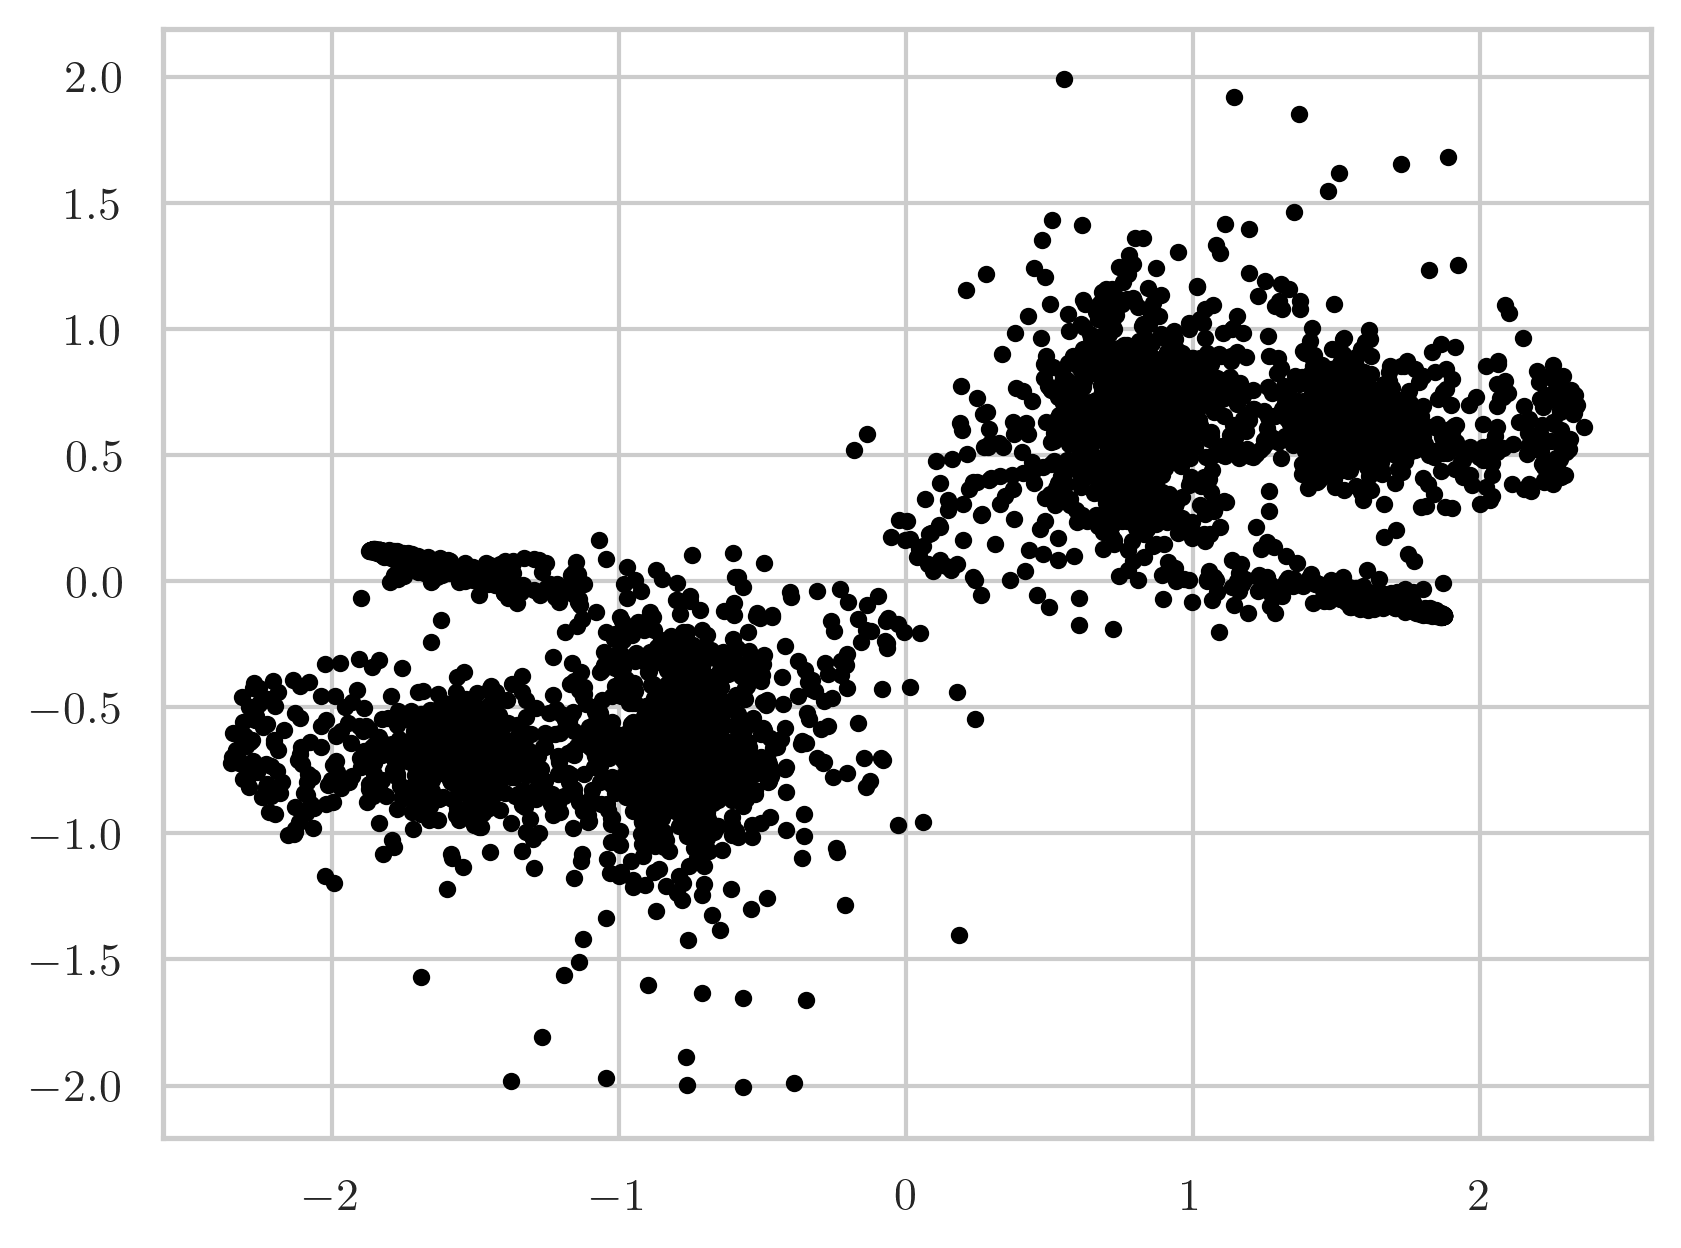

PCA components: (4000, 2)


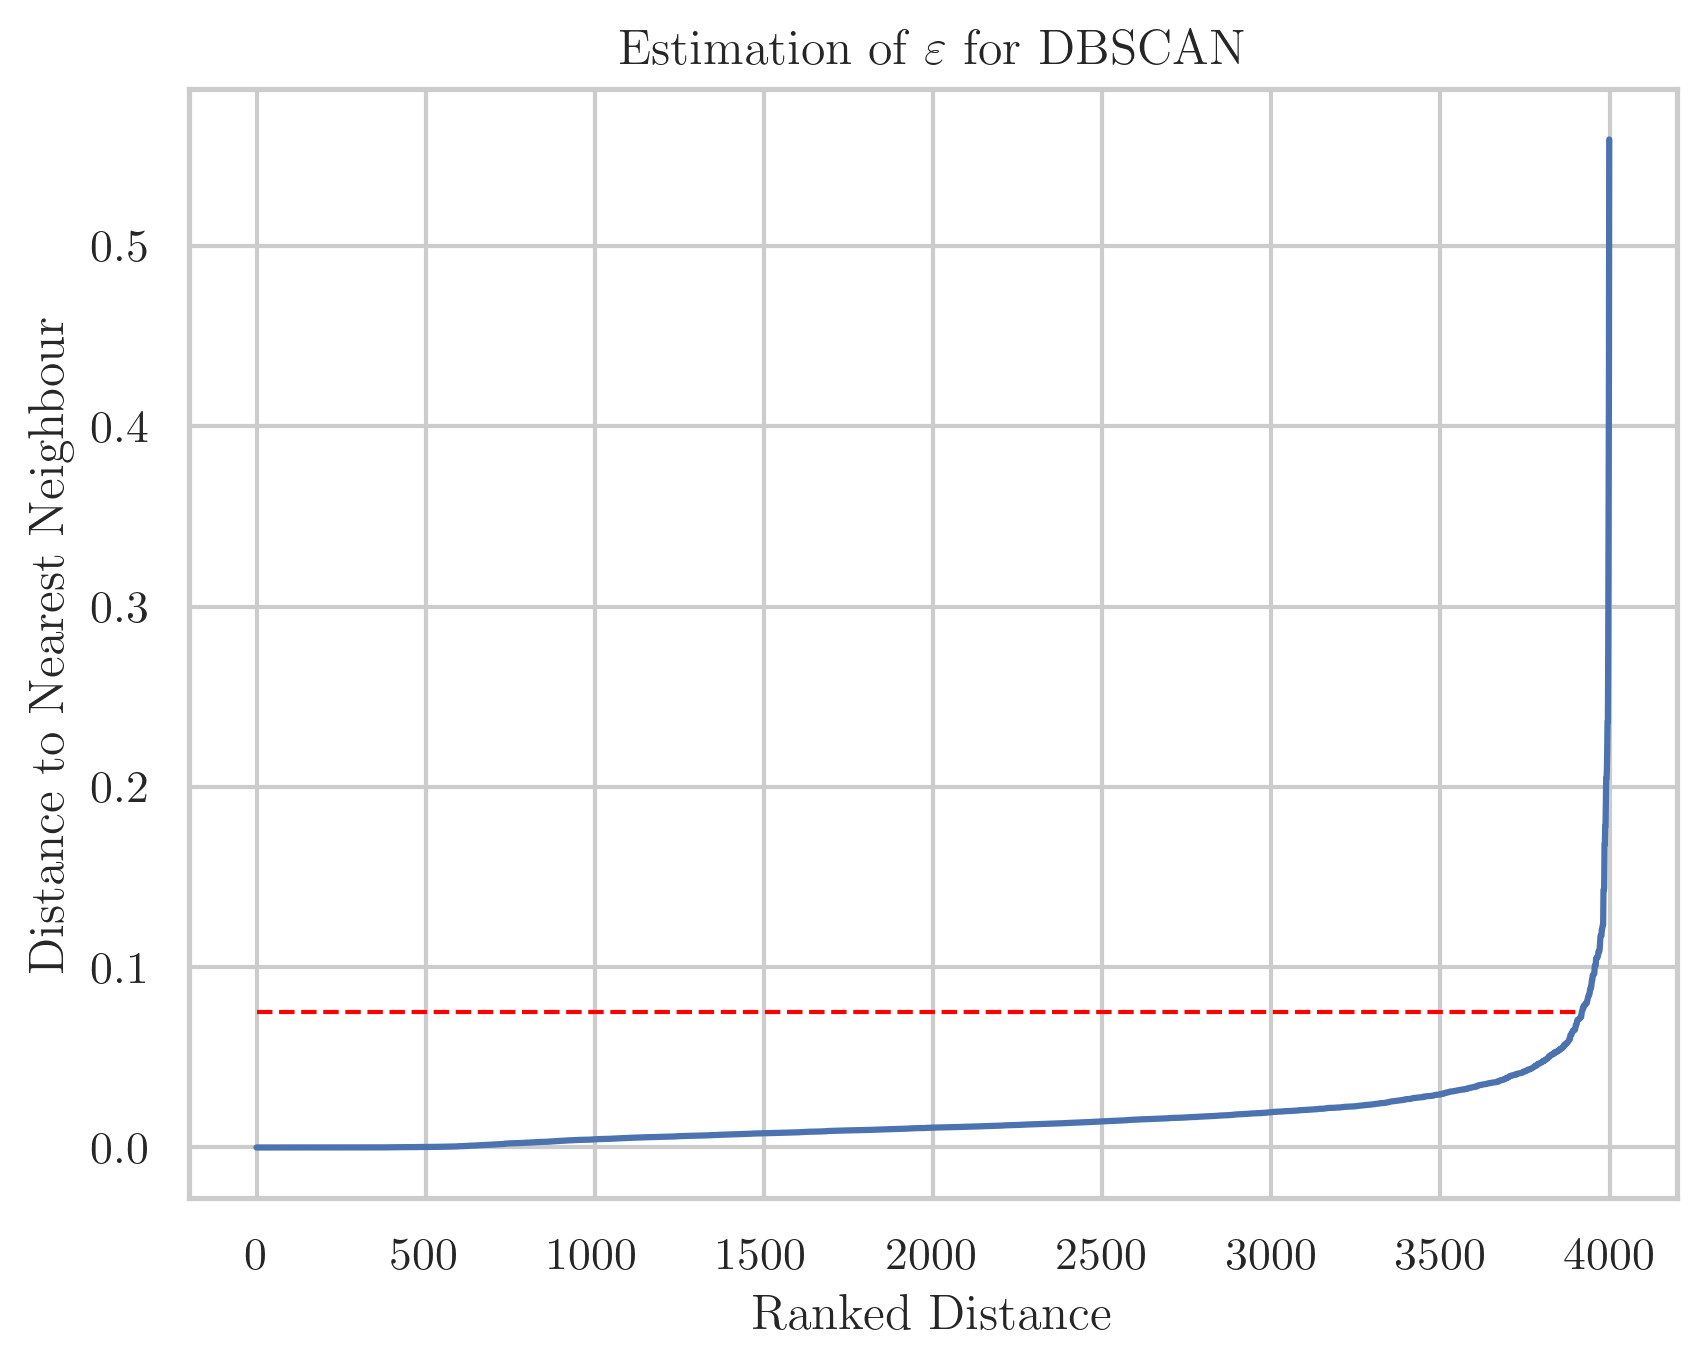

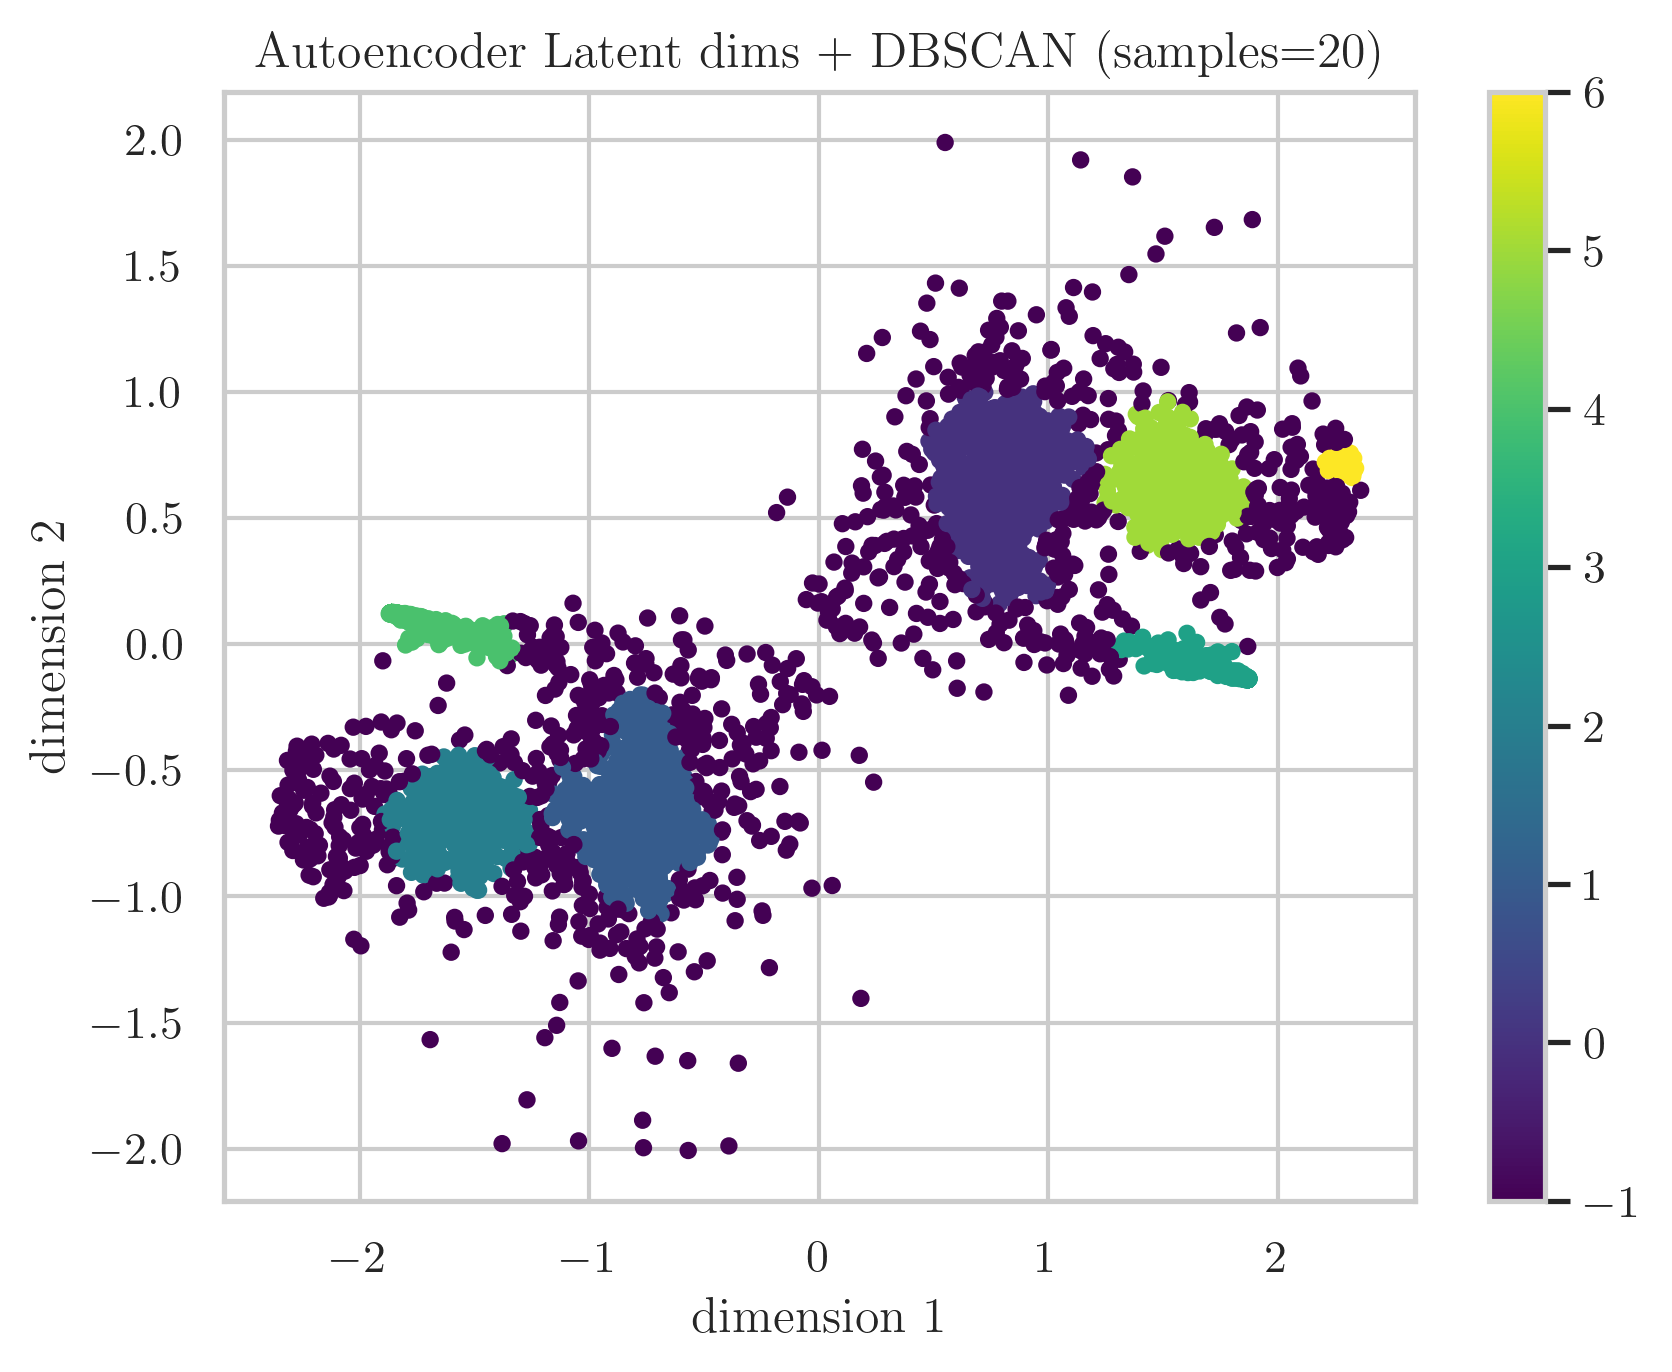

/tmp/ipykernel_1074840/3964822121.py:54: RuntimeWarning: divide by zero encountered in divide
  plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
/tmp/ipykernel_1074840/3964822121.py:55: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )


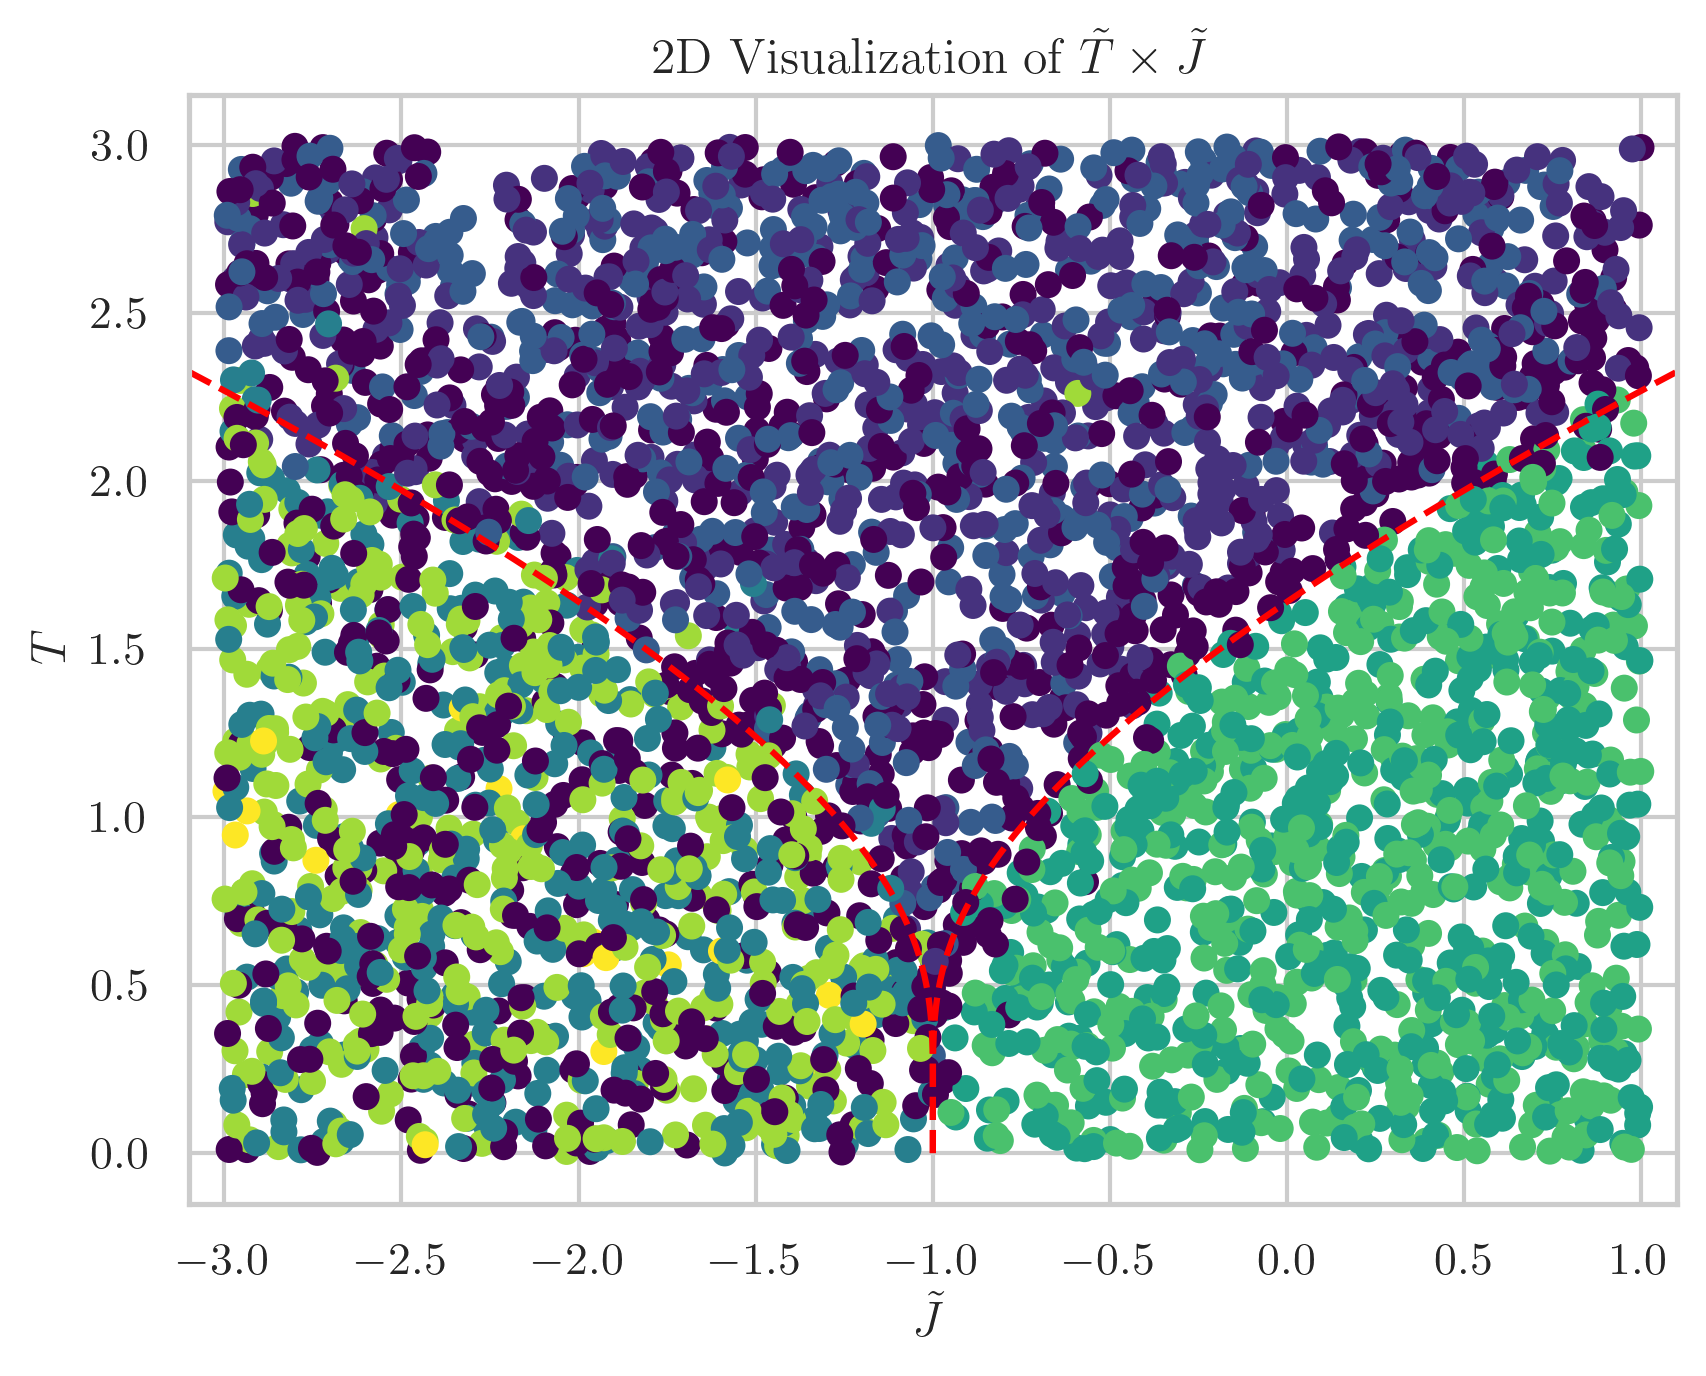

In [41]:
# # Apply t-SNE to reduce latent space to 2D, default perplexity = 30
# # tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# # tSNE_2d = tsne.fit_transform(latent_vectors)


# # pca = PCA(n_components=2)
# # pca_NN = pca.fit_transform(latent_vectors)
# # pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))


# # plt.plot(tSNE_2d[:, 0], tSNE_2d[:, 1], 'o', markersize=1, alpha=0.5, label='t-SNE')


L1 = latent_vectors[:, 0]; L2 = latent_vectors[:, 1]
plt.scatter(L1, L2, s=10, c='black', label='PCA (NN)')
plt.show()
print("PCA components:", latent_vectors.shape)

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(latent_vectors)
distances2,_ = neighbours_fit2.kneighbors(latent_vectors)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)


epsilon = 0.075
min_samples = 20
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(latent_vectors)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.150)
# plt.xlim(3550, 4000)
plt.show()

scatter2 = plt.scatter(L1, L2, c=labels2, cmap='viridis', s=10)
plt.colorbar(scatter2)
plt.title("Autoencoder Latent dims + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
# plt.legend()
plt.show()



plt.scatter(params[:, 0], params[:,1], c=labels2, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$')
x = np.linspace(0, 3, 400)
plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )
plt.xlim(-3.1,1.1)
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.show()

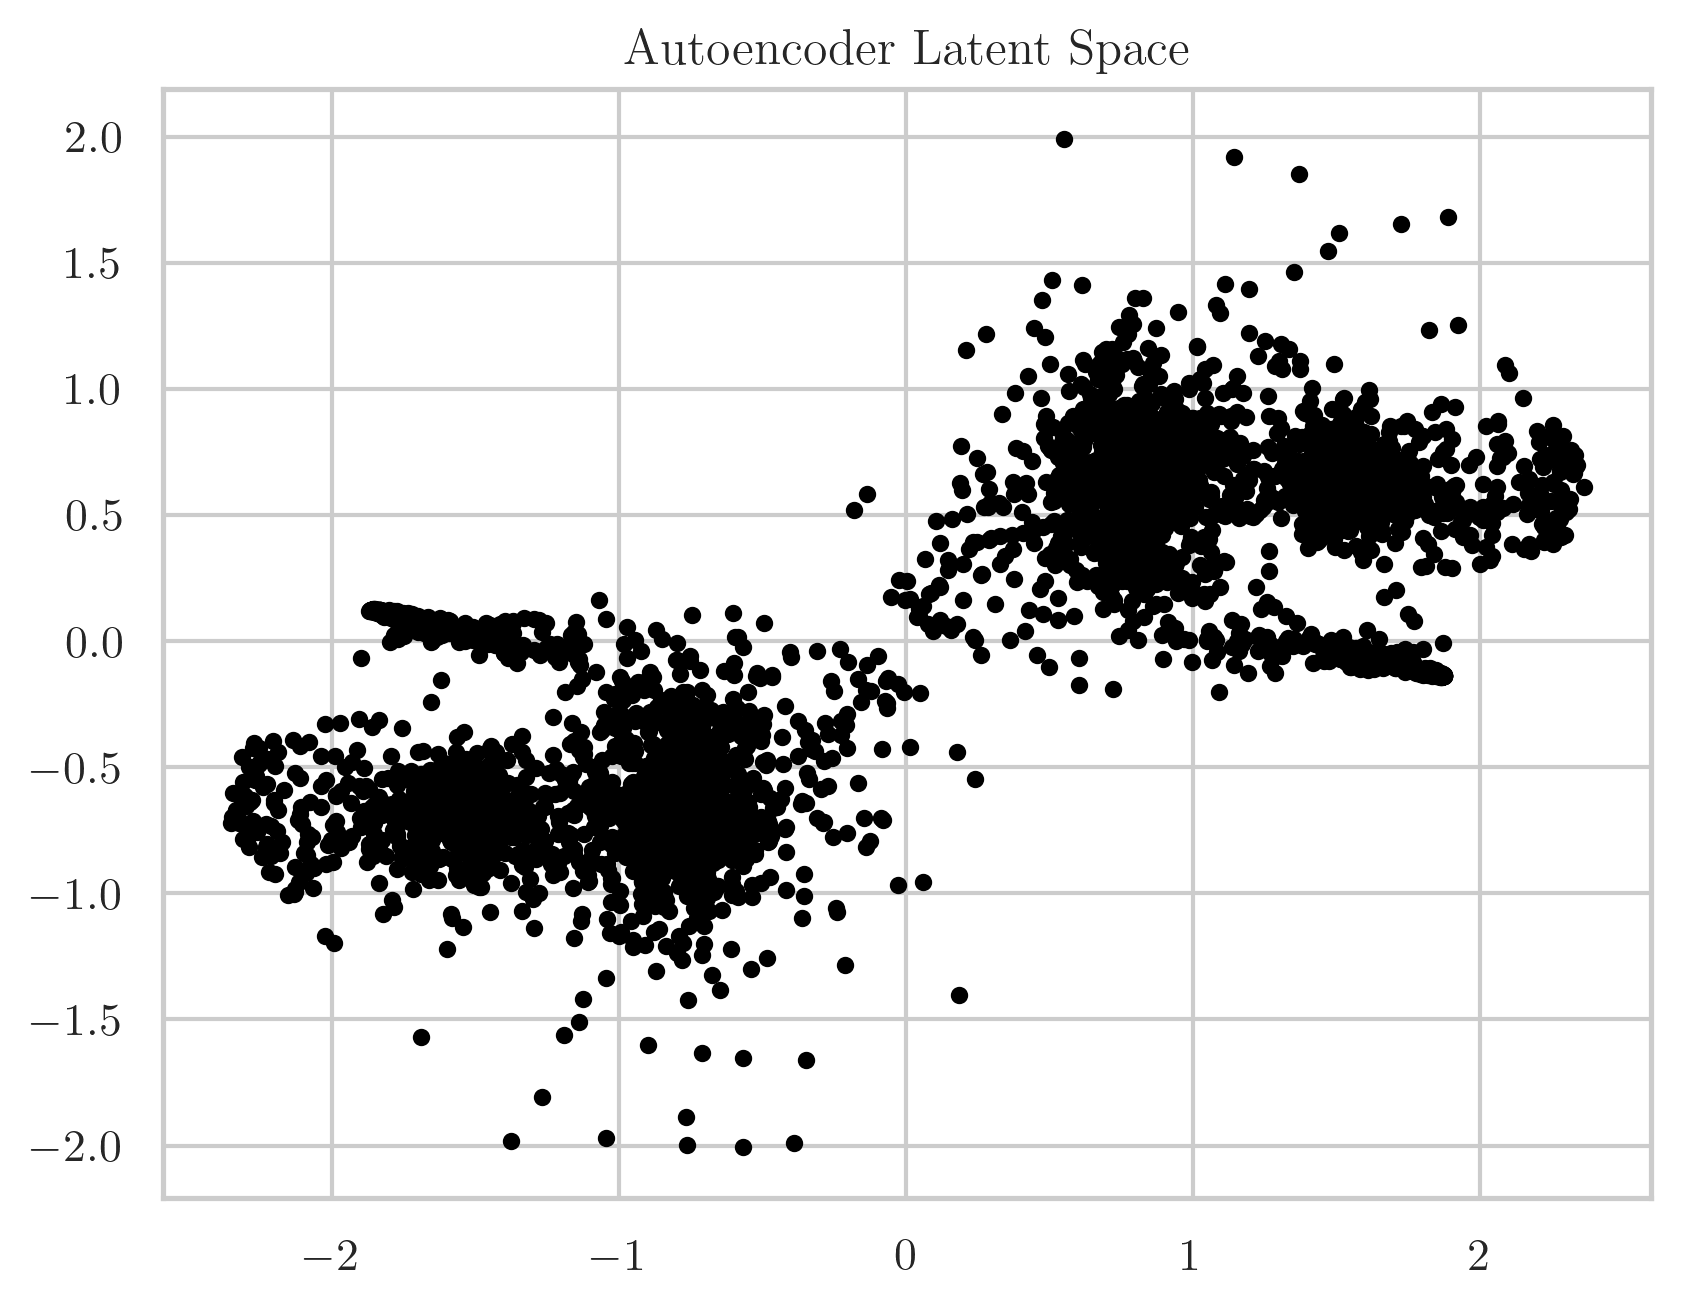

PCA components: (4000, 2)
Nearest Neighbours distances: (4000,)


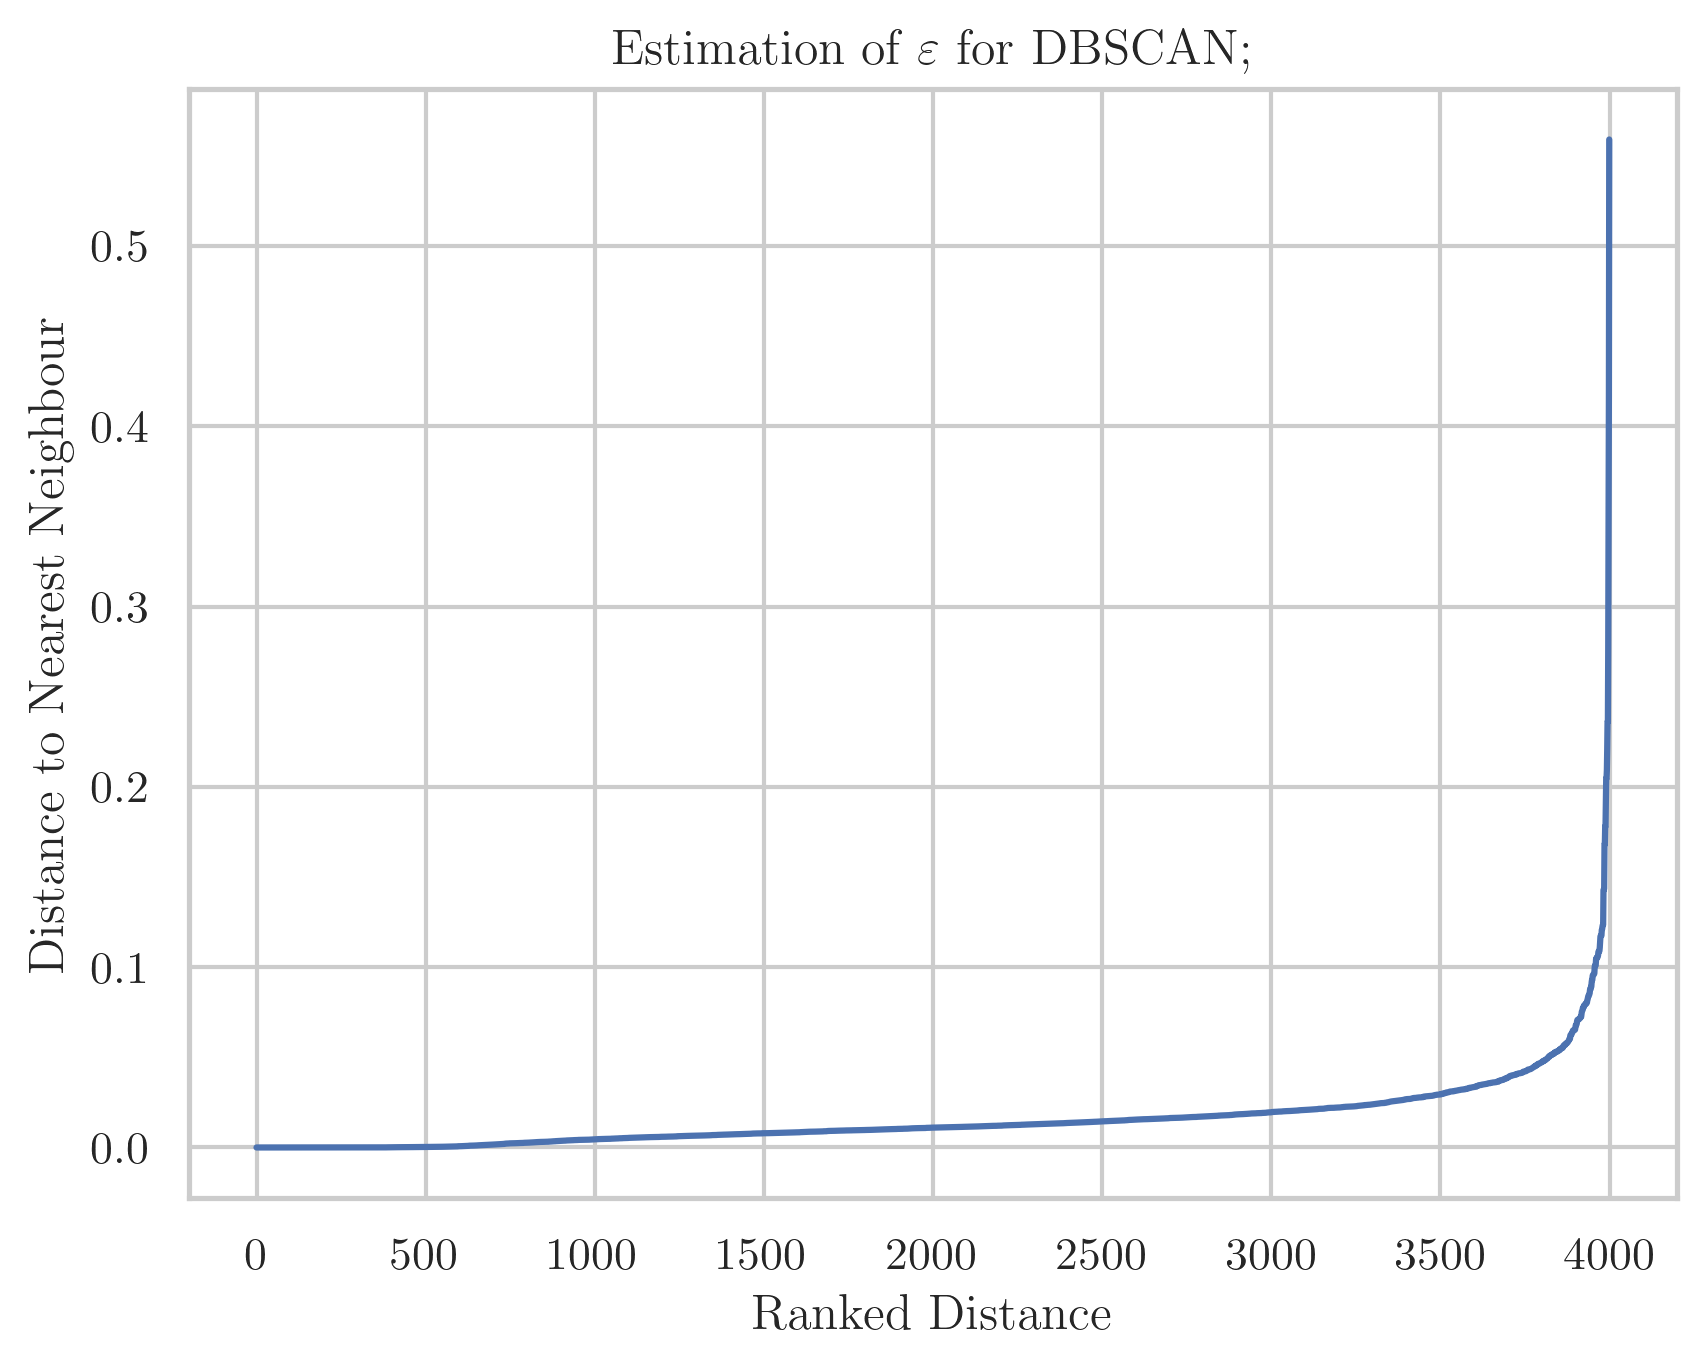

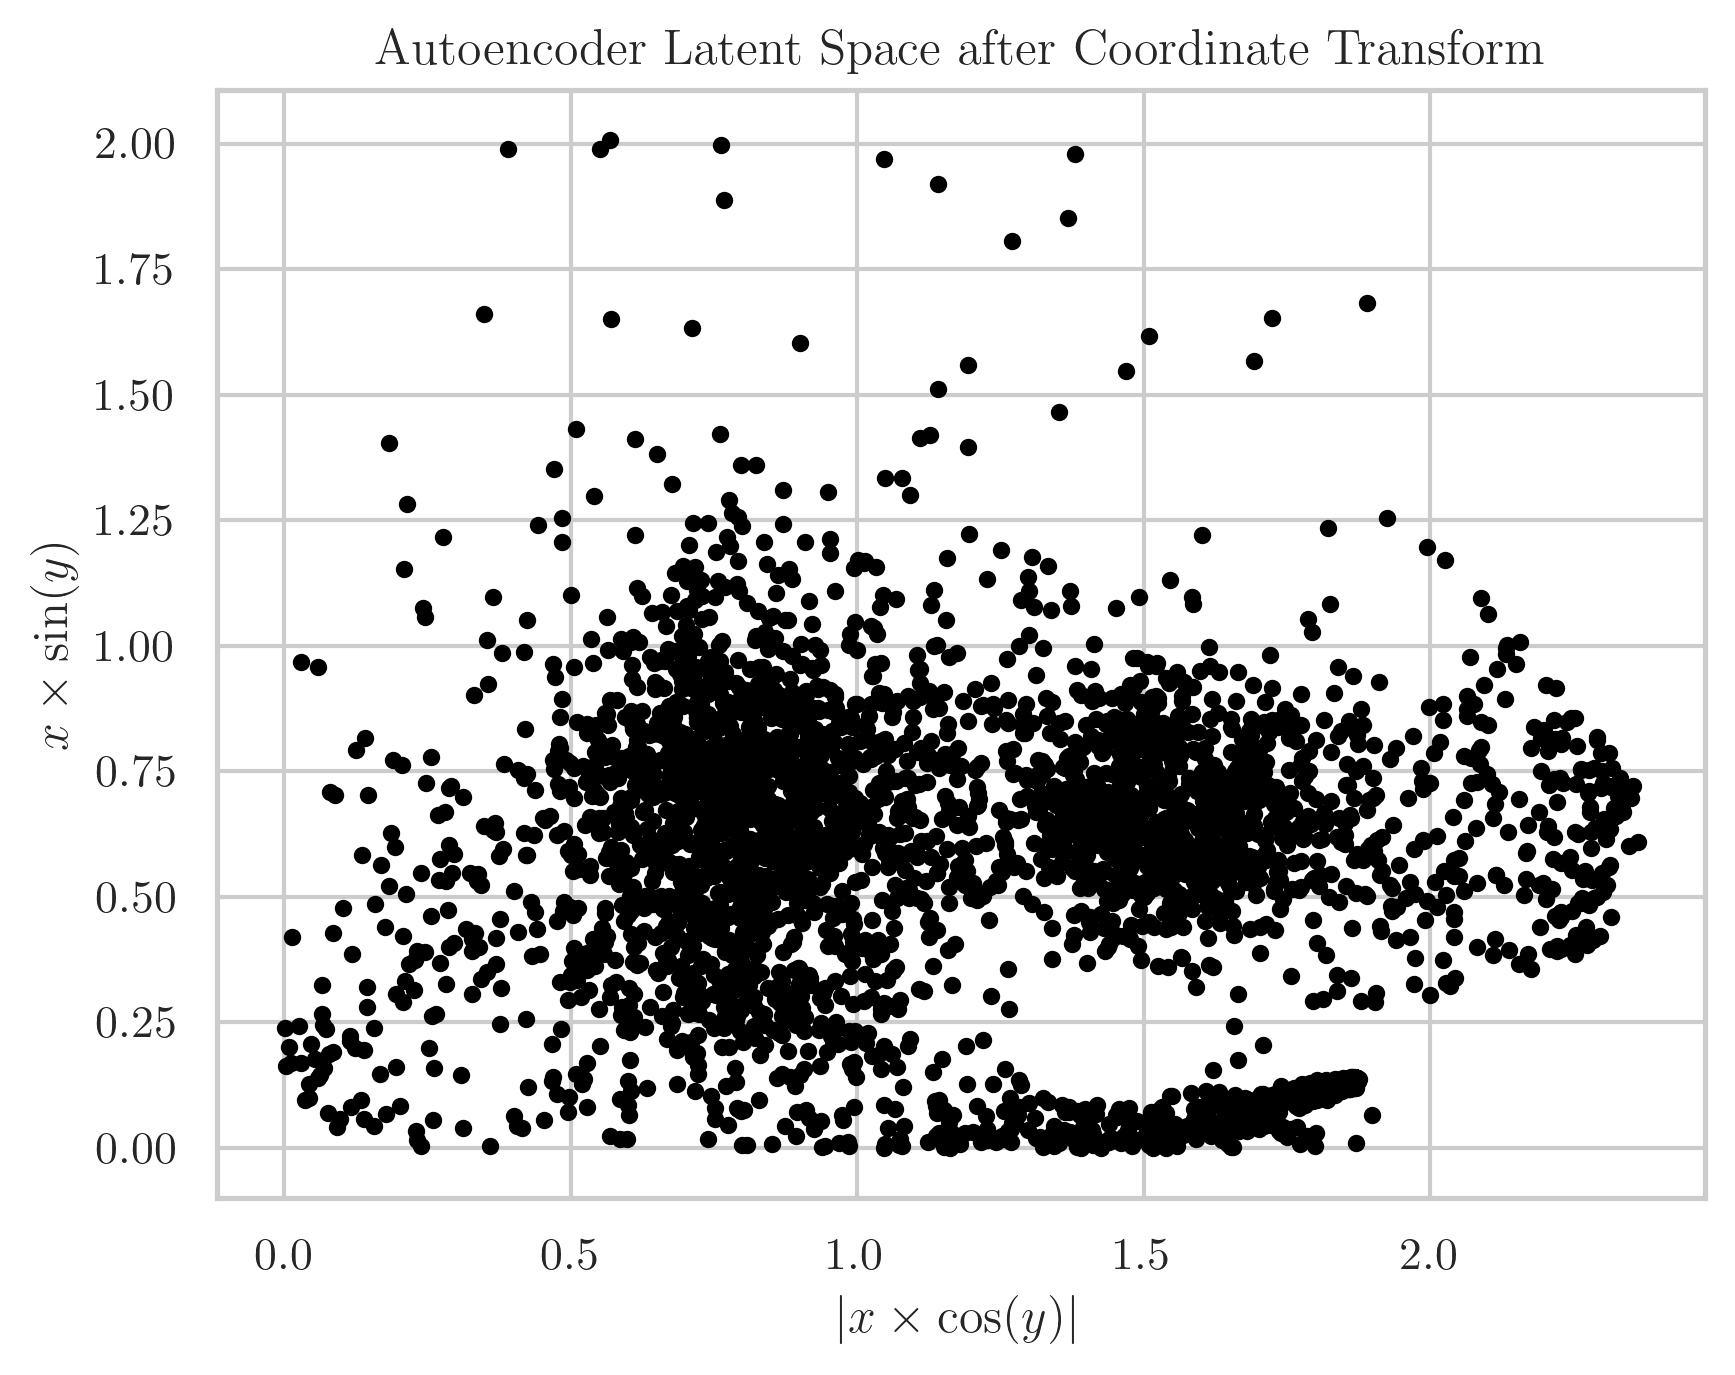

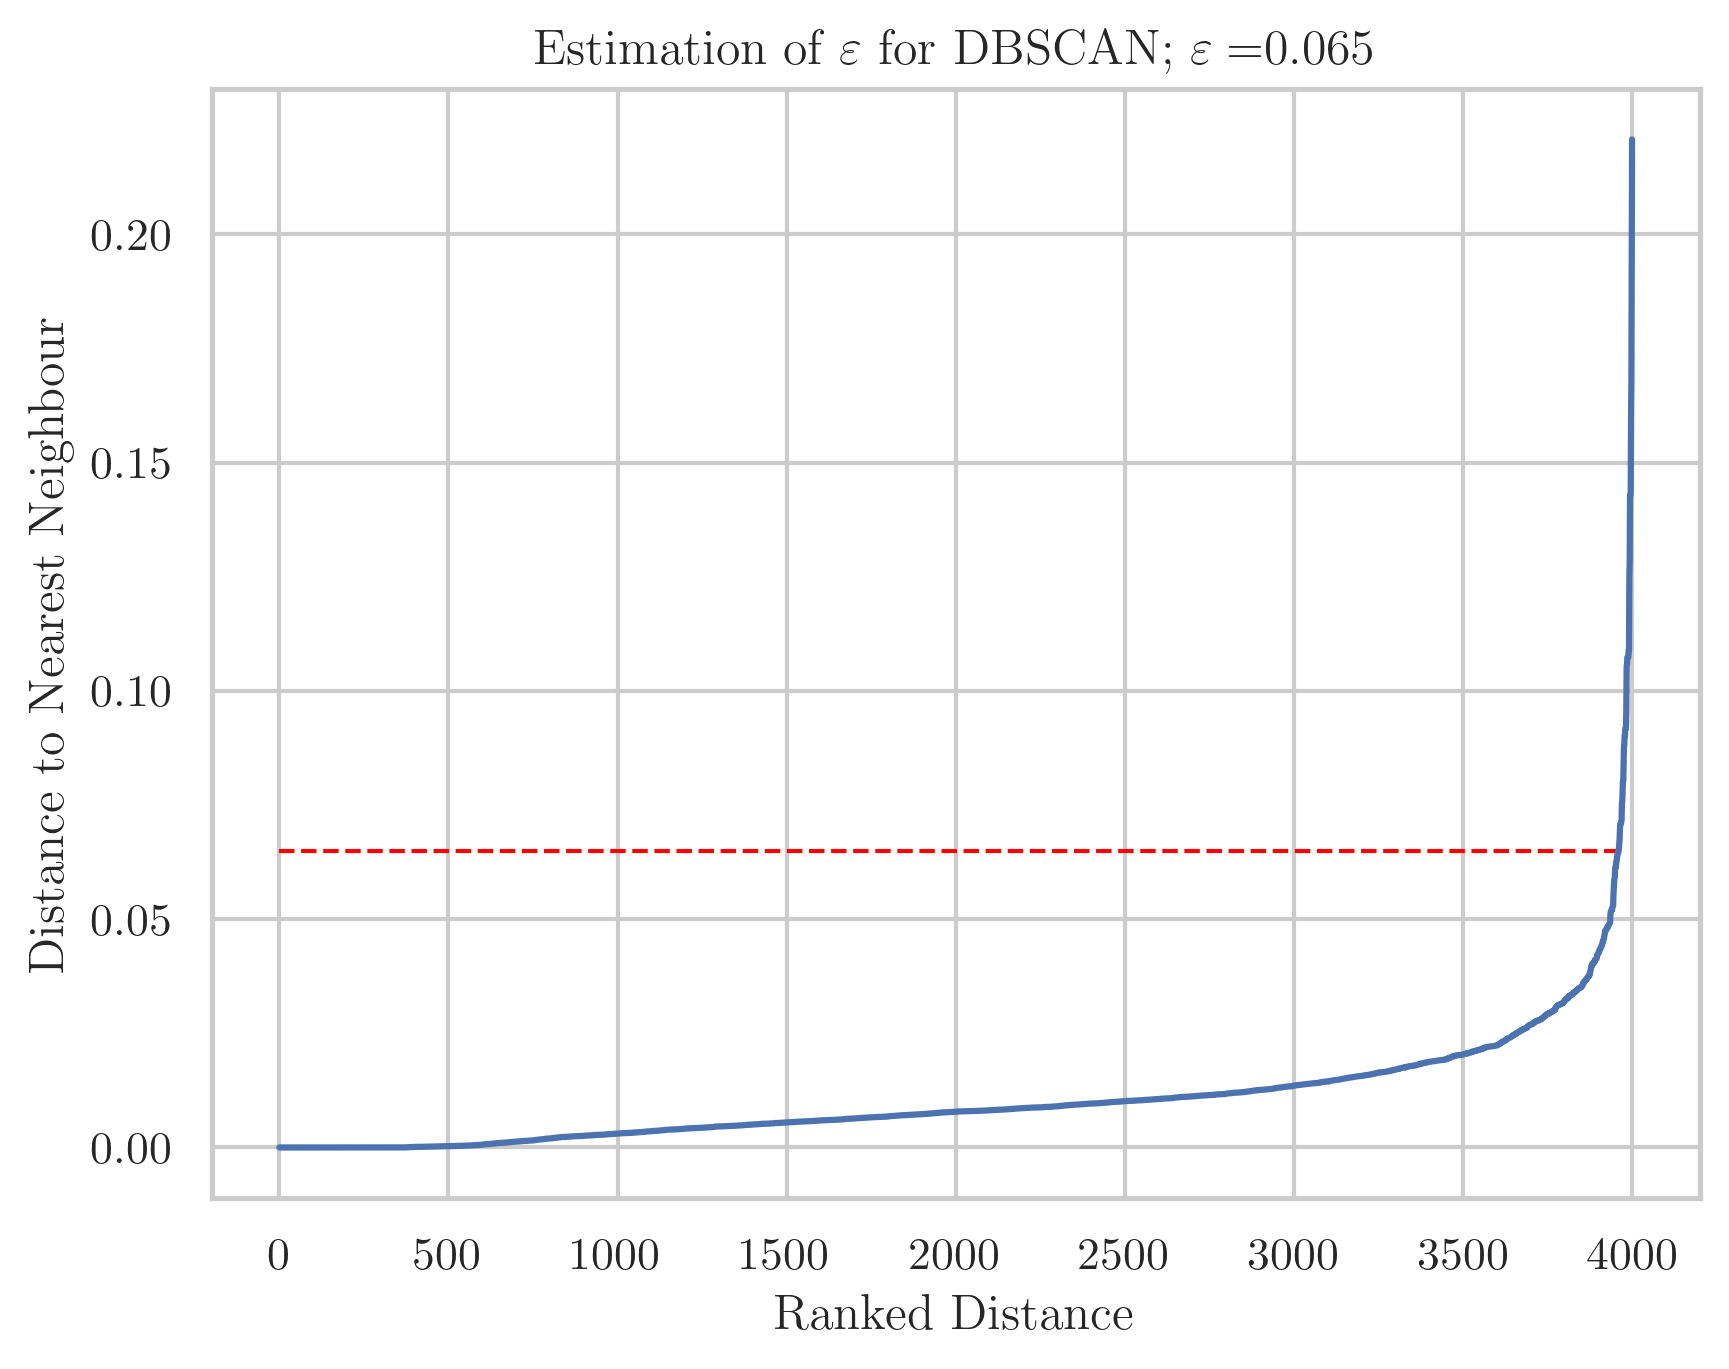

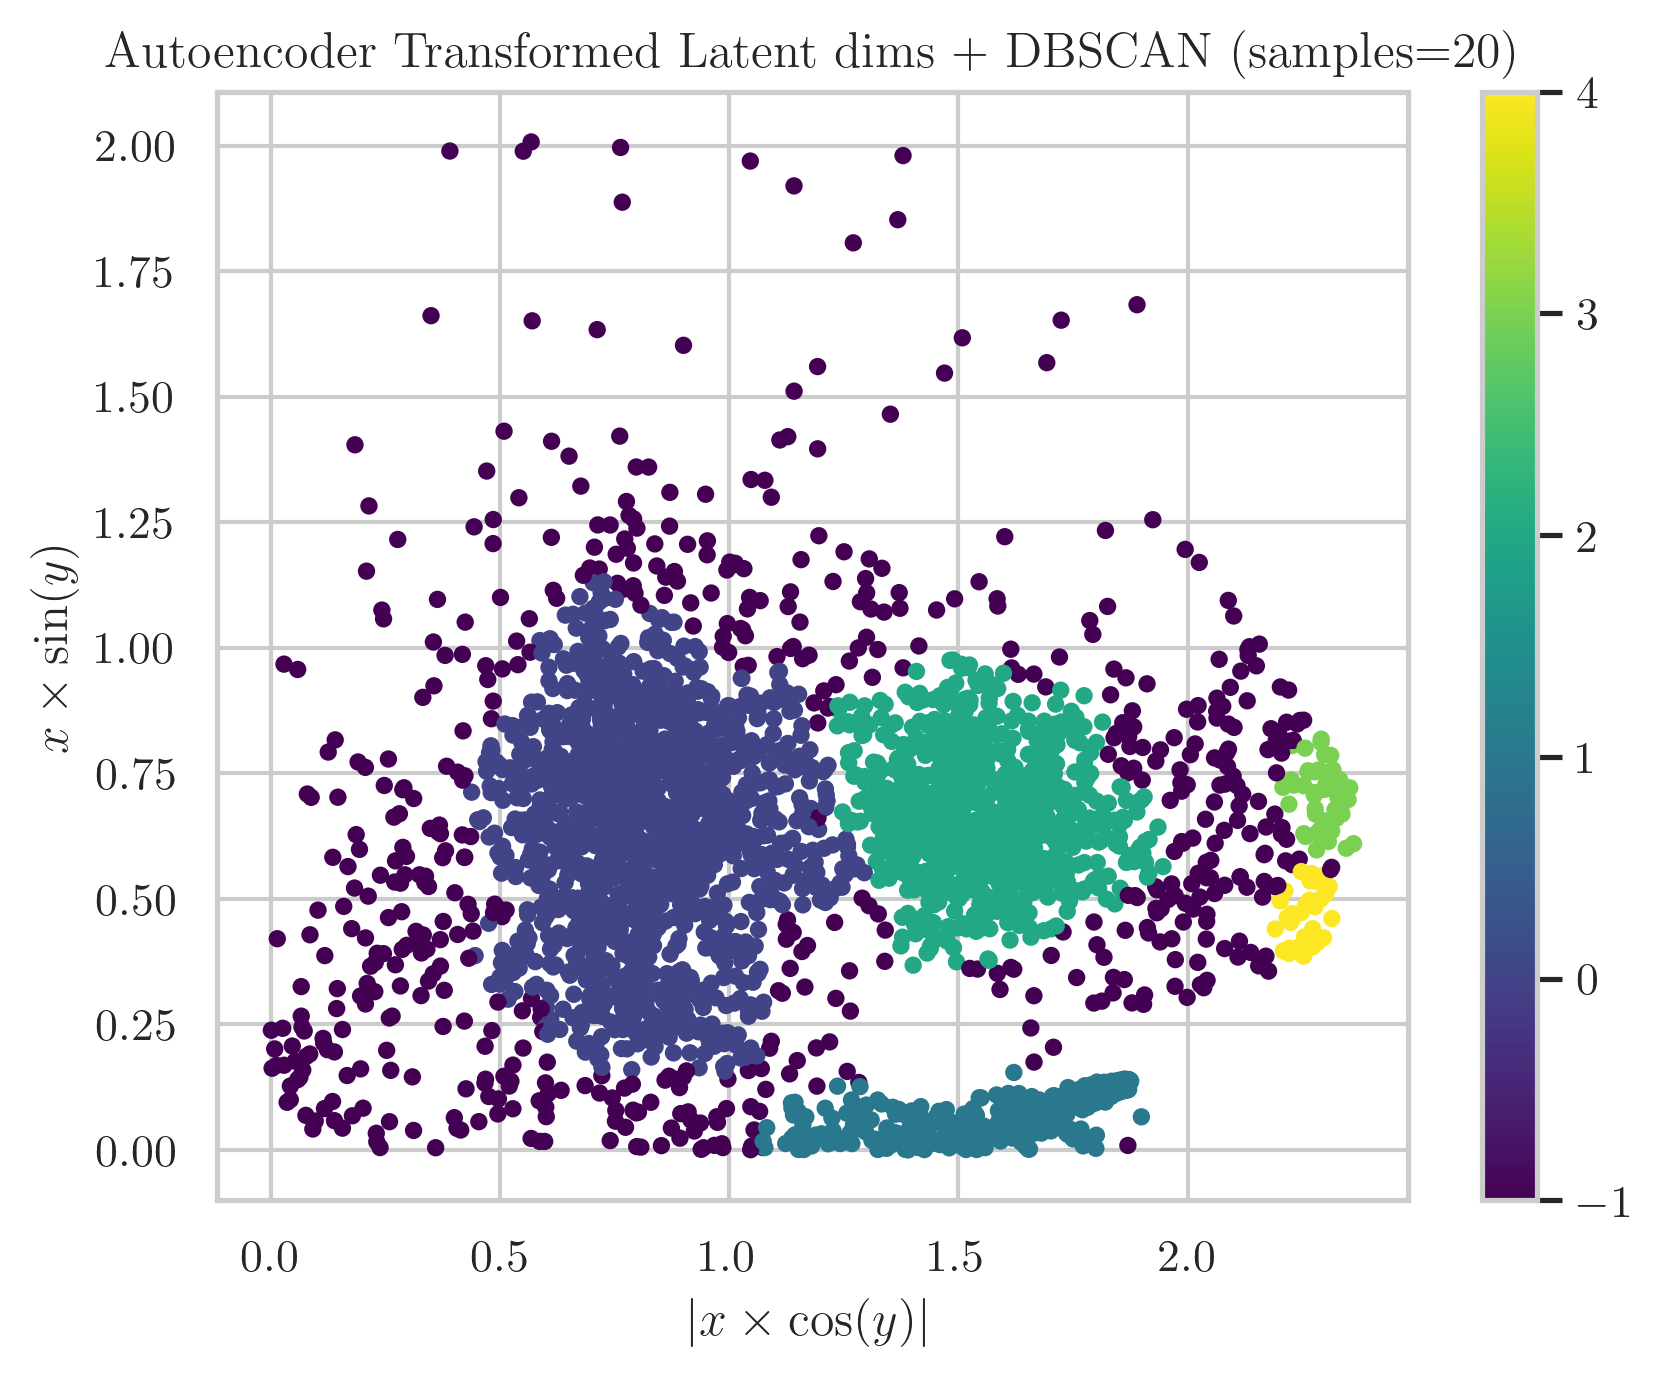

/tmp/ipykernel_1074840/3797502216.py:86: RuntimeWarning: divide by zero encountered in divide
  plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
/tmp/ipykernel_1074840/3797502216.py:87: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )


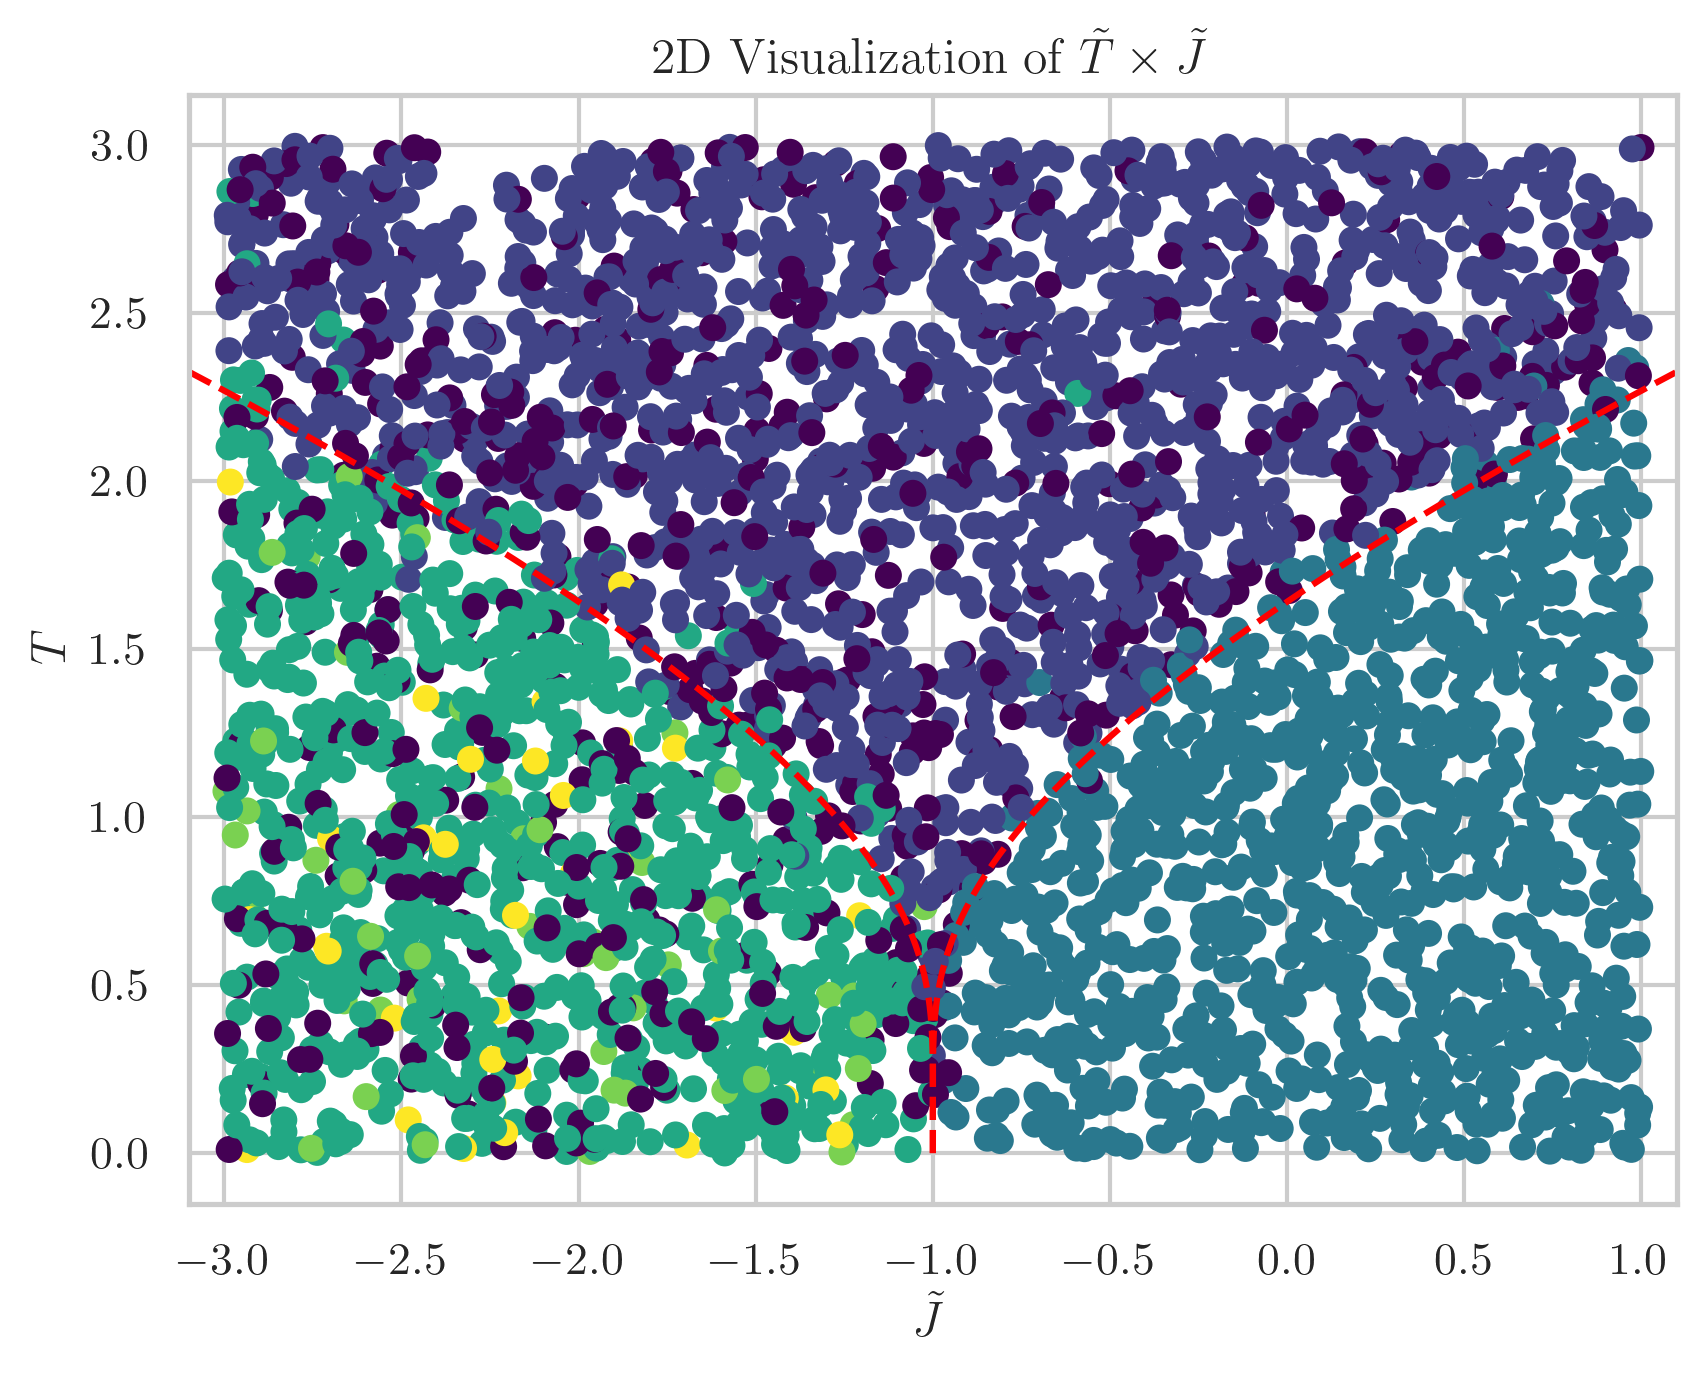

In [42]:
# # Apply t-SNE to reduce latent space to 2D, default perplexity = 30
# # tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# # tSNE_2d = tsne.fit_transform(latent_vectors)


# # pca = PCA(n_components=2)
# # pca_NN = pca.fit_transform(latent_vectors)
# # pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))


# # plt.plot(tSNE_2d[:, 0], tSNE_2d[:, 1], 'o', markersize=1, alpha=0.5, label='t-SNE')

saving = False

L1 = latent_vectors[:, 0]; L2 = latent_vectors[:, 1]
plt.scatter(L1, L2, s=10, c='black', label='PCA (NN)')
plt.title("Autoencoder Latent Space")
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs.png", bbox_inches='tight')
plt.show()
print("PCA components:", latent_vectors.shape)

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(latent_vectors)
distances2,_ = neighbours_fit2.kneighbors(latent_vectors)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)
print("Nearest Neighbours distances:", distances2.shape)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN;')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/epsilon", bbox_inches='tight')
plt.show()


# coordinate transformation
L1 = np.abs(latent_vectors[:, 0]); L2 = np.abs(latent_vectors[:, 1])
aeTrans = np.column_stack((L1, L2))

plt.scatter(L1, L2, s=10, c='black')
plt.title("Autoencoder Latent Space after Coordinate Transform")
plt.xlabel(r'$|x\times\cos(y)|$')
plt.ylabel(r'$x\times\sin(y)$')
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans.png", bbox_inches='tight')
plt.show()

# neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(aeTrans)
distances2,_ = neighbours_fit2.kneighbors(aeTrans)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)



epsilon = 0.065
min_samples = 20
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(aeTrans)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(rf'Estimation of $\varepsilon$ for DBSCAN; $\varepsilon=${epsilon}')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.150)
# plt.xlim(3550, 4000)
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/epsilon_Trans.png", bbox_inches='tight')
plt.show()

scatter2 = plt.scatter(L1, L2, c=labels2, cmap='viridis', s=10)
plt.colorbar(scatter2)
plt.title("Autoencoder Transformed Latent dims + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel(r'$|x\times\cos(y)|$')
plt.ylabel(r'$x\times\sin(y)$')
# plt.legend()
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans+DBSCAN.png", bbox_inches='tight')
plt.show()



plt.scatter(params[:, 0], params[:,1], c=labels2, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$')
x = np.linspace(0, 3, 400)
plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )
plt.xlim(-3.1,1.1)
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/phases.png", bbox_inches='tight')
plt.show()


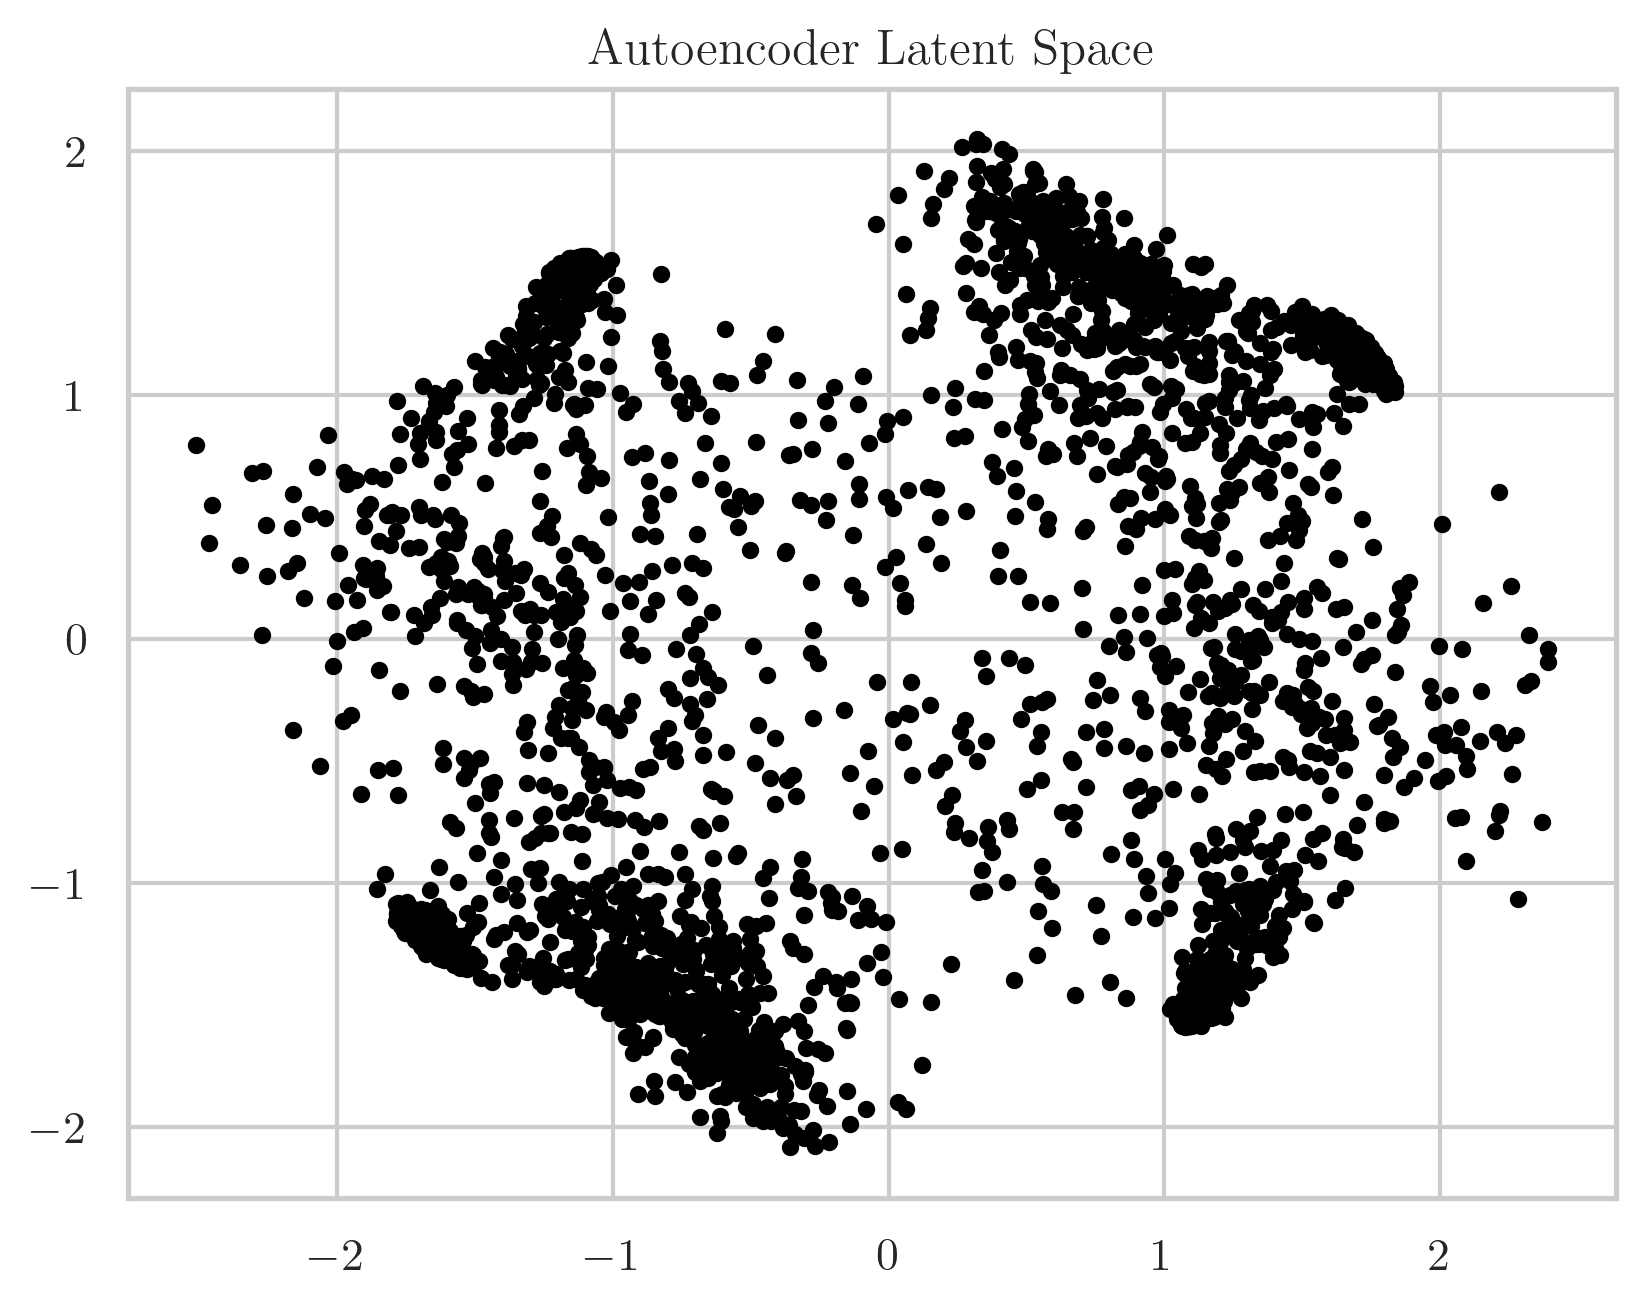

PCA components: (4000, 2)
Nearest Neighbours distances: (4000,)


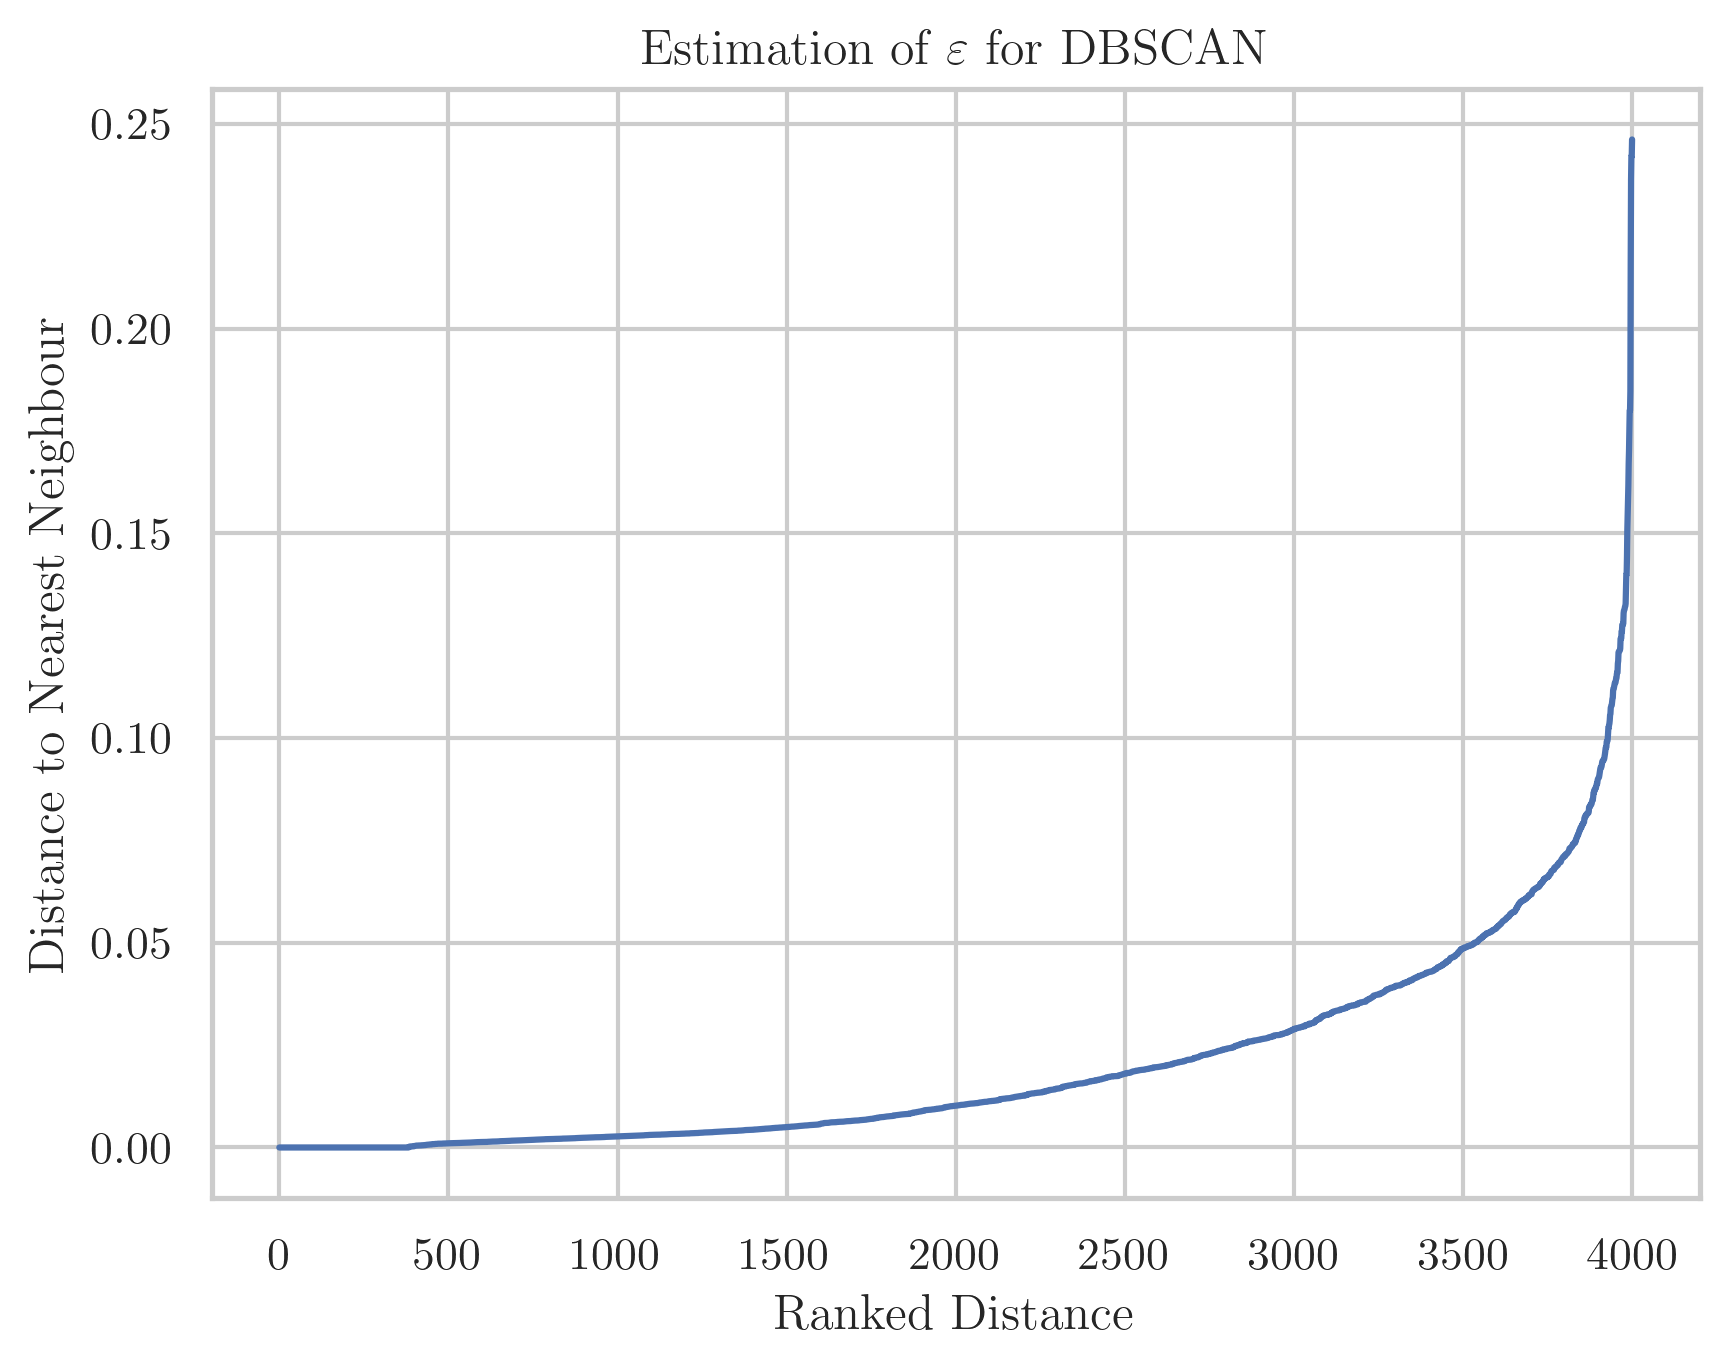

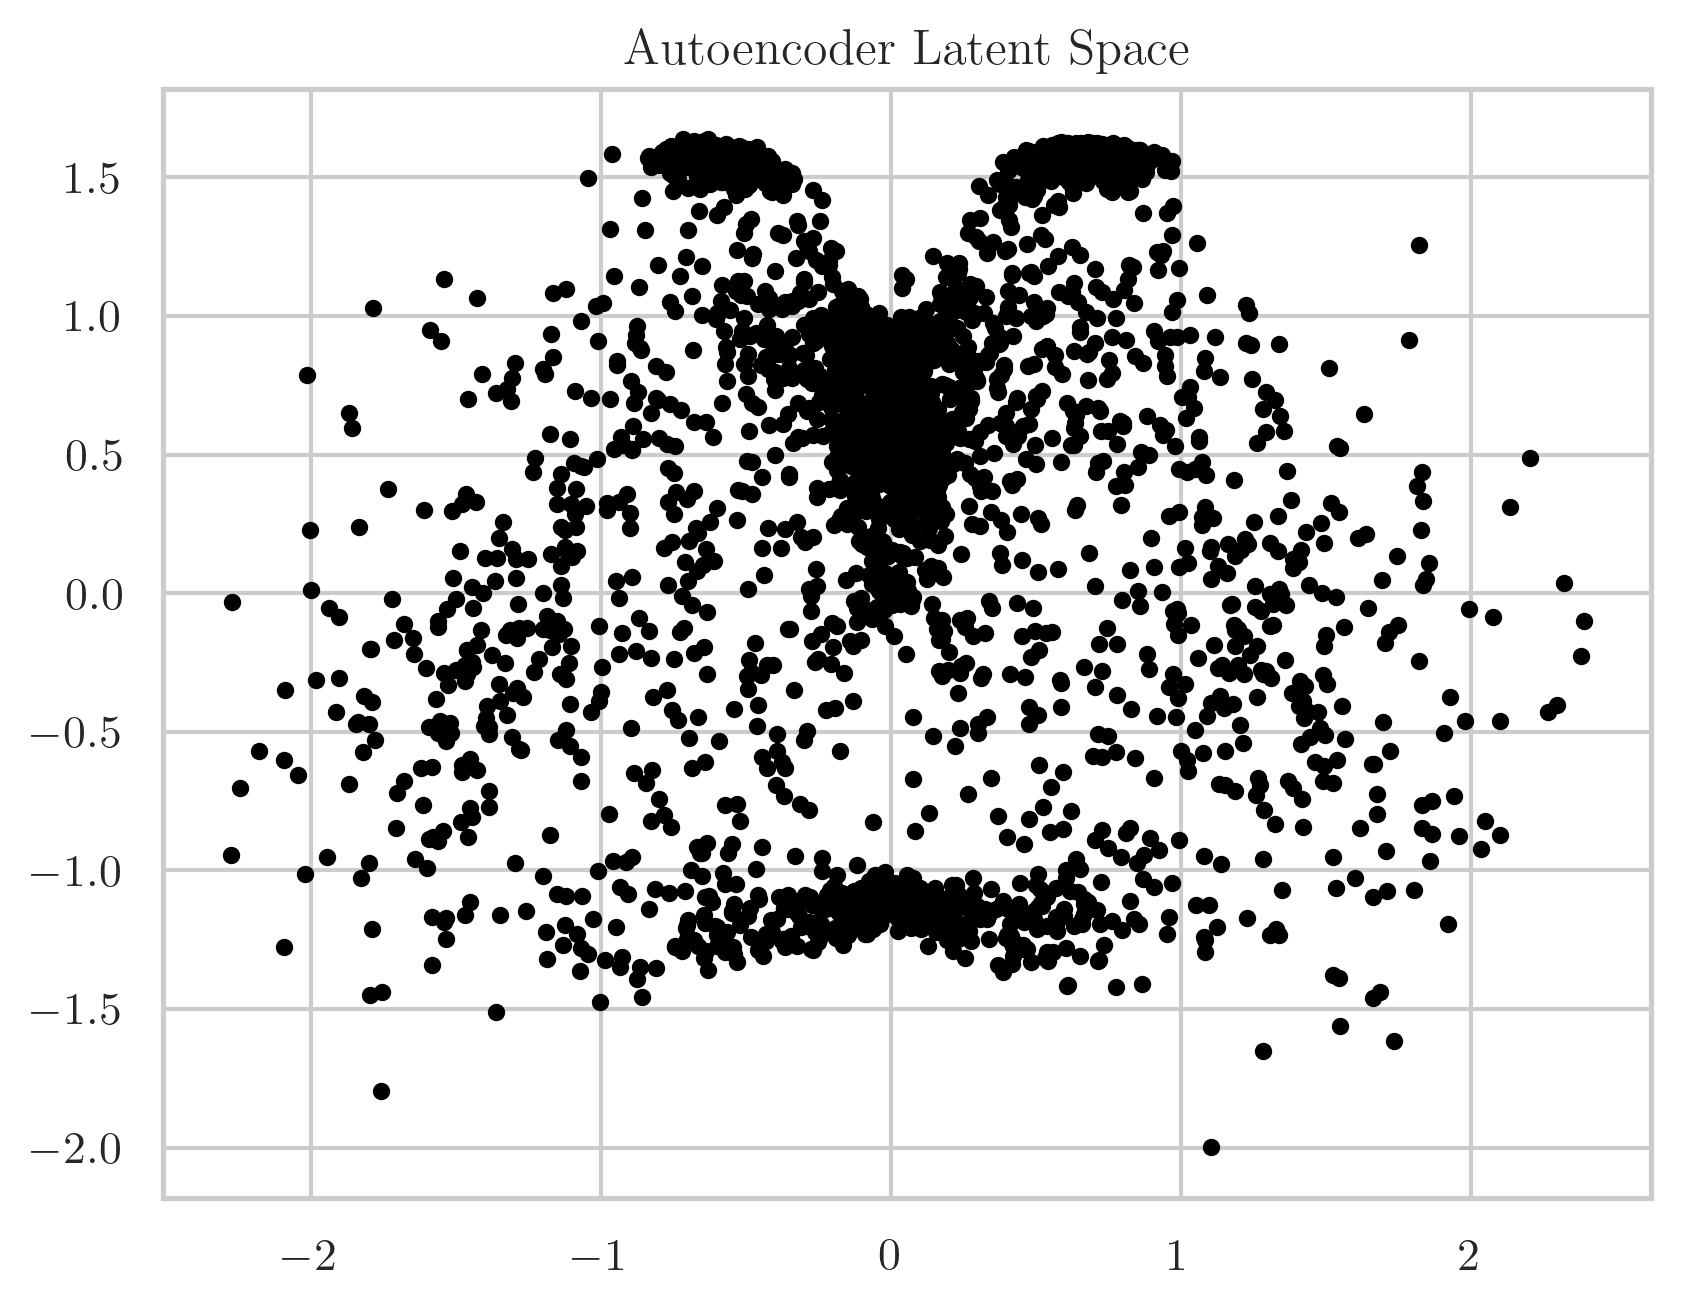

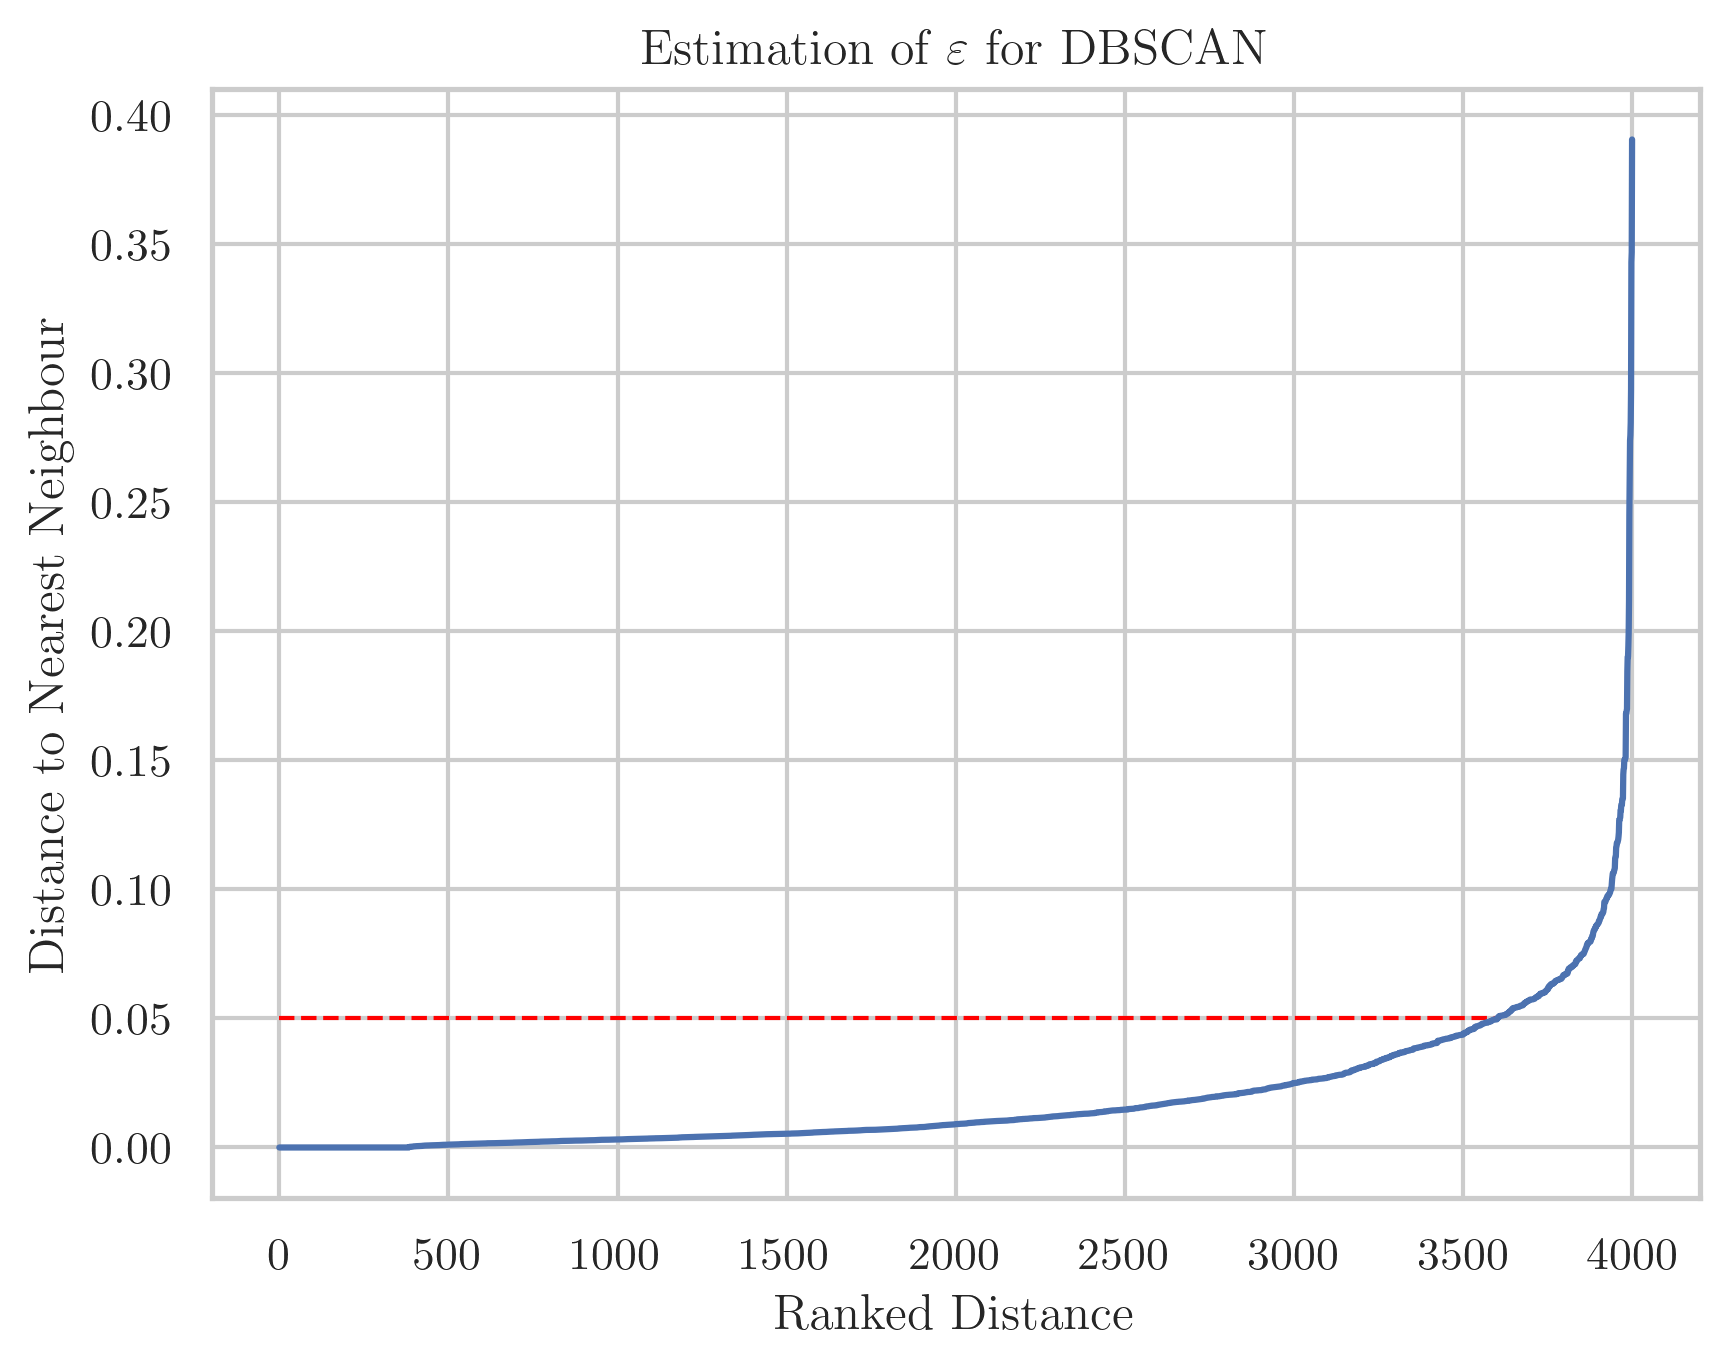

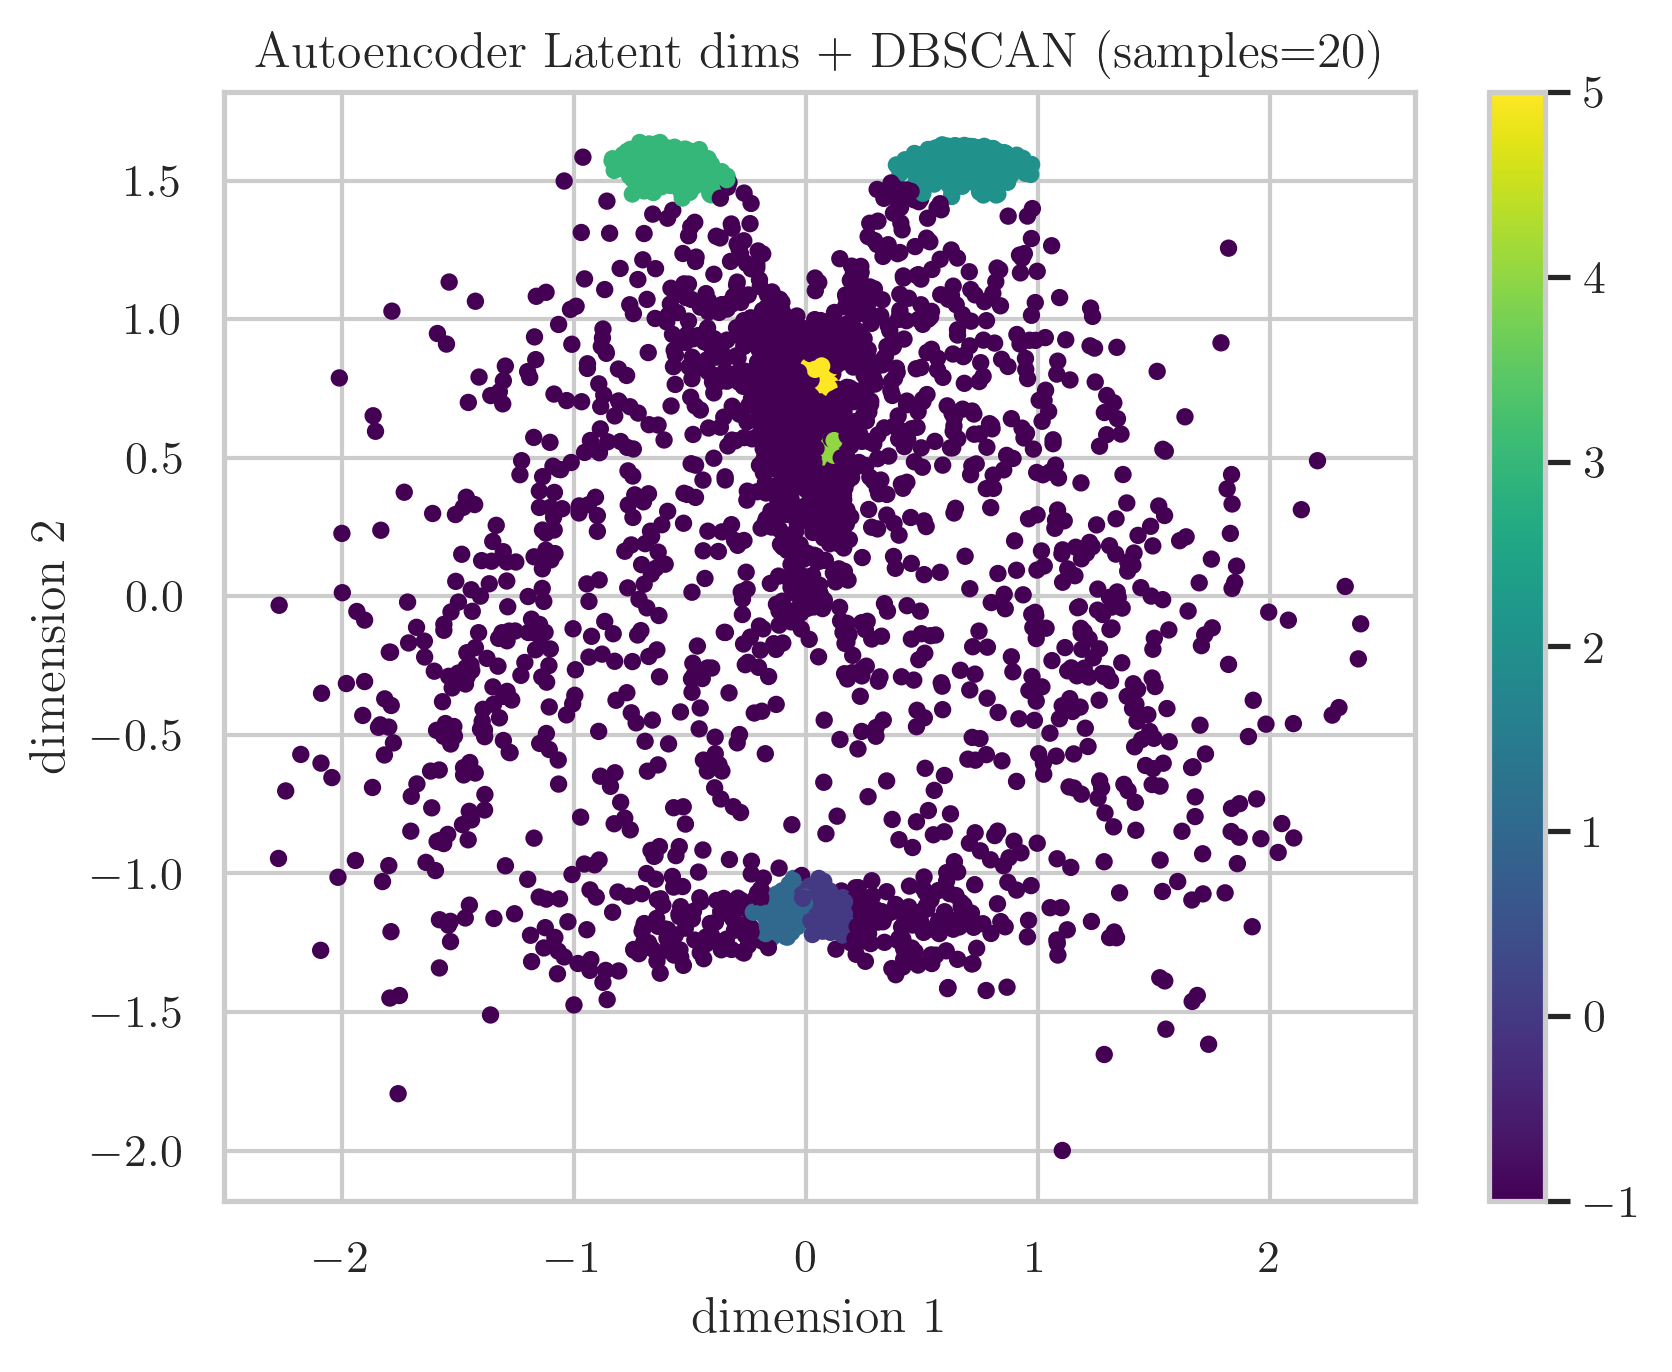

/tmp/ipykernel_676172/629377774.py:83: RuntimeWarning: divide by zero encountered in divide
  plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
/tmp/ipykernel_676172/629377774.py:84: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )


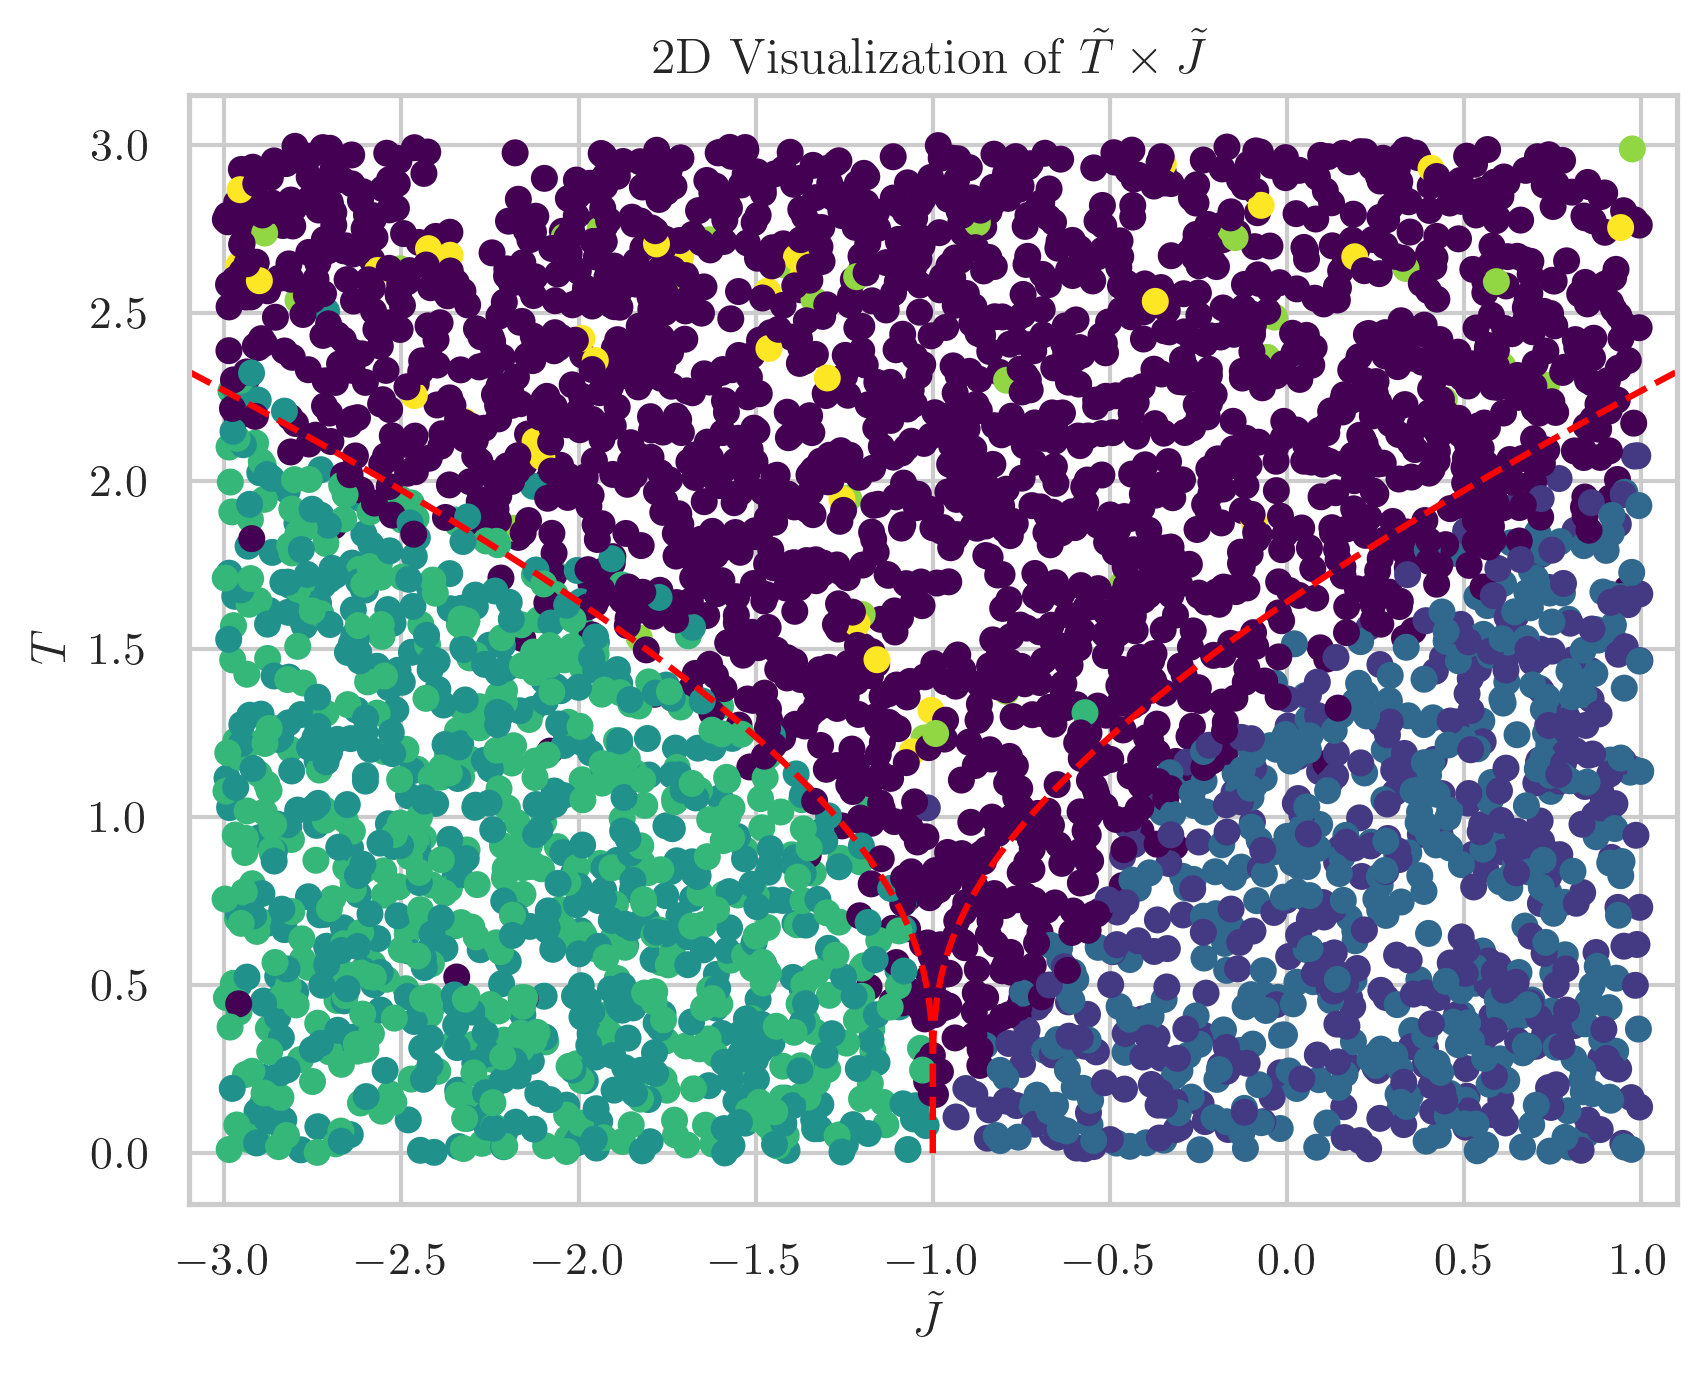

In [40]:
# # Apply t-SNE to reduce latent space to 2D, default perplexity = 30
# # tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# # tSNE_2d = tsne.fit_transform(latent_vectors)


# # pca = PCA(n_components=2)
# # pca_NN = pca.fit_transform(latent_vectors)
# # pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))


# # plt.plot(tSNE_2d[:, 0], tSNE_2d[:, 1], 'o', markersize=1, alpha=0.5, label='t-SNE')


L1 = latent_vectors[:, 0]; L2 = latent_vectors[:, 1]
plt.scatter(L1, L2, s=10, c='black', label='PCA (NN)')
plt.title("Autoencoder Latent Space")
plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs.png", bbox_inches='tight')
plt.show()
print("PCA components:", latent_vectors.shape)

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(latent_vectors)
distances2,_ = neighbours_fit2.kneighbors(latent_vectors)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)
print("Nearest Neighbours distances:", distances2.shape)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/epsilon", bbox_inches='tight')
plt.show()


# coordinate transformation
L1 = latent_vectors[:, 0]*np.cos(latent_vectors[:, 1]); L2 = latent_vectors[:, 0]*np.sin(latent_vectors[:, 1])
aeTrans = np.column_stack((L1, L2))

plt.scatter(L1, L2, s=10, c='black')
plt.title("Autoencoder Latent Space")
plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans.png", bbox_inches='tight')
plt.show()

# neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(aeTrans)
distances2,_ = neighbours_fit2.kneighbors(aeTrans)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)



epsilon = 0.05
min_samples = 20
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(latent_vectors)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.150)
# plt.xlim(3550, 4000)
plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/epsilon_Trans.png", bbox_inches='tight')
plt.show()

scatter2 = plt.scatter(L1, L2, c=labels2, cmap='viridis', s=10)
plt.colorbar(scatter2)
plt.title("Autoencoder Latent dims + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
# plt.legend()
plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans+DBSCAN.png", bbox_inches='tight')
plt.show()



plt.scatter(params[:, 0], params[:,1], c=labels2, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$')
x = np.linspace(0, 3, 400)
plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )
plt.xlim(-3.1,1.1)
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/phases.png", bbox_inches='tight')
plt.show()


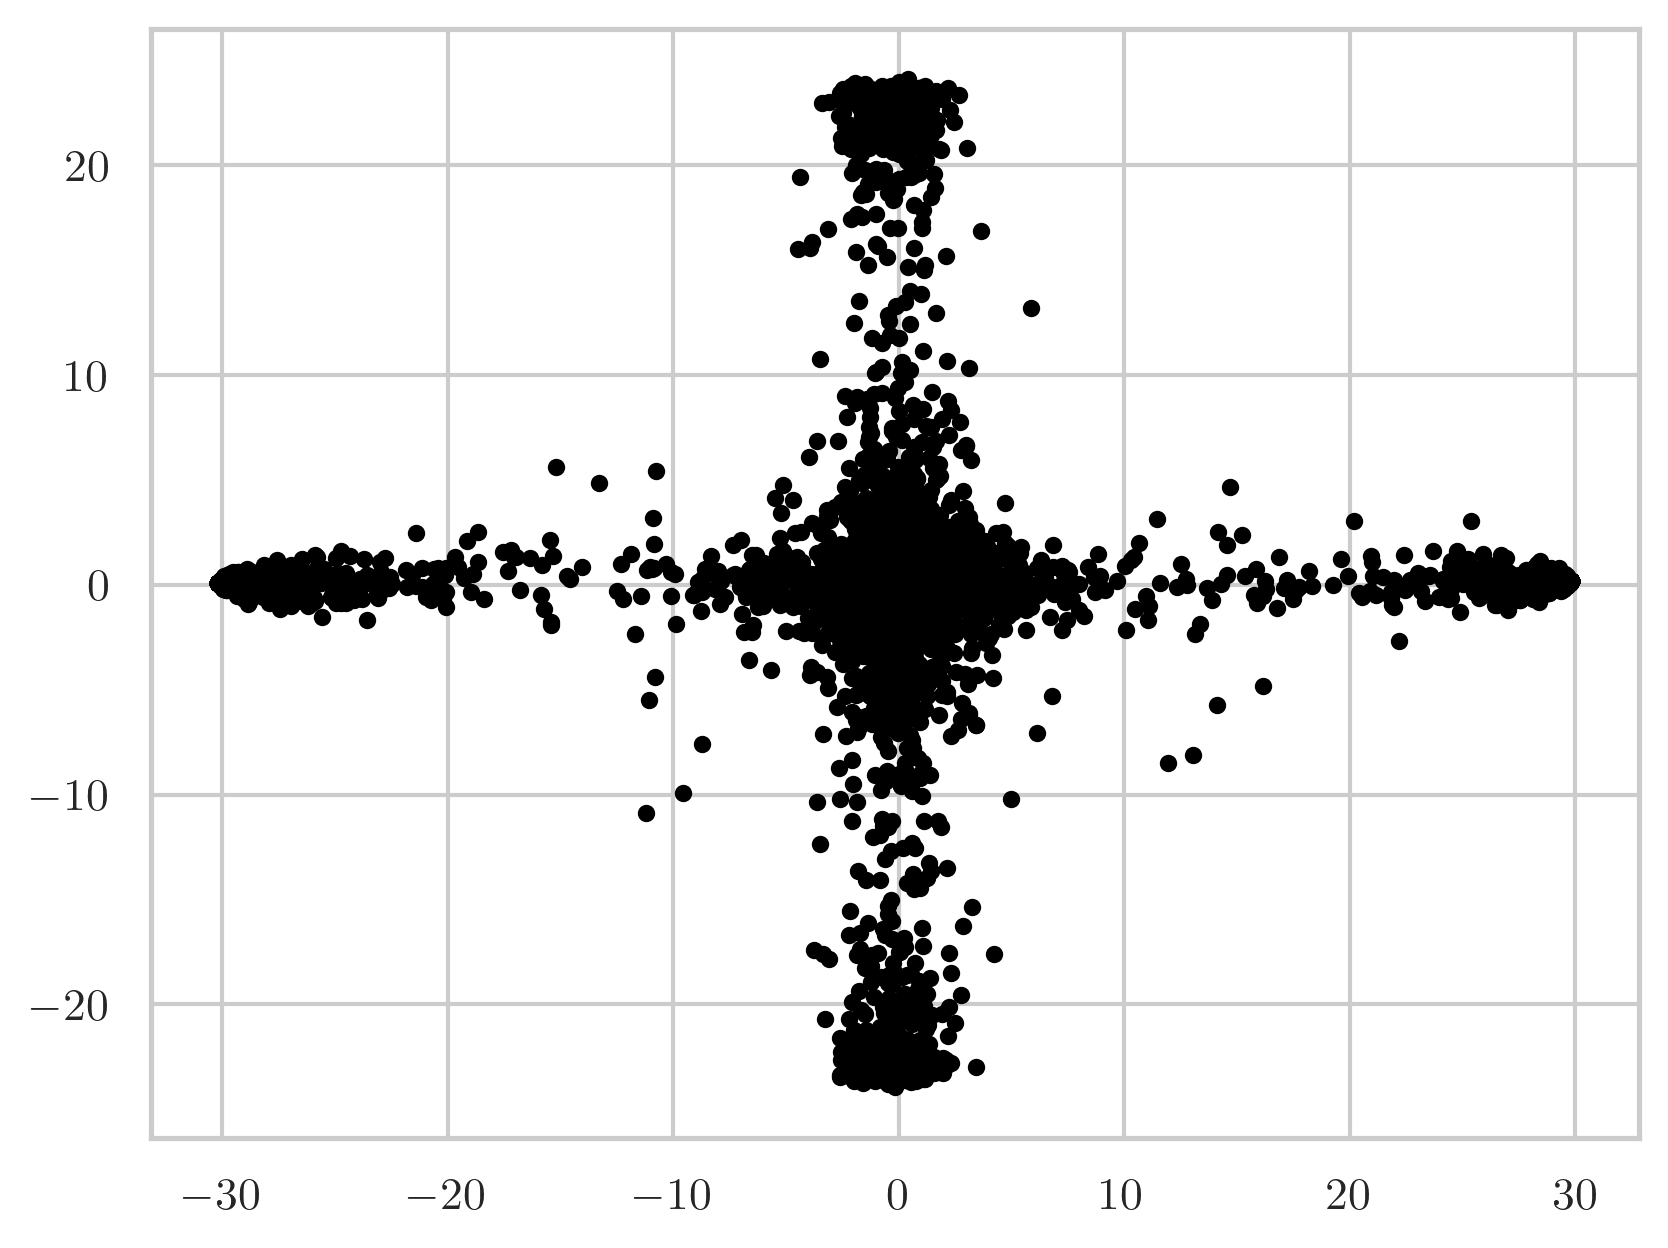

PCA components: (4000, 2)


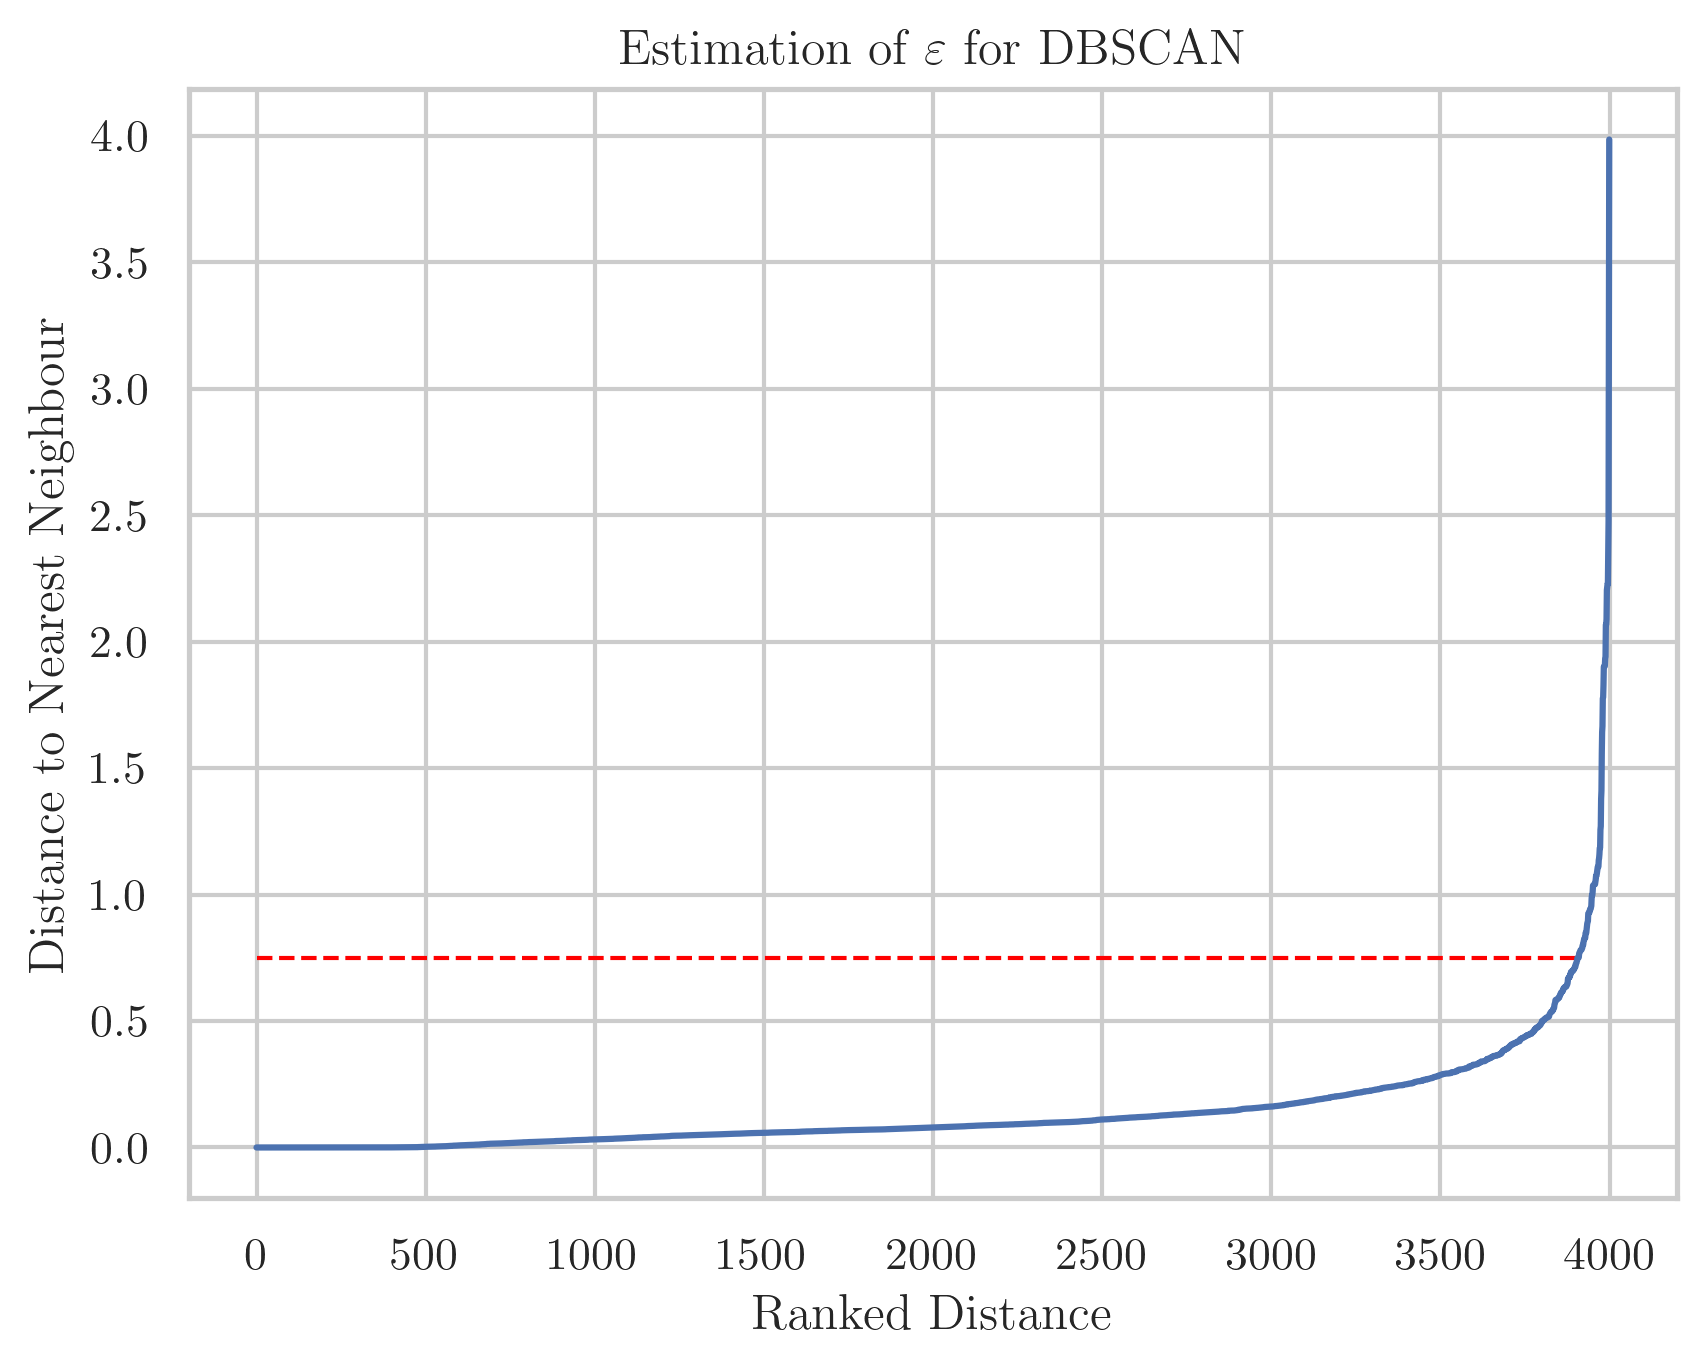

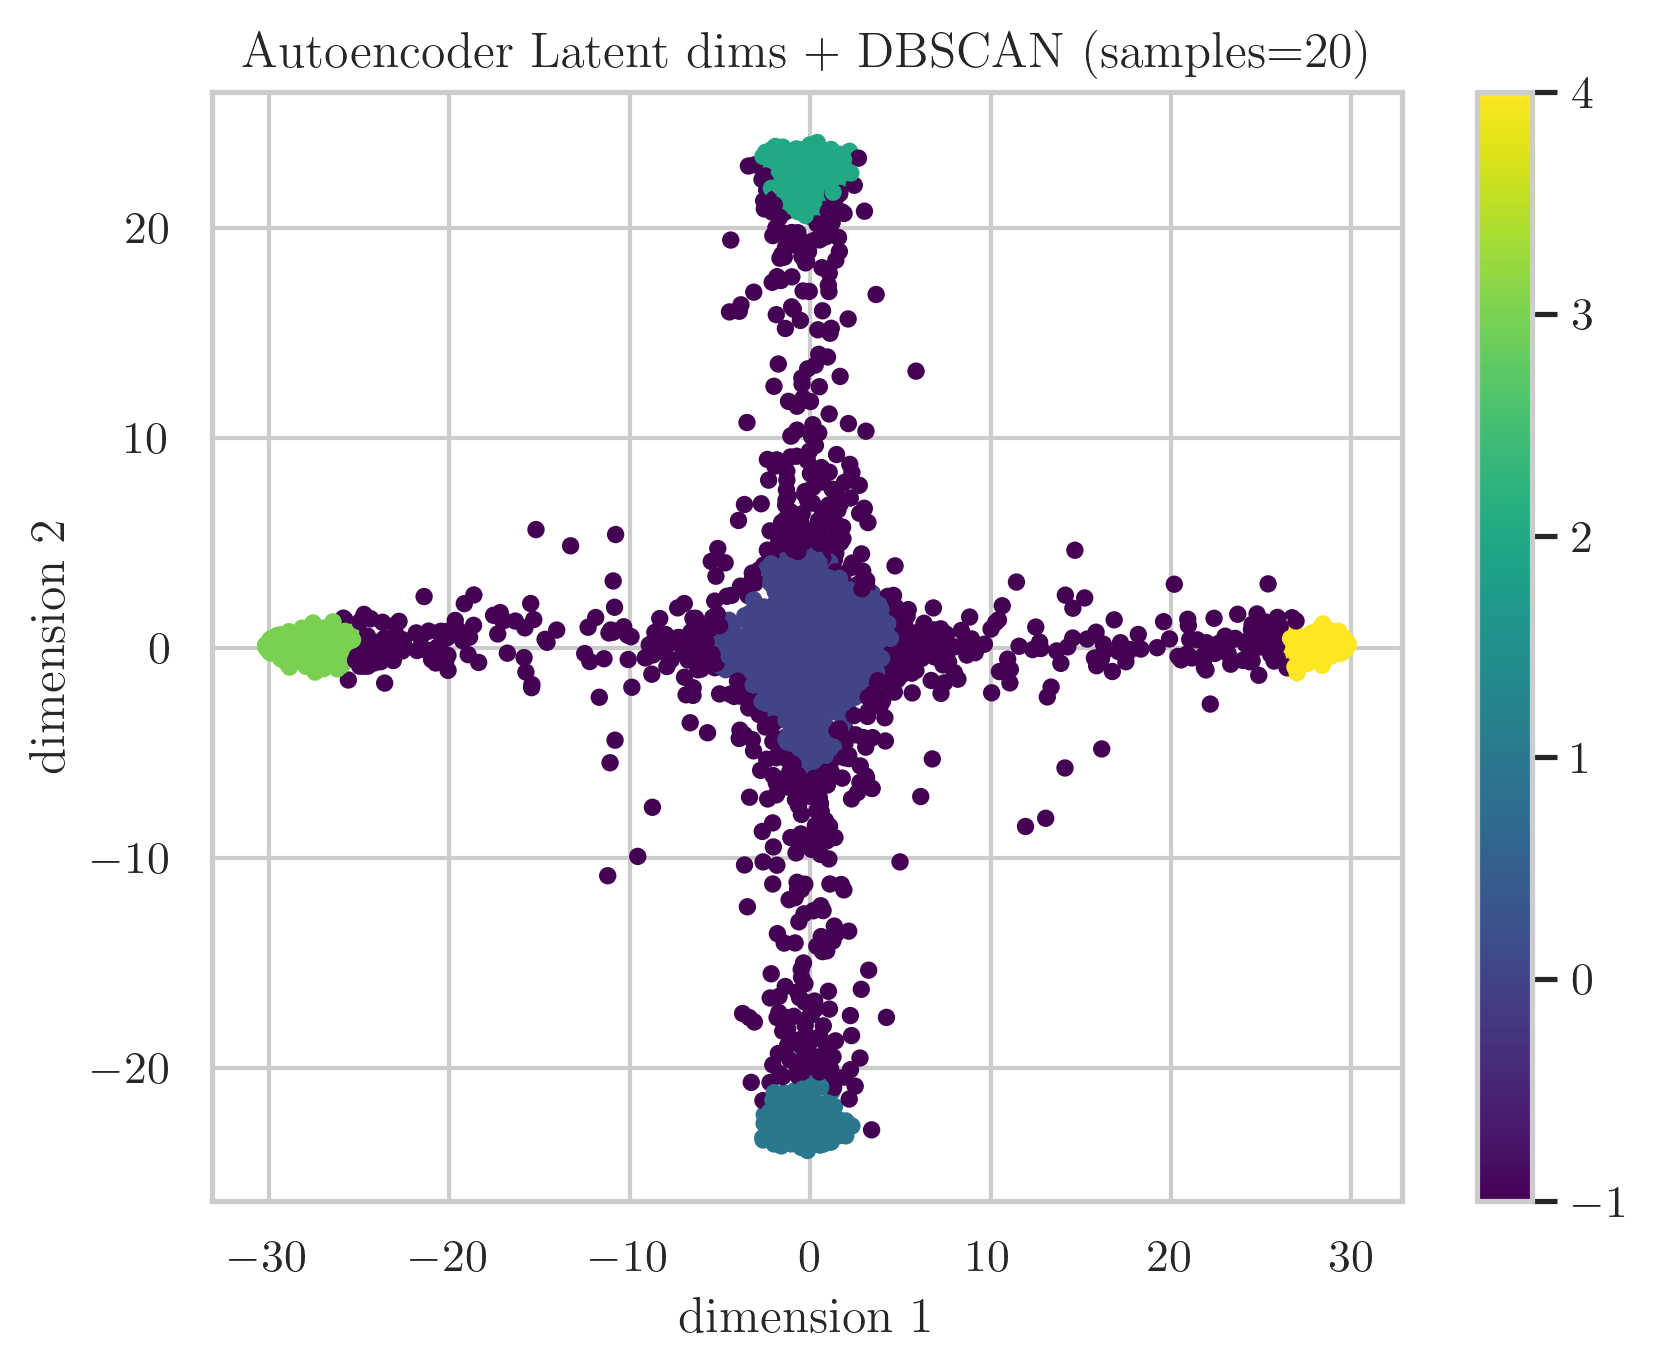

/tmp/ipykernel_1074840/3698857395.py:45: RuntimeWarning: divide by zero encountered in divide
  plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
/tmp/ipykernel_1074840/3698857395.py:46: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )


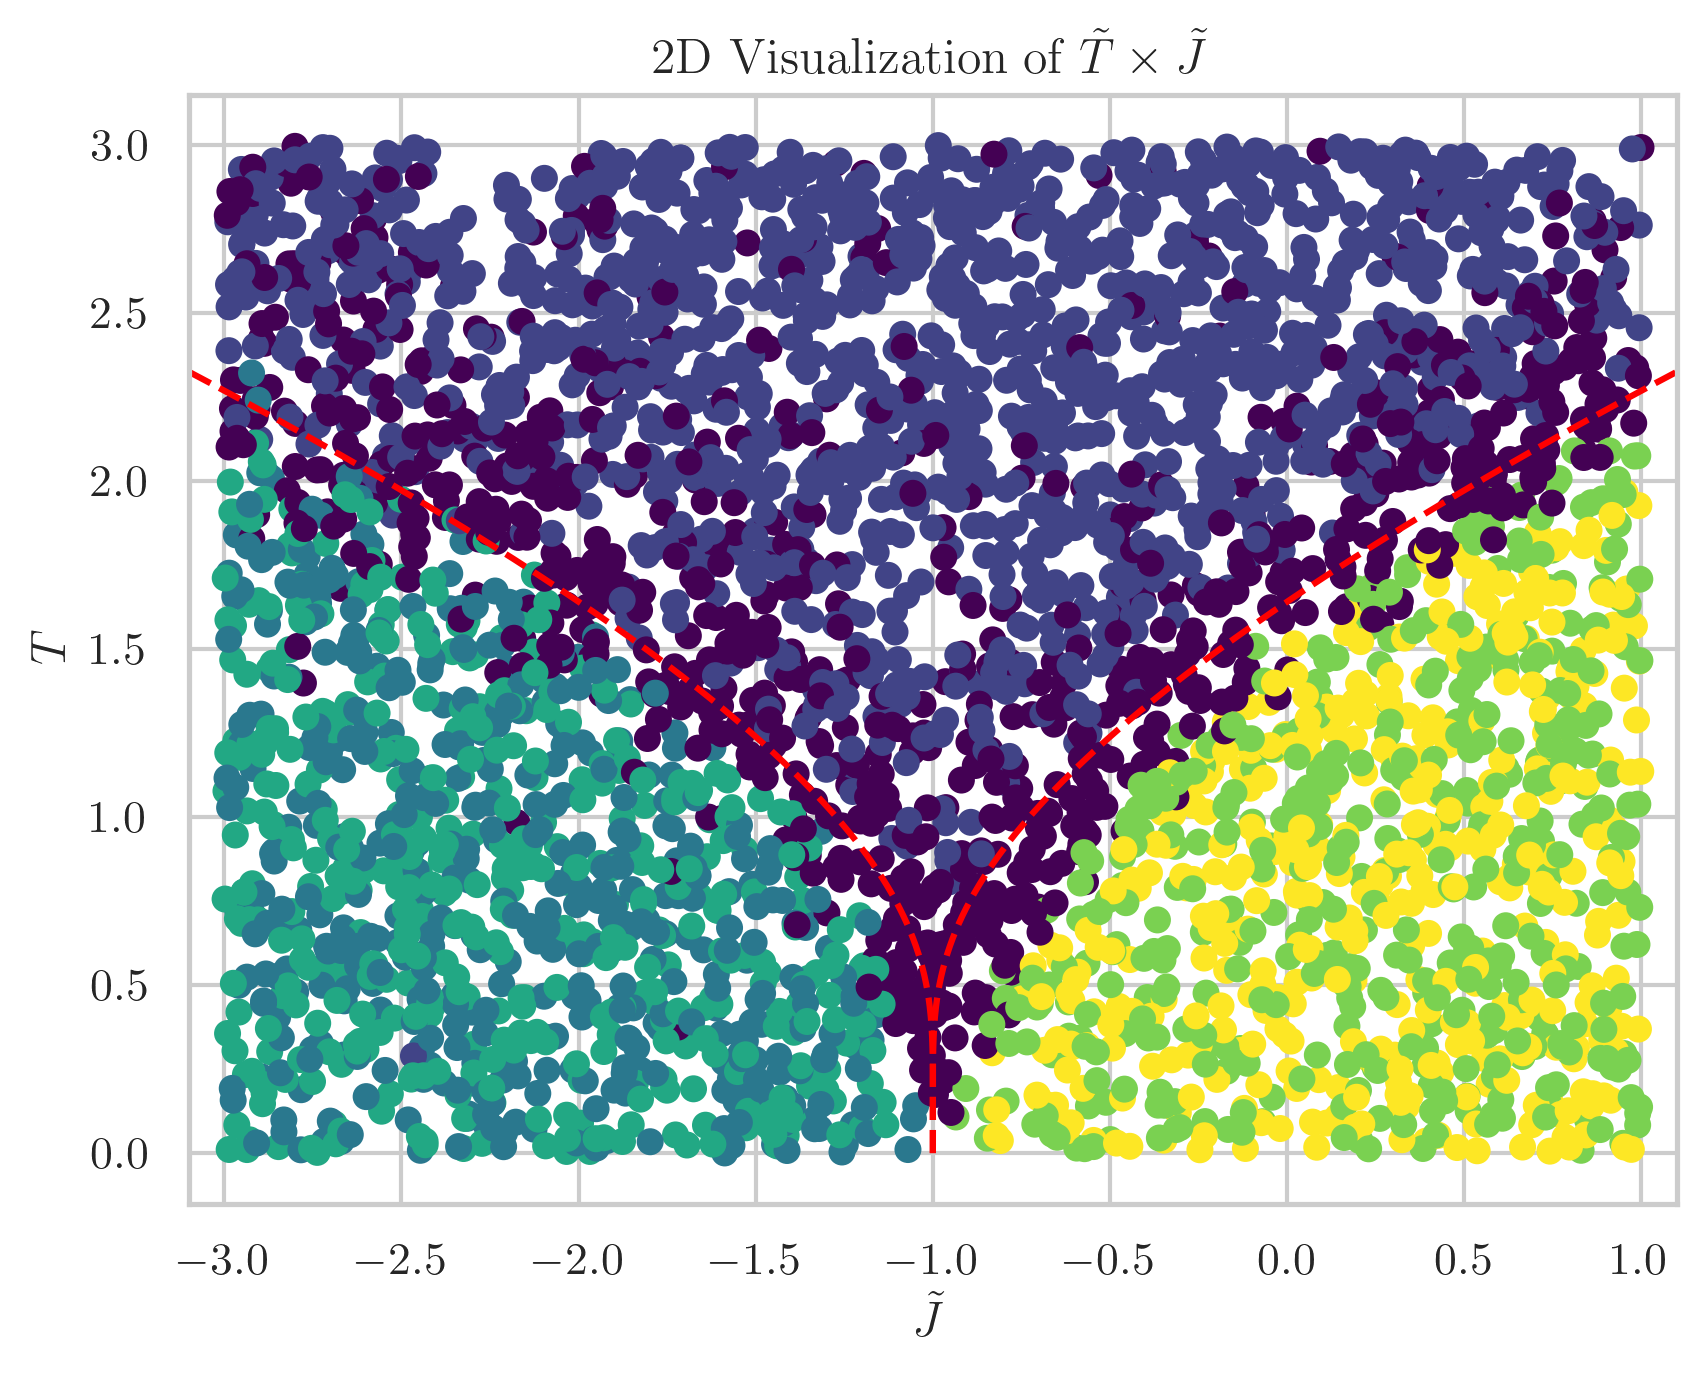

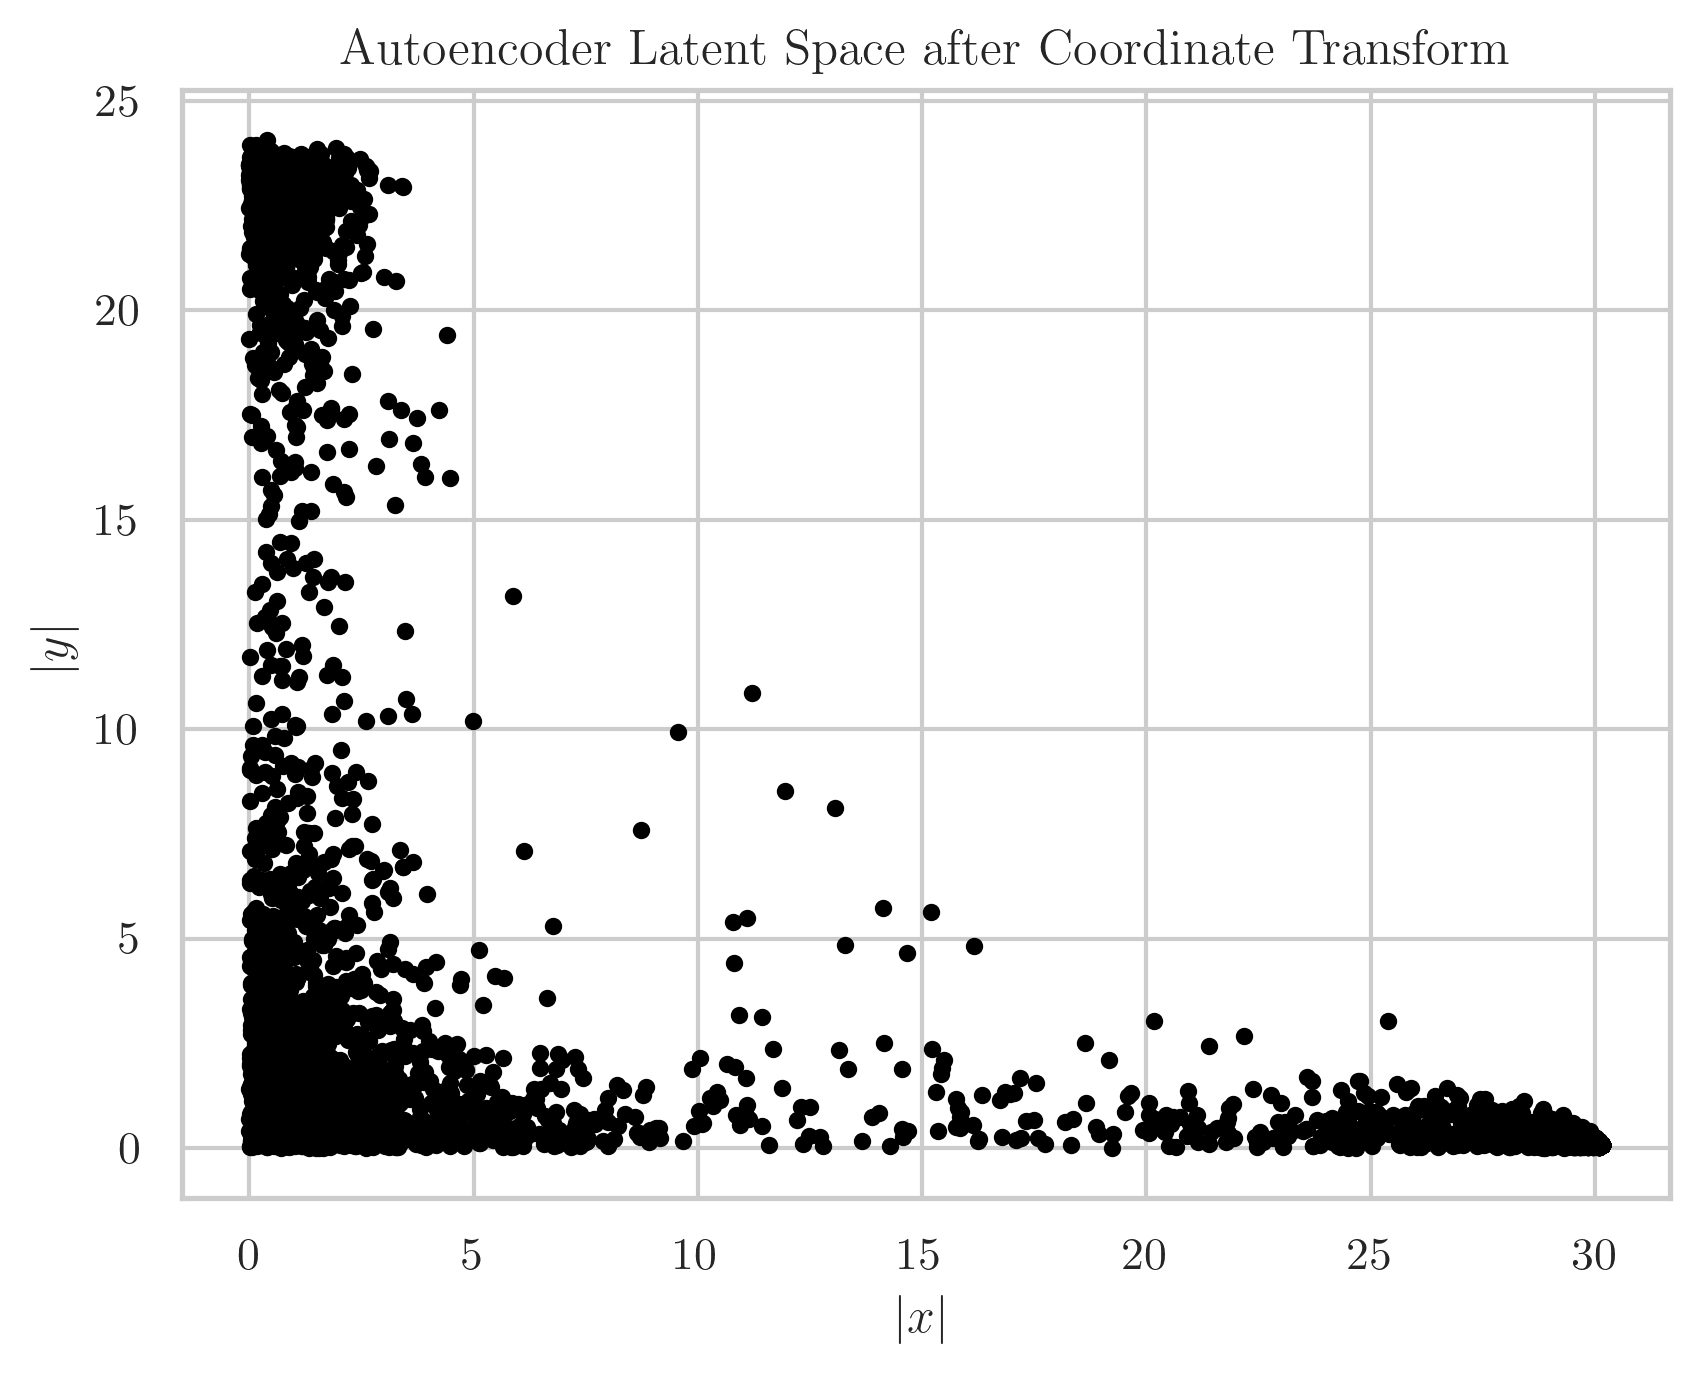

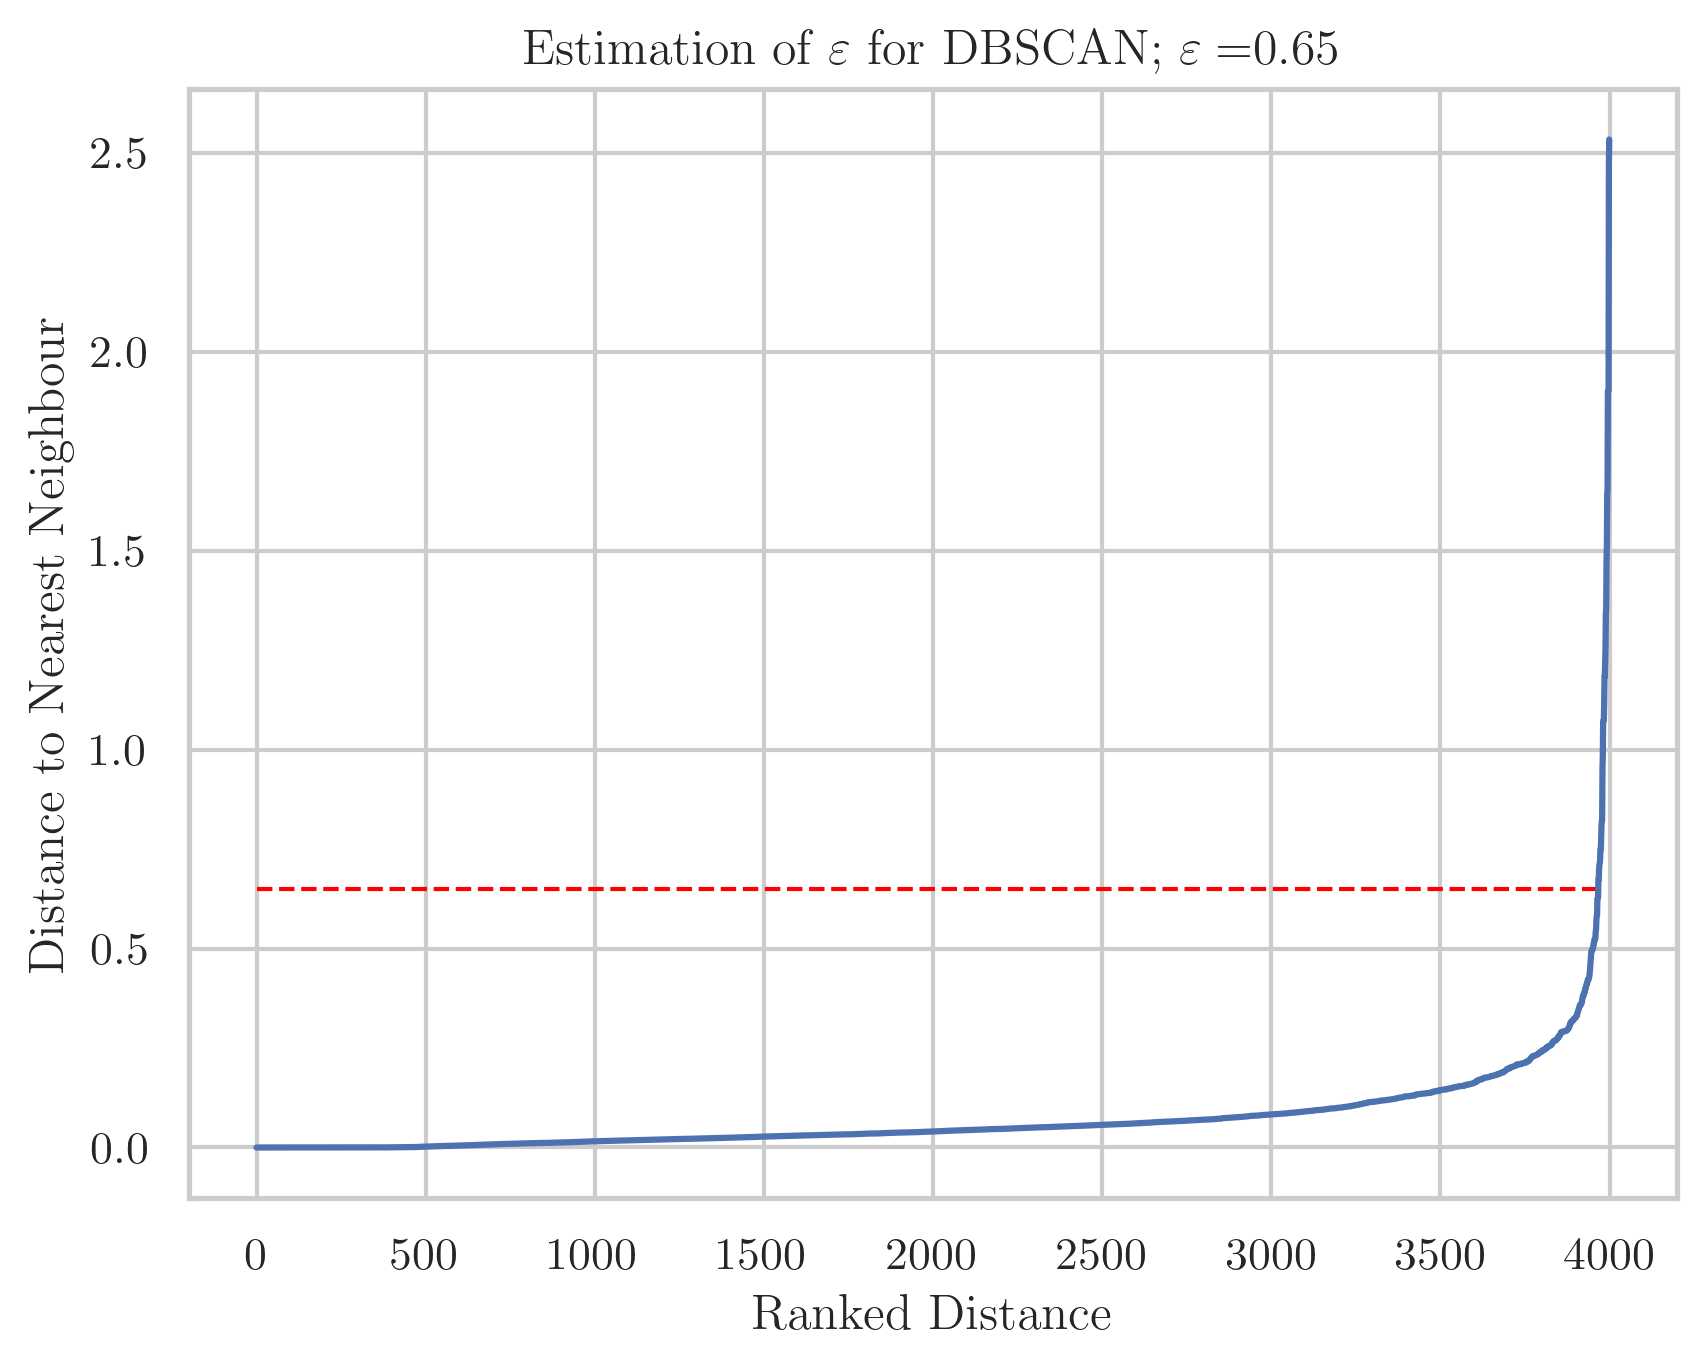

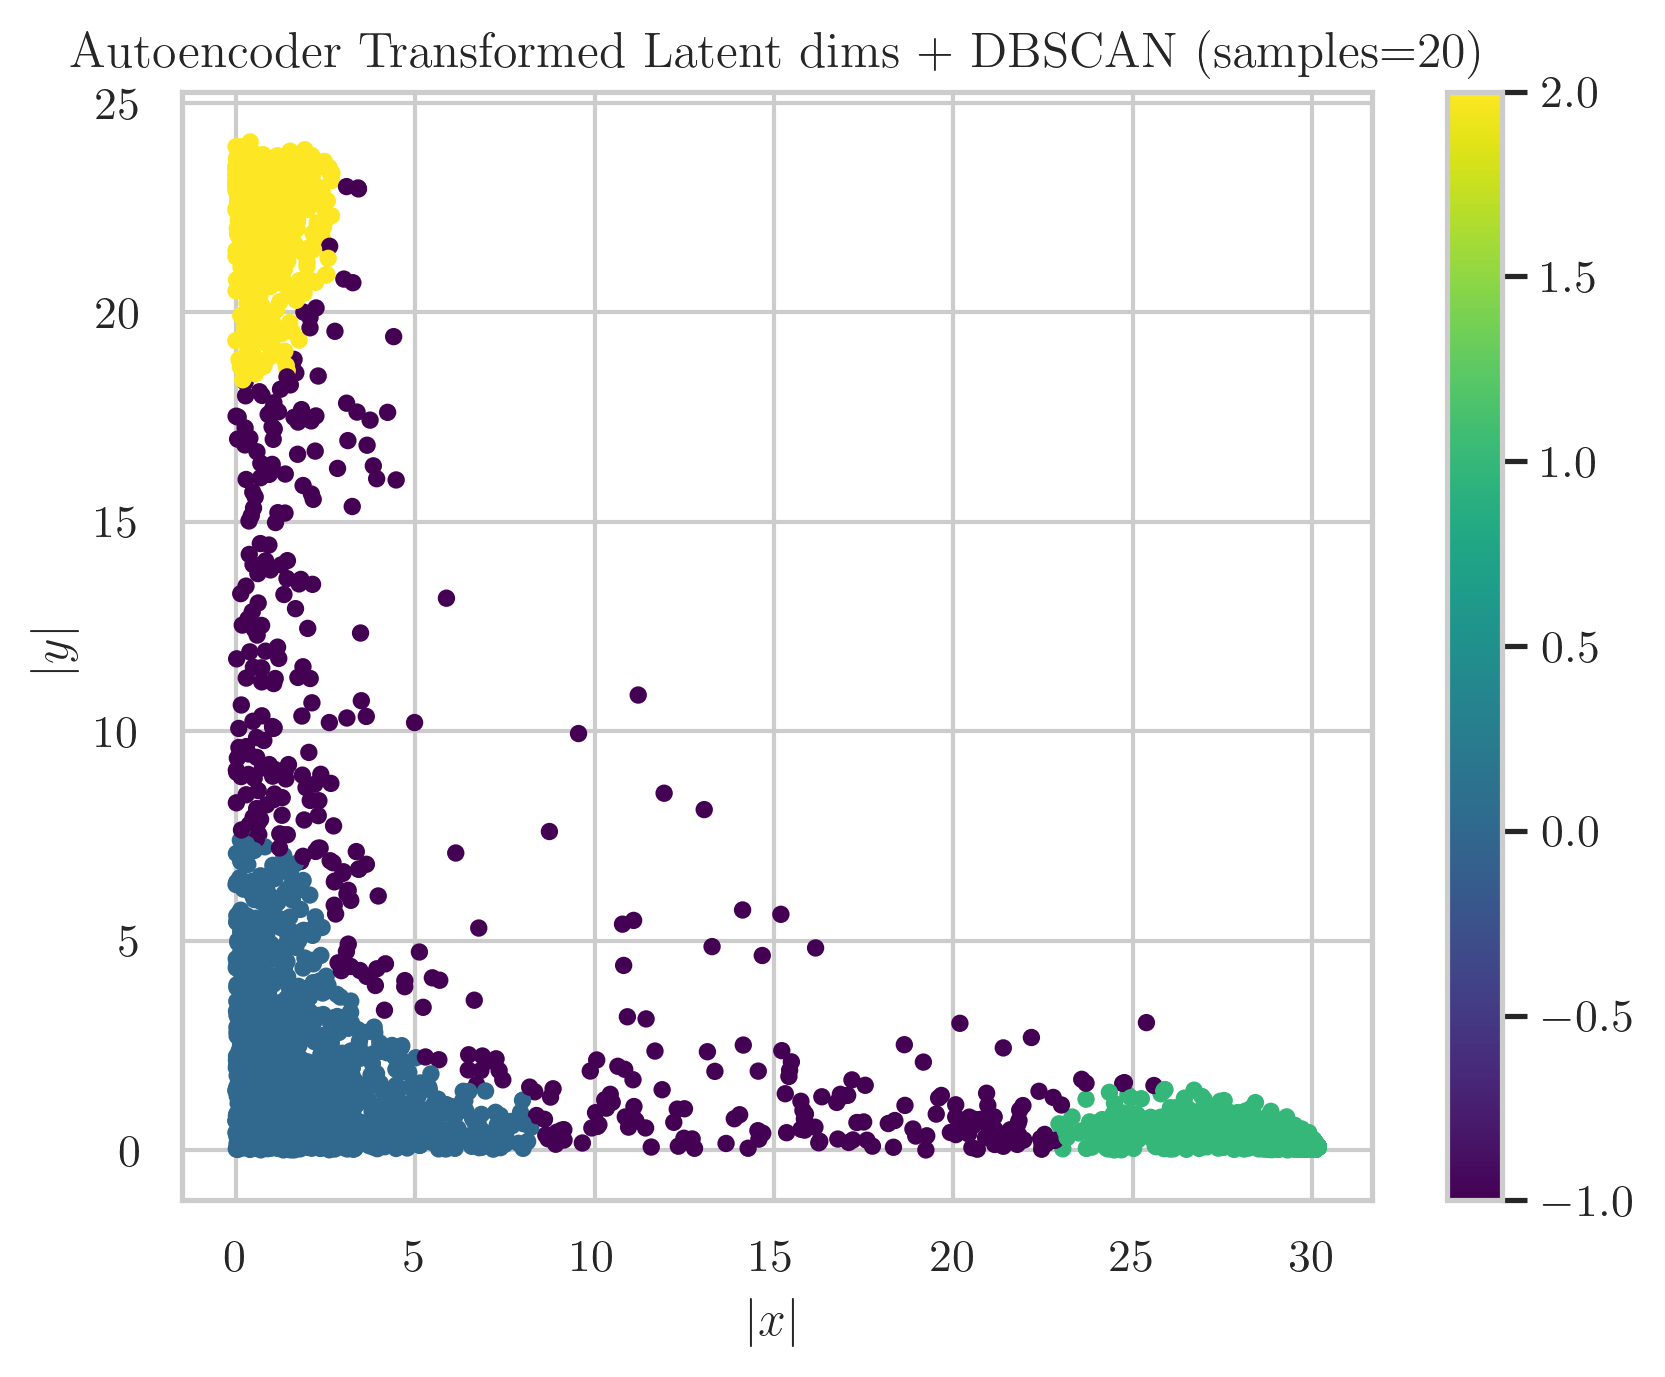

/tmp/ipykernel_1074840/3698857395.py:104: RuntimeWarning: divide by zero encountered in divide
  plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
/tmp/ipykernel_1074840/3698857395.py:105: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )


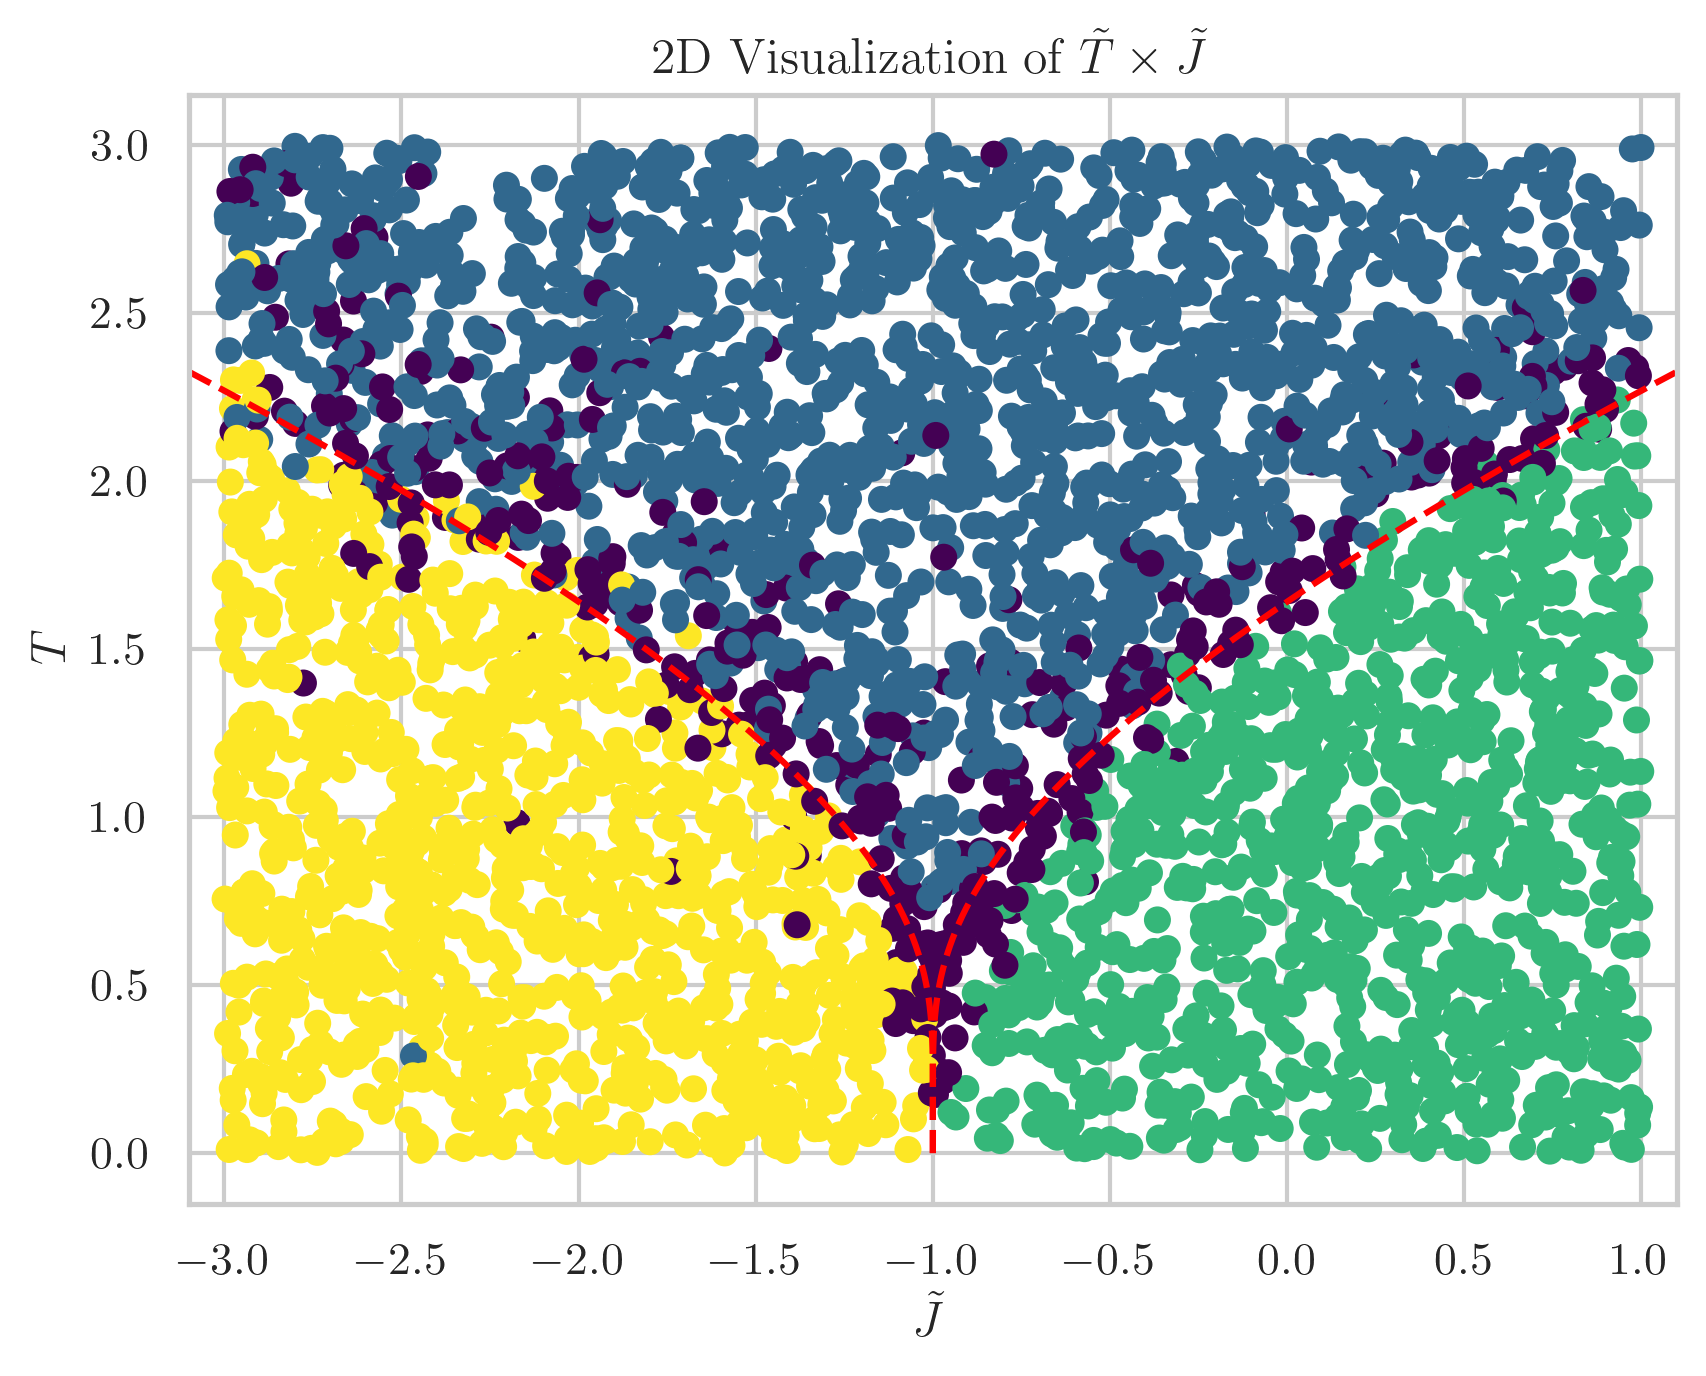

In [52]:


pca = PCA(n_components=2)
pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))

latent_vectors = pca_Raw
L1 = pca_Raw[:, 0]; L2 = pca_Raw[:, 1]
plt.scatter(L1, L2, s=10, c='black', label='PCA (NN)')
plt.show()
print("PCA components:", latent_vectors.shape)

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(latent_vectors)
distances2,_ = neighbours_fit2.kneighbors(latent_vectors)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)


epsilon = 0.75
min_samples = 20
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(latent_vectors)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.150)
# plt.xlim(3550, 4000)
plt.show()

scatter2 = plt.scatter(L1, L2, c=labels2, cmap='viridis', s=10)
plt.colorbar(scatter2)
plt.title("Autoencoder Latent dims + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
# plt.legend()
plt.show()



plt.scatter(params[:, 0], params[:,1], c=labels2, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$')
x = np.linspace(0, 3, 400)
plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )
plt.xlim(-3.1,1.1)
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.show()




# coordinate transformation
L1 = np.abs(latent_vectors[:, 0]); L2 = np.abs(latent_vectors[:, 1])
aeTrans = np.column_stack((L1, L2))

plt.scatter(L1, L2, s=10, c='black')
plt.title("Autoencoder Latent Space after Coordinate Transform")
plt.xlabel(r'$|x|$')
plt.ylabel(r'$|y|$')
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans.png", bbox_inches='tight')
plt.show()

# neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(aeTrans)
distances2,_ = neighbours_fit2.kneighbors(aeTrans)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)



epsilon = 0.65
min_samples = 20
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(aeTrans)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(rf'Estimation of $\varepsilon$ for DBSCAN; $\varepsilon=${epsilon}')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.150)
# plt.xlim(3550, 4000)
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/epsilon_Trans.png", bbox_inches='tight')
plt.show()

scatter2 = plt.scatter(L1, L2, c=labels2, cmap='viridis', s=10)
plt.colorbar(scatter2)
plt.title("Autoencoder Transformed Latent dims + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel(r'$|x|$')
plt.ylabel(r'$|y|$')
# plt.legend()
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans+DBSCAN.png", bbox_inches='tight')
plt.show()



plt.scatter(params[:, 0], params[:,1], c=labels2, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$')
x = np.linspace(0, 3, 400)
plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )
plt.xlim(-3.1,1.1)
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/phases.png", bbox_inches='tight')
plt.show()


In [ ]:


# coordinate transformation
L1 = np.abs(latent_vectors[:, 0]); L2 = np.abs(latent_vectors[:, 1])
aeTrans = np.column_stack((L1, L2))

plt.scatter(L1, L2, s=10, c='black')
plt.title("Autoencoder Latent Space after Coordinate Transform")
plt.xlabel(r'$|x\times\cos(y)|$')
plt.ylabel(r'$x\times\sin(y)$')
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans.png", bbox_inches='tight')
plt.show()

# neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(aeTrans)
distances2,_ = neighbours_fit2.kneighbors(aeTrans)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)



epsilon = 0.065
min_samples = 20
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(aeTrans)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(rf'Estimation of $\varepsilon$ for DBSCAN; $\varepsilon=${epsilon}')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.150)
# plt.xlim(3550, 4000)
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/epsilon_Trans.png", bbox_inches='tight')
plt.show()

scatter2 = plt.scatter(L1, L2, c=labels2, cmap='viridis', s=10)
plt.colorbar(scatter2)
plt.title("Autoencoder Transformed Latent dims + DBSCAN (samples="+str(min_samples)+")")
plt.xlabel(r'$|x\times\cos(y)|$')
plt.ylabel(r'$x\times\sin(y)$')
# plt.legend()
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/configs_Trans+DBSCAN.png", bbox_inches='tight')
plt.show()



plt.scatter(params[:, 0], params[:,1], c=labels2, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$')
x = np.linspace(0, 3, 400)
plt.plot(-x*np.asinh(1/np.sinh(2/x))-1, x, '--', color='red')
plt.plot(x*np.asinh(1/np.sinh(2/x)) - 1, x, '--', color='red' )
plt.xlim(-3.1,1.1)
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
if saving: plt.savefig(data_dir + "checkpoints/Autoencoder/"+date+"/phases.png", bbox_inches='tight')
plt.show()


In [ ]:

# model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/2025-06-12_18/2/model_epoch_990.pth", map_location=device))
visualize_reconstruction(model, testLoader)
# visualize_reconstruction(model,  smallTrainLoader)


model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/2025-06-12_18/1/model_epoch_50.pth", map_location=device))
visualize_reconstruction(model, testLoader)
# visualize_reconstruction(model,  smallTrainLoader)
